In [1]:
#Loading and installing libraries
import numpy as np 
import pandas as pd
from joypy import joyplot
import matplotlib.pyplot as plt
import math
import scipy
from random import choice
from scipy.spatial.distance import euclidean
from scipy.special import expit
from tqdm import tqdm

In [2]:
week_1 = pd.read_csv('additional_info 1.csv')
week_2 = pd.read_csv('additional_info 2.csv')
week_3 = pd.read_csv('additional_info 3.csv')
week_4 = pd.read_csv('additional_info 4.csv')
week_5 = pd.read_csv('additional_info 5.csv')
week_6 = pd.read_csv('additional_info 6.csv')
week_7 = pd.read_csv('additional_info 7.csv')
week_8 = pd.read_csv('additional_info 8.csv')

info = pd.concat([week_1, week_2,week_3,week_4,week_5,week_6,week_7,week_8], ignore_index=True)
info

Unnamed: 0        gameId  playId  frameId    nflId  Opp_Dist  \
0                 0  2.021091e+09    97.0      1.0  25511.0  5.773768   
1                 1  2.021091e+09    97.0      2.0  25511.0  5.754025   
2                 2  2.021091e+09    97.0      3.0  25511.0  5.752434   
3                 3  2.021091e+09    97.0      4.0  25511.0  5.778945   
4                 4  2.021091e+09    97.0      5.0  25511.0  5.790371   
...             ...           ...     ...      ...      ...       ...   
7957218      936973           NaN     NaN      NaN  53957.0       NaN   
7957219      936974           NaN     NaN      NaN  53978.0       NaN   
7957220      936975           NaN     NaN      NaN  53991.0       NaN   
7957221      936976           NaN     NaN      NaN  53999.0       NaN   
7957222      936977           NaN     NaN      NaN  54006.0       NaN   

         closestOpp_Id  Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  \
0              44955.0   1.973449         39985.0      0.0       25511.0   
1              44955.0   1.983381         39985.0      0.0       25511.0   
2              44955.0   2.035412         39985.0      0.0       25511.0   
3              44955.0   2.018960         39985.0      0.0       25511.0   
4              44955.0   2.004221         39985.0      0.0       25511.0   
...                ...        ...             ...      ...           ...   
7957218            NaN        NaN             NaN      NaN           NaN   
7957219            NaN        NaN             NaN      NaN           NaN   
7957220            NaN        NaN             NaN      NaN           NaN   
7957221            NaN        NaN             NaN      NaN           NaN   
7957222            NaN        NaN             NaN      NaN           NaN   

         FootDist height  weight officialPosition      displayName  
0        5.153145    6-4     225               QB        Tom Brady  
1        4.460785    6-4     225               QB        Tom Brady  
2        4.403930    6-4     225               QB        Tom Brady  
3        4.384803    6-4     225               QB        Tom Brady  
4        4.144804    6-4     225               QB        Tom Brady  
...           ...    ...     ...              ...              ...  
7957218       NaN   5-11     178               CB      A.J. Parker  
7957219       NaN    6-3     295               DT    Austin Faoliu  
7957220       NaN    6-1     320               DT  Forrest Merrill  
7957221       NaN    6-4     312               DT      Jack Heflin  
7957222       NaN    6-6     330                T      Jake Curhan  

[7957223 rows x 16 columns]

In [3]:
week1 = pd.read_csv('week1.csv')
week2 = pd.read_csv('week2.csv')
week3 = pd.read_csv('week3.csv')
week4 = pd.read_csv('week4.csv')
week5 = pd.read_csv('week5.csv')
week6 = pd.read_csv('week6.csv')
week7 = pd.read_csv('week7.csv')
week8 = pd.read_csv('week8.csv')

week = pd.concat([week1, week2,week3,week4,week5,week6,week7,week8], ignore_index=True)
week

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314173  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314174  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314175  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314176  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314177  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y     s     a   dis  \
0                12.0        TB         right  37.77  24.22  0.29  0.30  0.03   
1                12.0        TB         right  37.78  24.22  0.23  0.11  0.02   
2                12.0        TB         right  37.78  24.24  0.16  0.10  0.01   
3                12.0        TB         right  37.73  24.25  0.15  0.24  0.06   
4                12.0        TB         right  37.69  24.26  0.25  0.18  0.04   
...               ...       ...           ...    ...    ...   ...   ...   ...   
8314173           NaN  football         right  24.17  27.89  2.47  2.28  0.25   
8314174           NaN  football         right  24.36  28.03  2.36  2.16  0.24   
8314175           NaN  football         right  24.55  28.17  2.25  1.45  0.23   
8314176           NaN  football         right  24.73  28.31  2.28  0.72  0.23   
8314177           NaN  football         right  24.91  28.45  2.32  0.54  0.23   

              o     dir event  
0        165.16   84.99  None  
1        164.33   92.87  None  
2        160.24   68.55  None  
3        152.13  296.85  None  
4        148.33  287.55  None  
...         ...     ...   ...  
8314173     NaN     NaN  None  
8314174     NaN     NaN  None  
8314175     NaN     NaN  None  
8314176     NaN     NaN  None  
8314177     NaN     NaN  None  

[8314178 rows x 16 columns]

In [4]:
weekArray = np.array(week)
previousEvent = 'ball_snap' 
for i, instance in enumerate(weekArray):
    event = instance[15]
    frameId = instance[3]
    if (previousEvent == 'ball_snap' and event != 'ball_snap') or frameId == 1:
        weekArray[i][15] = 'pre_snap'
        previousEvent = 'pre_snap'
    elif (previousEvent == 'pre_snap' and event != 'ball_snap'):
        weekArray[i][15] = 'pre_snap'
        previousEvent = 'pre_snap'
    elif (event == 'ball_snap'):
        weekArray[i][15] = 'ball_snap'
        previousEvent = 'between_snap'
    elif (previousEvent == 'between_snap' and event != 'pass_forward'):
        weekArray[i][15] = 'between_snap'
        previousEvent = 'between_snap'
    elif (event == 'pass_forward'):
        weekArray[i][15] = 'after_pass'
        previousEvent = 'after_pass'
    elif (previousEvent == 'after_pass' and frameId != 1):
        weekArray[i][15] = 'after_pass'
        previousEvent = 'after_pass'
        
weekMod = pd.DataFrame(weekArray, columns=week.columns)
week['events'] = weekMod['event']
weekMod = week

In [5]:
week.event.value_counts()

None                         7673352
ball_snap                     196236
pass_forward                  173604
autoevent_ballsnap             86641
autoevent_passforward          85882
play_action                    45471
run                            10902
qb_sack                        10373
pass_arrived                    8441
autoevent_passinterrupted       4623
man_in_motion                   4071
line_set                        3220
shift                           3059
pass_tipped                     2553
first_contact                   1840
qb_strip_sack                   1334
pass_outcome_incomplete          920
pass_outcome_caught              529
fumble                           391
fumble_offense_recovered         253
handoff                          230
huddle_break_offense              69
tackle                            69
penalty_flag                      46
lateral                           23
dropped_pass                      23
out_of_bounds                     23
N

In [6]:
week.events.value_counts()

between_snap    6027334
pre_snap        1122538
after_pass       968300
ball_snap        196006
Name: events, dtype: int64

In [7]:
week.head(50)

gameId  playId    nflId  frameId                 time  jerseyNumber  \
0   2021090900      97  25511.0        1  2021-09-10 00:26:31          12.0   
1   2021090900      97  25511.0        2  2021-09-10 00:26:31          12.0   
2   2021090900      97  25511.0        3  2021-09-10 00:26:31          12.0   
3   2021090900      97  25511.0        4  2021-09-10 00:26:31          12.0   
4   2021090900      97  25511.0        5  2021-09-10 00:26:31          12.0   
5   2021090900      97  25511.0        6  2021-09-10 00:26:31          12.0   
6   2021090900      97  25511.0        7  2021-09-10 00:26:31          12.0   
7   2021090900      97  25511.0        8  2021-09-10 00:26:31          12.0   
8   2021090900      97  25511.0        9  2021-09-10 00:26:31          12.0   
9   2021090900      97  25511.0       10  2021-09-10 00:26:32          12.0   
10  2021090900      97  25511.0       11  2021-09-10 00:26:32          12.0   
11  2021090900      97  25511.0       12  2021-09-10 00:26:32          12.0   
12  2021090900      97  25511.0       13  2021-09-10 00:26:32          12.0   
13  2021090900      97  25511.0       14  2021-09-10 00:26:32          12.0   
14  2021090900      97  25511.0       15  2021-09-10 00:26:32          12.0   
15  2021090900      97  25511.0       16  2021-09-10 00:26:32          12.0   
16  2021090900      97  25511.0       17  2021-09-10 00:26:32          12.0   
17  2021090900      97  25511.0       18  2021-09-10 00:26:32          12.0   
18  2021090900      97  25511.0       19  2021-09-10 00:26:32          12.0   
19  2021090900      97  25511.0       20  2021-09-10 00:26:33          12.0   
20  2021090900      97  25511.0       21  2021-09-10 00:26:33          12.0   
21  2021090900      97  25511.0       22  2021-09-10 00:26:33          12.0   
22  2021090900      97  25511.0       23  2021-09-10 00:26:33          12.0   
23  2021090900      97  25511.0       24  2021-09-10 00:26:33          12.0   
24  2021090900      97  25511.0       25  2021-09-10 00:26:33          12.0   
25  2021090900      97  25511.0       26  2021-09-10 00:26:33          12.0   
26  2021090900      97  25511.0       27  2021-09-10 00:26:33          12.0   
27  2021090900      97  25511.0       28  2021-09-10 00:26:33          12.0   
28  2021090900      97  25511.0       29  2021-09-10 00:26:33          12.0   
29  2021090900      97  25511.0       30  2021-09-10 00:26:34          12.0   
30  2021090900      97  25511.0       31  2021-09-10 00:26:34          12.0   
31  2021090900      97  25511.0       32  2021-09-10 00:26:34          12.0   
32  2021090900      97  25511.0       33  2021-09-10 00:26:34          12.0   
33  2021090900      97  25511.0       34  2021-09-10 00:26:34          12.0   
34  2021090900      97  25511.0       35  2021-09-10 00:26:34          12.0   
35  2021090900      97  25511.0       36  2021-09-10 00:26:34          12.0   
36  2021090900      97  25511.0       37  2021-09-10 00:26:34          12.0   
37  2021090900      97  25511.0       38  2021-09-10 00:26:34          12.0   
38  2021090900      97  25511.0       39  2021-09-10 00:26:34          12.0   
39  2021090900      97  25511.0       40  2021-09-10 00:26:35          12.0   
40  2021090900      97  25511.0       41  2021-09-10 00:26:35          12.0   
41  2021090900      97  25511.0       42  2021-09-10 00:26:35          12.0   
42  2021090900      97  25511.0       43  2021-09-10 00:26:35          12.0   
43  2021090900      97  35481.0        1  2021-09-10 00:26:31          87.0   
44  2021090900      97  35481.0        2  2021-09-10 00:26:31          87.0   
45  2021090900      97  35481.0        3  2021-09-10 00:26:31          87.0   
46  2021090900      97  35481.0        4  2021-09-10 00:26:31          87.0   
47  2021090900      97  35481.0        5  2021-09-10 00:26:31          87.0   
48  2021090900      97  35481.0        6  2021-09-10 00:26:31          87.0   
49  2021090900      97  35481.0        7  2021-09-10 00:26

In [8]:
#Standardizing tracking data so its always in direction of kicking team vs raw on-field coordinates.
week.loc[week['playDirection'] == "left", 'x'] = 120-week.loc[week['playDirection'] == "left", 'x']
week.loc[week['playDirection'] == "left", 'y'] = 160/3-week.loc[week['playDirection'] == "left", 'y']

In [9]:
final = pd.merge(week, info, on=['gameId', 'nflId', 'frameId', 'playId'], how='left')
final

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314173  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314174  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314175  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314176  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314177  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y  ...  \
0                12.0        TB         right  37.77  24.22  ...   
1                12.0        TB         right  37.78  24.22  ...   
2                12.0        TB         right  37.78  24.24  ...   
3                12.0        TB         right  37.73  24.25  ...   
4                12.0        TB         right  37.69  24.26  ...   
...               ...       ...           ...    ...    ...  ...   
8314173           NaN  football         right  24.17  27.89  ...   
8314174           NaN  football         right  24.36  28.03  ...   
8314175           NaN  football         right  24.55  28.17  ...   
8314176           NaN  football         right  24.73  28.31  ...   
8314177           NaN  football         right  24.91  28.45  ...   

         closestOpp_Id  Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  \
0              44955.0   1.973449         39985.0      0.0       25511.0   
1              44955.0   1.983381         39985.0      0.0       25511.0   
2              44955.0   2.035412         39985.0      0.0       25511.0   
3              44955.0   2.018960         39985.0      0.0       25511.0   
4              44955.0   2.004221         39985.0      0.0       25511.0   
...                ...        ...             ...      ...           ...   
8314173            NaN        NaN             NaN      NaN           NaN   
8314174            NaN        NaN             NaN      NaN           NaN   
8314175            NaN        NaN             NaN      NaN           NaN   
8314176            NaN        NaN             NaN      NaN           NaN   
8314177            NaN        NaN             NaN      NaN           NaN   

         FootDist height  weight  officialPosition  displayName  
0        5.153145    6-4   225.0                QB    Tom Brady  
1        4.460785    6-4   225.0                QB    Tom Brady  
2        4.403930    6-4   225.0                QB    Tom Brady  
3        4.384803    6-4   225.0                QB    Tom Brady  
4        4.144804    6-4   225.0                QB    Tom Brady  
...           ...    ...     ...               ...          ...  
8314173       NaN    NaN     NaN               NaN          NaN  
8314174       NaN    NaN     NaN               NaN          NaN  
8314175       NaN    NaN     NaN               NaN          NaN  
8314176       NaN    NaN     NaN               NaN          NaN  
8314177       NaN    NaN     NaN               NaN          NaN  

[8314178 rows x 29 columns]

In [10]:
pd.set_option('display.max_columns', 500)
final.drop('Unnamed: 0', axis=1, inplace=True)
final

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314173  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314174  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314175  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314176  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314177  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y     s     a   dis  \
0                12.0        TB         right  37.77  24.22  0.29  0.30  0.03   
1                12.0        TB         right  37.78  24.22  0.23  0.11  0.02   
2                12.0        TB         right  37.78  24.24  0.16  0.10  0.01   
3                12.0        TB         right  37.73  24.25  0.15  0.24  0.06   
4                12.0        TB         right  37.69  24.26  0.25  0.18  0.04   
...               ...       ...           ...    ...    ...   ...   ...   ...   
8314173           NaN  football         right  24.17  27.89  2.47  2.28  0.25   
8314174           NaN  football         right  24.36  28.03  2.36  2.16  0.24   
8314175           NaN  football         right  24.55  28.17  2.25  1.45  0.23   
8314176           NaN  football         right  24.73  28.31  2.28  0.72  0.23   
8314177           NaN  football         right  24.91  28.45  2.32  0.54  0.23   

              o     dir event        events  Opp_Dist  closestOpp_Id  \
0        165.16   84.99  None      pre_snap  5.773768        44955.0   
1        164.33   92.87  None      pre_snap  5.754025        44955.0   
2        160.24   68.55  None      pre_snap  5.752434        44955.0   
3        152.13  296.85  None      pre_snap  5.778945        44955.0   
4        148.33  287.55  None      pre_snap  5.790371        44955.0   
...         ...     ...   ...           ...       ...            ...   
8314173     NaN     NaN  None  between_snap       NaN            NaN   
8314174     NaN     NaN  None  between_snap       NaN            NaN   
8314175     NaN     NaN  None  between_snap       NaN            NaN   
8314176     NaN     NaN  None  between_snap       NaN            NaN   
8314177     NaN     NaN  None  between_snap       NaN            NaN   

         Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
0         1.973449         39985.0      0.0       25511.0  5.153145    6-4   
1         1.983381         39985.0      0.0       25511.0  4.460785    6-4   
2         2.035412         39985.0      0.0       25511.0  4.403930    6-4   
3         2.018960         39985.0      0.0       25511.0  4.384803    6-4   
4         2.004221         39985.0      0.0       25511.0  4.144804    6-4   
...            ...             ...      ...           ...       ...    ...   
8314173        NaN             NaN      NaN           NaN       NaN    NaN   
8314174        NaN             NaN      NaN           NaN       NaN    NaN   
8314175        NaN             NaN      NaN           NaN       NaN    NaN   
8314176        NaN             NaN      NaN           NaN       NaN    NaN   
8314177        NaN             NaN      NaN           NaN       NaN    NaN   

         weight officialPosition displayName  
0         225.0               QB   Tom Brady  
1         225.0               QB   Tom Brady  
2         225.0               QB   Tom Brady  
3         225.0               QB   Tom Brady  
4         225.0               QB   Tom Brady  
...         ...              ...         ...  
8314173     NaN              NaN         NaN  
8314174     NaN      

In [11]:
final.events.value_counts()

between_snap    6027334
pre_snap        1122538
after_pass       968300
ball_snap        196006
Name: events, dtype: int64

In [12]:
plays = pd.read_csv('plays.csv')
plays

gameId  playId                                    playDescription  \
0     2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
1     2021090900     137  (13:18) (Shotgun) D.Prescott pass deep left to...   
2     2021090900     187  (12:23) (Shotgun) D.Prescott pass short middle...   
3     2021090900     282  (9:56) D.Prescott pass incomplete deep left to...   
4     2021090900     349  (9:46) (Shotgun) D.Prescott pass incomplete sh...   
...          ...     ...                                                ...   
8553  2021110100    4310  (1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...   
8554  2021110100    4363  (1:07) (Shotgun) D.Jones pass short right to E...   
8555  2021110100    4392  (1:01) (No Huddle, Shotgun) D.Jones sacked at ...   
8556  2021110100    4411  (:39) (No Huddle, Shotgun) D.Jones pass incomp...   
8557  2021110100    4433  (:35) (Shotgun) D.Jones sacked at NYG 14 for -...   

      quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
0           1     3          2             TB           DAL           TB   
1           1     1         10            DAL            TB          DAL   
2           1     2          6            DAL            TB          DAL   
3           1     1         10            DAL            TB           TB   
4           1     3         15            DAL            TB           TB   
...       ...   ...        ...            ...           ...          ...   
8553        4     3          8             KC           NYG          NYG   
8554        4     1         10            NYG            KC          NYG   
8555        4     2          7            NYG            KC          NYG   
8556        4     3         15            NYG            KC          NYG   
8557        4     4         15            NYG            KC          NYG   

      yardlineNumber gameClock  preSnapHomeScore  preSnapVisitorScore  \
0                 33     13:33                 0                    0   
1                  2     13:18                 0                    0   
2                 34     12:23                 0                    0   
3                 39     09:56                 0                    0   
4                 44     09:46                 0                    0   
...              ...       ...               ...                  ...   
8553               8     01:56                17                   17   
8554              25     01:07                20                   17   
8555              28     01:01                20                   17   
8556              20     00:39                20                   17   
8557              20     00:35                20                   17   

     passResult  penaltyYards  prePenaltyPlayResult  playResult foulName1  \
0             I           NaN                     0           0       NaN   
1             C           NaN                    28          28       NaN   
2             C           NaN                     5           5       NaN   
3             I           NaN                     0           0       NaN   
4             I           NaN                     0           0       NaN   
...         ...           ...                   ...         ...       ...   
8553          S           NaN                    -8          -8       NaN   
8554          C           NaN                     3           3       NaN   
8555          S           NaN                    -8          -8       NaN   
8556          I           NaN                     0           0       NaN   
8557          S           NaN                    -5          -5       NaN   

      foulNFLId1 foulName2  foulNFLId2 foulName3  foulNFLId3  \
0            NaN       NaN         NaN       NaN         NaN   
1            NaN       NaN         NaN       NaN         NaN   
2            NaN       NaN         NaN       NaN         NaN   
3            NaN       NaN         NaN       NaN         NaN   
4            NaN       NaN

In [13]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8558 non-null   int64  
 1   playId                  8558 non-null   int64  
 2   playDescription         8558 non-null   object 
 3   quarter                 8558 non-null   int64  
 4   down                    8558 non-null   int64  
 5   yardsToGo               8558 non-null   int64  
 6   possessionTeam          8558 non-null   object 
 7   defensiveTeam           8558 non-null   object 
 8   yardlineSide            8433 non-null   object 
 9   yardlineNumber          8558 non-null   int64  
 10  gameClock               8558 non-null   object 
 11  preSnapHomeScore        8558 non-null   int64  
 12  preSnapVisitorScore     8558 non-null   int64  
 13  passResult              8558 non-null   object 
 14  penaltyYards            756 non-null    

In [14]:
final = pd.merge(final, plays, on=['gameId', 'playId'], how='inner')
final

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314932  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314933  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314934  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314935  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314936  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y     s     a   dis  \
0                12.0        TB         right  37.77  24.22  0.29  0.30  0.03   
1                12.0        TB         right  37.78  24.22  0.23  0.11  0.02   
2                12.0        TB         right  37.78  24.24  0.16  0.10  0.01   
3                12.0        TB         right  37.73  24.25  0.15  0.24  0.06   
4                12.0        TB         right  37.69  24.26  0.25  0.18  0.04   
...               ...       ...           ...    ...    ...   ...   ...   ...   
8314932           NaN  football         right  24.17  27.89  2.47  2.28  0.25   
8314933           NaN  football         right  24.36  28.03  2.36  2.16  0.24   
8314934           NaN  football         right  24.55  28.17  2.25  1.45  0.23   
8314935           NaN  football         right  24.73  28.31  2.28  0.72  0.23   
8314936           NaN  football         right  24.91  28.45  2.32  0.54  0.23   

              o     dir event        events  Opp_Dist  closestOpp_Id  \
0        165.16   84.99  None      pre_snap  5.773768        44955.0   
1        164.33   92.87  None      pre_snap  5.754025        44955.0   
2        160.24   68.55  None      pre_snap  5.752434        44955.0   
3        152.13  296.85  None      pre_snap  5.778945        44955.0   
4        148.33  287.55  None      pre_snap  5.790371        44955.0   
...         ...     ...   ...           ...       ...            ...   
8314932     NaN     NaN  None  between_snap       NaN            NaN   
8314933     NaN     NaN  None  between_snap       NaN            NaN   
8314934     NaN     NaN  None  between_snap       NaN            NaN   
8314935     NaN     NaN  None  between_snap       NaN            NaN   
8314936     NaN     NaN  None  between_snap       NaN            NaN   

         Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
0         1.973449         39985.0      0.0       25511.0  5.153145    6-4   
1         1.983381         39985.0      0.0       25511.0  4.460785    6-4   
2         2.035412         39985.0      0.0       25511.0  4.403930    6-4   
3         2.018960         39985.0      0.0       25511.0  4.384803    6-4   
4         2.004221         39985.0      0.0       25511.0  4.144804    6-4   
...            ...             ...      ...           ...       ...    ...   
8314932        NaN             NaN      NaN           NaN       NaN    NaN   
8314933        NaN             NaN      NaN           NaN       NaN    NaN   
8314934        NaN             NaN      NaN           NaN       NaN    NaN   
8314935        NaN             NaN      NaN           NaN       NaN    NaN   
8314936        NaN             NaN      NaN           NaN       NaN    NaN   

         weight officialPosition displayName  \
0         225.0               QB   Tom Brady   
1         225.0               QB   Tom Brady   
2         225.0               QB   Tom Brady   
3         225.0               QB   Tom Brady   
4         225.0               QB   Tom Brady   
...         ...              ...         ...   
8314932     NaN              NaN         NaN   
8314933     N

In [15]:
final['event'].value_counts()

None                         7674042
ball_snap                     196259
pass_forward                  173627
autoevent_ballsnap             86641
autoevent_passforward          85905
play_action                    45471
run                            10902
qb_sack                        10373
pass_arrived                    8441
autoevent_passinterrupted       4623
man_in_motion                   4071
line_set                        3220
shift                           3059
pass_tipped                     2553
first_contact                   1840
qb_strip_sack                   1334
pass_outcome_incomplete          920
pass_outcome_caught              529
fumble                           391
fumble_offense_recovered         253
handoff                          230
huddle_break_offense              69
tackle                            69
penalty_flag                      46
lateral                           23
dropped_pass                      23
out_of_bounds                     23
N

In [16]:
final.officialPosition.unique()

array(['QB', 'TE', 'WR', 'RB', 'C', 'DE', 'T', 'G', 'MLB', 'CB', 'SS',
       'OLB', 'DT', nan, 'ILB', 'NT', 'FS', 'FB', 'LB', 'DB'],
      dtype=object)

In [17]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314937 entries, 0 to 8314936
Data columns (total 58 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   gameId                  int64  
 1   playId                  int64  
 2   nflId                   float64
 3   frameId                 int64  
 4   time                    object 
 5   jerseyNumber            float64
 6   team                    object 
 7   playDirection           object 
 8   x                       float64
 9   y                       float64
 10  s                       float64
 11  a                       float64
 12  dis                     float64
 13  o                       float64
 14  dir                     float64
 15  event                   object 
 16  events                  object 
 17  Opp_Dist                float64
 18  closestOpp_Id           float64
 19  Team_Dist               float64
 20  closestTeam_Id          float64
 21  QB_Dist                 float64

In [18]:
final['passResult'].value_counts()

C     4151339
I     2722970
S      690046
R      557359
IN     193223
Name: passResult, dtype: int64

In [19]:
a = final['o'] - final['dir']
final['AngleDiff'] = np.absolute((a + 180) % 360 - 180)

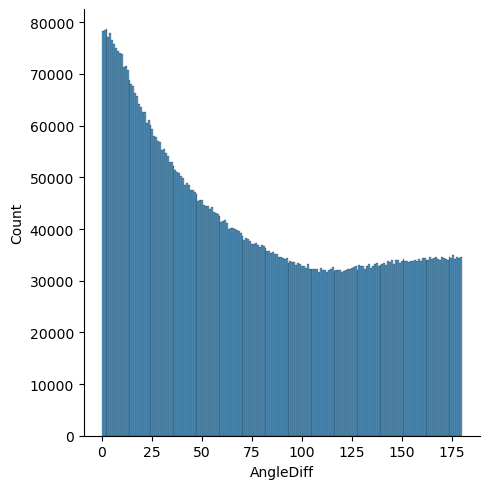

In [20]:
import seaborn as sns
sns.displot(final['AngleDiff']);

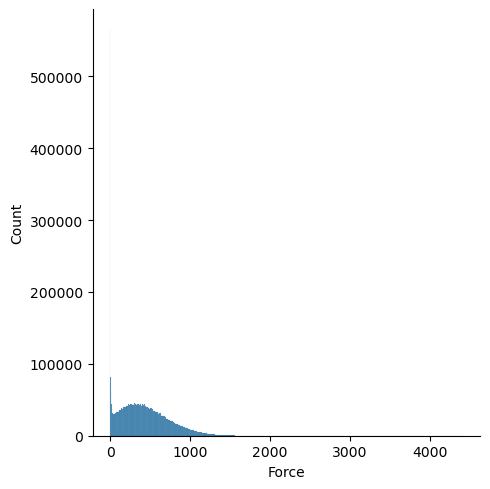

In [21]:
final['Force'] = final['weight'] * final['a']
sns.displot(final['Force']);

In [22]:
varX = final.groupby(['gameId', 'playId', 'events', 'nflId'])['x'].agg(['var']).reset_index().rename(columns={"var": "varX"})
varY = final.groupby(['gameId', 'playId', 'events', 'nflId'])['y'].agg(['var']).reset_index().rename(columns={"var": "varY"})
varS = final.groupby(['gameId', 'playId', 'events', 'nflId'])['s'].agg(['var']).reset_index().rename(columns={"var": "varS"})
maxA = final.groupby(['gameId', 'playId', 'events', 'nflId'])['a'].agg(['max']).reset_index().rename(columns={"max": "maxA"})
mateMean = final.groupby(['gameId', 'playId', 'events', 'nflId'])['Team_Dist'].agg(['mean']).reset_index().rename(columns={"mean": "mateMean"})
oppMean = final.groupby(['gameId', 'playId', 'events', 'nflId'])['Opp_Dist'].agg(['mean']).reset_index().rename(columns={"mean": "oppMean"})
QBMean = final.groupby(['gameId', 'playId', 'events', 'nflId'])['QB_Dist'].agg(['mean']).reset_index().rename(columns={"mean": "QBMean"})
QBVar = final.groupby(['gameId', 'playId', 'events', 'nflId'])['QB_Dist'].agg(['var']).reset_index().rename(columns={"var": "QBVar"})
oppVar = final.groupby(['gameId', 'playId', 'events', 'nflId'])['Opp_Dist'].agg(['var']).reset_index().rename(columns={"var": "oppVar"})
mateVar = final.groupby(['gameId', 'playId', 'events', 'nflId'])['Team_Dist'].agg(['var']).reset_index().rename(columns={"var": "mateVar"})

In [23]:
final = pd.merge(final, varX, how='left', on=['gameId', 'playId', 'nflId', 'events'])

In [24]:
final = pd.merge(final, varY, how='left', on=['gameId', 'playId', 'nflId', 'events'])

In [25]:
final = pd.merge(final, varS, how='left', on=['gameId', 'playId', 'nflId', 'events'])

In [26]:
final = pd.merge(final, maxA, how='left', on=['gameId', 'playId', 'nflId', 'events'])

In [27]:
final = pd.merge(final, mateMean, how='left', on=['gameId', 'playId', 'nflId', 'events'])
final = pd.merge(final, oppMean, how='left', on=['gameId', 'playId', 'nflId', 'events'])
final = pd.merge(final, QBMean, how='left', on=['gameId', 'playId', 'nflId', 'events'])

In [28]:
final = pd.merge(final, mateVar, how='left', on=['gameId', 'playId', 'nflId', 'events'])
final = pd.merge(final, oppVar, how='left', on=['gameId', 'playId', 'nflId', 'events'])
final = pd.merge(final, QBVar, how='left', on=['gameId', 'playId', 'nflId', 'events'])

In [29]:
final

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314932  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314933  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314934  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314935  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314936  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y     s     a   dis  \
0                12.0        TB         right  37.77  24.22  0.29  0.30  0.03   
1                12.0        TB         right  37.78  24.22  0.23  0.11  0.02   
2                12.0        TB         right  37.78  24.24  0.16  0.10  0.01   
3                12.0        TB         right  37.73  24.25  0.15  0.24  0.06   
4                12.0        TB         right  37.69  24.26  0.25  0.18  0.04   
...               ...       ...           ...    ...    ...   ...   ...   ...   
8314932           NaN  football         right  24.17  27.89  2.47  2.28  0.25   
8314933           NaN  football         right  24.36  28.03  2.36  2.16  0.24   
8314934           NaN  football         right  24.55  28.17  2.25  1.45  0.23   
8314935           NaN  football         right  24.73  28.31  2.28  0.72  0.23   
8314936           NaN  football         right  24.91  28.45  2.32  0.54  0.23   

              o     dir event        events  Opp_Dist  closestOpp_Id  \
0        165.16   84.99  None      pre_snap  5.773768        44955.0   
1        164.33   92.87  None      pre_snap  5.754025        44955.0   
2        160.24   68.55  None      pre_snap  5.752434        44955.0   
3        152.13  296.85  None      pre_snap  5.778945        44955.0   
4        148.33  287.55  None      pre_snap  5.790371        44955.0   
...         ...     ...   ...           ...       ...            ...   
8314932     NaN     NaN  None  between_snap       NaN            NaN   
8314933     NaN     NaN  None  between_snap       NaN            NaN   
8314934     NaN     NaN  None  between_snap       NaN            NaN   
8314935     NaN     NaN  None  between_snap       NaN            NaN   
8314936     NaN     NaN  None  between_snap       NaN            NaN   

         Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
0         1.973449         39985.0      0.0       25511.0  5.153145    6-4   
1         1.983381         39985.0      0.0       25511.0  4.460785    6-4   
2         2.035412         39985.0      0.0       25511.0  4.403930    6-4   
3         2.018960         39985.0      0.0       25511.0  4.384803    6-4   
4         2.004221         39985.0      0.0       25511.0  4.144804    6-4   
...            ...             ...      ...           ...       ...    ...   
8314932        NaN             NaN      NaN           NaN       NaN    NaN   
8314933        NaN             NaN      NaN           NaN       NaN    NaN   
8314934        NaN             NaN      NaN           NaN       NaN    NaN   
8314935        NaN             NaN      NaN           NaN       NaN    NaN   
8314936        NaN             NaN      NaN           NaN       NaN    NaN   

         weight officialPosition displayName  \
0         225.0               QB   Tom Brady   
1         225.0               QB   Tom Brady   
2         225.0               QB   Tom Brady   
3         225.0               QB   Tom Brady   
4         225.0               QB   Tom Brady   
...         ...              ...         ...   
8314932     NaN              NaN         NaN   
8314933     N

In [30]:
games = pd.read_csv('games.csv')
games

gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0    2021090900    2021     1  09/09/2021        20:20:00           TB   
1    2021091200    2021     1  09/12/2021        13:00:00          ATL   
2    2021091201    2021     1  09/12/2021        13:00:00          BUF   
3    2021091202    2021     1  09/12/2021        13:00:00          CAR   
4    2021091203    2021     1  09/12/2021        13:00:00          CIN   
..          ...     ...   ...         ...             ...          ...   
117  2021103109    2021     8  10/31/2021        16:05:00          SEA   
118  2021103110    2021     8  10/31/2021        16:25:00          DEN   
119  2021103111    2021     8  10/31/2021        16:25:00           NO   
120  2021103112    2021     8  10/31/2021        20:20:00          MIN   
121  2021110100    2021     8  11/01/2021        20:15:00           KC   

    visitorTeamAbbr  
0               DAL  
1               PHI  
2               PIT  
3               NYJ  
4               MIN  
..              ...  
117             JAX  
118             WAS  
119              TB  
120             DAL  
121             NYG  

[122 rows x 7 columns]

In [31]:
final = pd.merge(final, games, on=['gameId'], how='inner')
final

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314932  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314933  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314934  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314935  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314936  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y     s     a   dis  \
0                12.0        TB         right  37.77  24.22  0.29  0.30  0.03   
1                12.0        TB         right  37.78  24.22  0.23  0.11  0.02   
2                12.0        TB         right  37.78  24.24  0.16  0.10  0.01   
3                12.0        TB         right  37.73  24.25  0.15  0.24  0.06   
4                12.0        TB         right  37.69  24.26  0.25  0.18  0.04   
...               ...       ...           ...    ...    ...   ...   ...   ...   
8314932           NaN  football         right  24.17  27.89  2.47  2.28  0.25   
8314933           NaN  football         right  24.36  28.03  2.36  2.16  0.24   
8314934           NaN  football         right  24.55  28.17  2.25  1.45  0.23   
8314935           NaN  football         right  24.73  28.31  2.28  0.72  0.23   
8314936           NaN  football         right  24.91  28.45  2.32  0.54  0.23   

              o     dir event        events  Opp_Dist  closestOpp_Id  \
0        165.16   84.99  None      pre_snap  5.773768        44955.0   
1        164.33   92.87  None      pre_snap  5.754025        44955.0   
2        160.24   68.55  None      pre_snap  5.752434        44955.0   
3        152.13  296.85  None      pre_snap  5.778945        44955.0   
4        148.33  287.55  None      pre_snap  5.790371        44955.0   
...         ...     ...   ...           ...       ...            ...   
8314932     NaN     NaN  None  between_snap       NaN            NaN   
8314933     NaN     NaN  None  between_snap       NaN            NaN   
8314934     NaN     NaN  None  between_snap       NaN            NaN   
8314935     NaN     NaN  None  between_snap       NaN            NaN   
8314936     NaN     NaN  None  between_snap       NaN            NaN   

         Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
0         1.973449         39985.0      0.0       25511.0  5.153145    6-4   
1         1.983381         39985.0      0.0       25511.0  4.460785    6-4   
2         2.035412         39985.0      0.0       25511.0  4.403930    6-4   
3         2.018960         39985.0      0.0       25511.0  4.384803    6-4   
4         2.004221         39985.0      0.0       25511.0  4.144804    6-4   
...            ...             ...      ...           ...       ...    ...   
8314932        NaN             NaN      NaN           NaN       NaN    NaN   
8314933        NaN             NaN      NaN           NaN       NaN    NaN   
8314934        NaN             NaN      NaN           NaN       NaN    NaN   
8314935        NaN             NaN      NaN           NaN       NaN    NaN   
8314936        NaN             NaN      NaN           NaN       NaN    NaN   

         weight officialPosition displayName  \
0         225.0               QB   Tom Brady   
1         225.0               QB   Tom Brady   
2         225.0               QB   Tom Brady   
3         225.0               QB   Tom Brady   
4         225.0               QB   Tom Brady   
...         ...              ...         ...   
8314932     NaN              NaN         NaN   
8314933     N

In [32]:
final['IsOnOffense'] = np.where(final['team']==final['possessionTeam'], 1, 0)
final

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314932  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314933  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314934  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314935  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314936  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y     s     a   dis  \
0                12.0        TB         right  37.77  24.22  0.29  0.30  0.03   
1                12.0        TB         right  37.78  24.22  0.23  0.11  0.02   
2                12.0        TB         right  37.78  24.24  0.16  0.10  0.01   
3                12.0        TB         right  37.73  24.25  0.15  0.24  0.06   
4                12.0        TB         right  37.69  24.26  0.25  0.18  0.04   
...               ...       ...           ...    ...    ...   ...   ...   ...   
8314932           NaN  football         right  24.17  27.89  2.47  2.28  0.25   
8314933           NaN  football         right  24.36  28.03  2.36  2.16  0.24   
8314934           NaN  football         right  24.55  28.17  2.25  1.45  0.23   
8314935           NaN  football         right  24.73  28.31  2.28  0.72  0.23   
8314936           NaN  football         right  24.91  28.45  2.32  0.54  0.23   

              o     dir event        events  Opp_Dist  closestOpp_Id  \
0        165.16   84.99  None      pre_snap  5.773768        44955.0   
1        164.33   92.87  None      pre_snap  5.754025        44955.0   
2        160.24   68.55  None      pre_snap  5.752434        44955.0   
3        152.13  296.85  None      pre_snap  5.778945        44955.0   
4        148.33  287.55  None      pre_snap  5.790371        44955.0   
...         ...     ...   ...           ...       ...            ...   
8314932     NaN     NaN  None  between_snap       NaN            NaN   
8314933     NaN     NaN  None  between_snap       NaN            NaN   
8314934     NaN     NaN  None  between_snap       NaN            NaN   
8314935     NaN     NaN  None  between_snap       NaN            NaN   
8314936     NaN     NaN  None  between_snap       NaN            NaN   

         Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
0         1.973449         39985.0      0.0       25511.0  5.153145    6-4   
1         1.983381         39985.0      0.0       25511.0  4.460785    6-4   
2         2.035412         39985.0      0.0       25511.0  4.403930    6-4   
3         2.018960         39985.0      0.0       25511.0  4.384803    6-4   
4         2.004221         39985.0      0.0       25511.0  4.144804    6-4   
...            ...             ...      ...           ...       ...    ...   
8314932        NaN             NaN      NaN           NaN       NaN    NaN   
8314933        NaN             NaN      NaN           NaN       NaN    NaN   
8314934        NaN             NaN      NaN           NaN       NaN    NaN   
8314935        NaN             NaN      NaN           NaN       NaN    NaN   
8314936        NaN             NaN      NaN           NaN       NaN    NaN   

         weight officialPosition displayName  \
0         225.0               QB   Tom Brady   
1         225.0               QB   Tom Brady   
2         225.0               QB   Tom Brady   
3         225.0               QB   Tom Brady   
4         225.0               QB   Tom Brady   
...         ...              ...         ...   
8314932     NaN              NaN         NaN   
8314933     N

In [36]:
pff = pd.read_csv('pffScoutingData.csv')
pff

gameId  playId  nflId    pff_role pff_positionLinedUp  pff_hit  \
0       2021090900      97  25511        Pass                  QB      NaN   
1       2021090900      97  35481  Pass Route                TE-L      NaN   
2       2021090900      97  35634  Pass Route                 LWR      NaN   
3       2021090900      97  39985  Pass Route                HB-R      NaN   
4       2021090900      97  40151  Pass Block                   C      NaN   
...            ...     ...    ...         ...                 ...      ...   
188249  2021110100    4433  52507  Pass Block                  LT      NaN   
188250  2021110100    4433  52546    Coverage               SCBoR      0.0   
188251  2021110100    4433  52573  Pass Route               SLoWR      NaN   
188252  2021110100    4433  52585   Pass Rush                 LEO      0.0   
188253  2021110100    4433  53449  Pass Route                 LWR      NaN   

        pff_hurry  pff_sack  pff_beatenByDefender  pff_hitAllowed  \
0             NaN       NaN                   NaN             NaN   
1             NaN       NaN                   NaN             NaN   
2             NaN       NaN                   NaN             NaN   
3             NaN       NaN                   NaN             NaN   
4             NaN       NaN                   0.0             0.0   
...           ...       ...                   ...             ...   
188249        NaN       NaN                   0.0             0.0   
188250        0.0       0.0                   NaN             NaN   
188251        NaN       NaN                   NaN             NaN   
188252        0.0       0.0                   NaN             NaN   
188253        NaN       NaN                   NaN             NaN   

        pff_hurryAllowed  pff_sackAllowed  pff_nflIdBlockedPlayer  \
0                    NaN              NaN                     NaN   
1                    NaN              NaN                     NaN   
2                    NaN              NaN                     NaN   
3                    NaN              NaN                     NaN   
4                    0.0              0.0                 44955.0   
...                  ...              ...                     ...   
188249               1.0              0.0                 43338.0   
188250               NaN              NaN                     NaN   
188251               NaN              NaN                     NaN   
188252               NaN              NaN                     NaN   
188253               NaN              NaN                     NaN   

       pff_blockType  pff_backFieldBlock  
0                NaN                 NaN  
1                NaN                 NaN  
2                NaN                 NaN  
3                NaN                 NaN  
4                 SW                 0.0  
...              ...                 ...  
188249            PP                 0.0  
188250           NaN                 NaN  
188251           NaN                 NaN  
188252           NaN                 NaN  
188253           NaN                 NaN  

[188254 rows x 15 columns]

In [37]:
total = pd.merge(total, pff, on=['gameId', 'playId', 'nflId'], how='left')
total

gameId  playId    nflId  frameId                 time  \
0        2021090900      97  25511.0        1  2021-09-10 00:26:31   
1        2021090900      97  25511.0        2  2021-09-10 00:26:31   
2        2021090900      97  25511.0        3  2021-09-10 00:26:31   
3        2021090900      97  25511.0        4  2021-09-10 00:26:31   
4        2021090900      97  25511.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314932  2021110100    4433      NaN       54  2021-11-02 03:20:26   
8314933  2021110100    4433      NaN       55  2021-11-02 03:20:26   
8314934  2021110100    4433      NaN       56  2021-11-02 03:20:26   
8314935  2021110100    4433      NaN       57  2021-11-02 03:20:26   
8314936  2021110100    4433      NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection      x      y     s     a   dis  \
0                12.0        TB         right  37.77  24.22  0.29  0.30  0.03   
1                12.0        TB         right  37.78  24.22  0.23  0.11  0.02   
2                12.0        TB         right  37.78  24.24  0.16  0.10  0.01   
3                12.0        TB         right  37.73  24.25  0.15  0.24  0.06   
4                12.0        TB         right  37.69  24.26  0.25  0.18  0.04   
...               ...       ...           ...    ...    ...   ...   ...   ...   
8314932           NaN  football         right  24.17  27.89  2.47  2.28  0.25   
8314933           NaN  football         right  24.36  28.03  2.36  2.16  0.24   
8314934           NaN  football         right  24.55  28.17  2.25  1.45  0.23   
8314935           NaN  football         right  24.73  28.31  2.28  0.72  0.23   
8314936           NaN  football         right  24.91  28.45  2.32  0.54  0.23   

              o     dir event        events  Opp_Dist  closestOpp_Id  \
0        165.16   84.99  None      pre_snap  5.773768        44955.0   
1        164.33   92.87  None      pre_snap  5.754025        44955.0   
2        160.24   68.55  None      pre_snap  5.752434        44955.0   
3        152.13  296.85  None      pre_snap  5.778945        44955.0   
4        148.33  287.55  None      pre_snap  5.790371        44955.0   
...         ...     ...   ...           ...       ...            ...   
8314932     NaN     NaN  None  between_snap       NaN            NaN   
8314933     NaN     NaN  None  between_snap       NaN            NaN   
8314934     NaN     NaN  None  between_snap       NaN            NaN   
8314935     NaN     NaN  None  between_snap       NaN            NaN   
8314936     NaN     NaN  None  between_snap       NaN            NaN   

         Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
0         1.973449         39985.0      0.0       25511.0  5.153145    6-4   
1         1.983381         39985.0      0.0       25511.0  4.460785    6-4   
2         2.035412         39985.0      0.0       25511.0  4.403930    6-4   
3         2.018960         39985.0      0.0       25511.0  4.384803    6-4   
4         2.004221         39985.0      0.0       25511.0  4.144804    6-4   
...            ...             ...      ...           ...       ...    ...   
8314932        NaN             NaN      NaN           NaN       NaN    NaN   
8314933        NaN             NaN      NaN           NaN       NaN    NaN   
8314934        NaN             NaN      NaN           NaN       NaN    NaN   
8314935        NaN             NaN      NaN           NaN       NaN    NaN   
8314936        NaN             NaN      NaN           NaN       NaN    NaN   

         weight officialPosition displayName  \
0         225.0               QB   Tom Brady   
1         225.0               QB   Tom Brady   
2         225.0               QB   Tom Brady   
3         225.0               QB   Tom Brady   
4         225.0               QB   Tom Brady   
...         ...              ...         ...   
8314932     NaN              NaN         NaN   
8314933     N

In [38]:
total['pff_role'].value_counts()

Coverage      2446973
Pass Block    1952314
Pass Route    1662876
Pass Rush     1529736
Pass           361519
Name: pff_role, dtype: int64

In [605]:
clip = test[['gameId', 'playId', 'nflId', 'frameId', 'displayName', 'officialPosition', 'Prob']]
clip

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

           Prob  
0        0.0492  
1        0.0337  
2        0.0119  
3        0.0092  
4        0.0113  
...         ...  
1301895 -0.0297  
1301896 -0.0547  
1301897 -0.0304  
1301898 -0.0327  
1301899 -0.0364  

[1301900 rows x 7 columns]

In [607]:
final = total.merge(clip, on=['gameId', 'playId', 'nflId', 'frameId', 'displayName', 'officialPosition'], how='left')
final

gameId  playId      nflId  frameId                 time  \
0        2021090900      97 25511.0000        1  2021-09-10 00:26:31   
1        2021090900      97 25511.0000        2  2021-09-10 00:26:31   
2        2021090900      97 25511.0000        3  2021-09-10 00:26:31   
3        2021090900      97 25511.0000        4  2021-09-10 00:26:31   
4        2021090900      97 25511.0000        5  2021-09-10 00:26:31   
...             ...     ...        ...      ...                  ...   
8315196  2021110100    4433        NaN       54  2021-11-02 03:20:26   
8315197  2021110100    4433        NaN       55  2021-11-02 03:20:26   
8315198  2021110100    4433        NaN       56  2021-11-02 03:20:26   
8315199  2021110100    4433        NaN       57  2021-11-02 03:20:26   
8315200  2021110100    4433        NaN       58  2021-11-02 03:20:26   

         jerseyNumber      team playDirection       x       y      s      a  \
0             12.0000        TB         right 37.7700 24.2200 0.2900 0.3000   
1             12.0000        TB         right 37.7800 24.2200 0.2300 0.1100   
2             12.0000        TB         right 37.7800 24.2400 0.1600 0.1000   
3             12.0000        TB         right 37.7300 24.2500 0.1500 0.2400   
4             12.0000        TB         right 37.6900 24.2600 0.2500 0.1800   
...               ...       ...           ...     ...     ...    ...    ...   
8315196           NaN  football         right 24.1700 27.8900 2.4700 2.2800   
8315197           NaN  football         right 24.3600 28.0300 2.3600 2.1600   
8315198           NaN  football         right 24.5500 28.1700 2.2500 1.4500   
8315199           NaN  football         right 24.7300 28.3100 2.2800 0.7200   
8315200           NaN  football         right 24.9100 28.4500 2.3200 0.5400   

           dis        o      dir event        events  Opp_Dist  closestOpp_Id  \
0       0.0300 165.1600  84.9900  None      pre_snap    5.7738     44955.0000   
1       0.0200 164.3300  92.8700  None      pre_snap    5.7540     44955.0000   
2       0.0100 160.2400  68.5500  None      pre_snap    5.7524     44955.0000   
3       0.0600 152.1300 296.8500  None      pre_snap    5.7789     44955.0000   
4       0.0400 148.3300 287.5500  None      pre_snap    5.7904     44955.0000   
...        ...      ...      ...   ...           ...       ...            ...   
8315196 0.2500      NaN      NaN  None  between_snap       NaN            NaN   
8315197 0.2400      NaN      NaN  None  between_snap       NaN            NaN   
8315198 0.2300      NaN      NaN  None  between_snap       NaN            NaN   
8315199 0.2300      NaN      NaN  None  between_snap       NaN            NaN   
8315200 0.2300      NaN      NaN  None  between_snap       NaN            NaN   

         Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
0           1.9734      39985.0000   0.0000    25511.0000    5.1531    6-4   
1           1.9834      39985.0000   0.0000    25511.0000    4.4608    6-4   
2           2.0354      39985.0000   0.0000    25511.0000    4.4039    6-4   
3           2.0190      39985.0000   0.0000    25511.0000    4.3848    6-4   
4           2.0042      39985.0000   0.0000    25511.0000    4.1448    6-4   
...            ...             ...      ...           ...       ...    ...   
8315196        NaN             NaN      NaN           NaN       NaN    NaN   
8315197        NaN             NaN      NaN           NaN       NaN    NaN   
8315198        NaN             NaN      NaN           NaN       NaN    NaN   
8315199        NaN             NaN      NaN           NaN       NaN    NaN   
8315200        NaN             NaN      NaN           NaN       NaN    NaN   

          weight officialPosition displayName  \
0       225.0000               QB   Tom Brady   
1       225.0000               QB   Tom Brady   
2       225.0000               QB   Tom Brady   
3       225.0000               QB   Tom Brady   
4       225.0000               QB   Tom Brad

In [609]:
final.to_csv('final.csv', index=0)

## Offensive & Defensive Lineman


In [140]:
dline = total[total['pff_role']=='Pass Rush']
dline = dline[dline['events']=='pre_snap']
dline

gameId  playId    nflId  frameId                 time  \
258      2021090900      97  41263.0        1  2021-09-10 00:26:31   
259      2021090900      97  41263.0        2  2021-09-10 00:26:31   
260      2021090900      97  41263.0        3  2021-09-10 00:26:31   
261      2021090900      97  41263.0        4  2021-09-10 00:26:31   
262      2021090900      97  41263.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314764  2021110100    4433  52585.0        2  2021-11-02 03:20:21   
8314765  2021110100    4433  52585.0        3  2021-11-02 03:20:21   
8314766  2021110100    4433  52585.0        4  2021-11-02 03:20:21   
8314767  2021110100    4433  52585.0        5  2021-11-02 03:20:21   
8314768  2021110100    4433  52585.0        6  2021-11-02 03:20:21   

         jerseyNumber team playDirection      x      y     s     a   dis  \
258              90.0  DAL         right  43.66  18.70  0.45  0.92  0.05   
259              90.0  DAL         right  43.62  18.75  0.57  0.73  0.06   
260              90.0  DAL         right  43.59  18.80  0.63  0.48  0.06   
261              90.0  DAL         right  43.52  18.83  0.67  0.39  0.08   
262              90.0  DAL         right  43.41  18.87  0.85  1.00  0.12   
...               ...  ...           ...    ...    ...   ...   ...   ...   
8314764          51.0   KC         right  30.53  18.14  0.03  0.01  0.01   
8314765          51.0   KC         right  30.53  18.15  0.02  0.01  0.01   
8314766          51.0   KC         right  30.52  18.15  0.02  0.01  0.01   
8314767          51.0   KC         right  30.49  18.16  0.00  0.16  0.03   
8314768          51.0   KC         right  30.46  18.15  0.09  0.91  0.03   

              o     dir               event    events  Opp_Dist  \
258      308.77  337.59                None  pre_snap  3.003764   
259      308.77  331.21                None  pre_snap  3.018874   
260      308.77  331.38                None  pre_snap  3.050983   
261      318.19  316.36                None  pre_snap  3.032656   
262      311.63  298.40                None  pre_snap  3.014780   
...         ...     ...                 ...       ...       ...   
8314764  290.73  116.27                None  pre_snap  3.475068   
8314765  293.08  114.35                None  pre_snap  3.475068   
8314766  293.08  109.30                None  pre_snap  3.468314   
8314767  290.67  187.21                None  pre_snap  3.440727   
8314768  291.52  268.40  autoevent_ballsnap  pre_snap  3.434778   

         closestOpp_Id  Team_Dist  closestTeam_Id   QB_Dist  closestQB_Id  \
258            41233.0   2.435262         52459.0  8.072329       25511.0   
259            41233.0   2.564391         52459.0  8.001656       25511.0   
260            41233.0   2.674210         52459.0  7.959252       25511.0   
261            41233.0   2.772183         52459.0  7.930984       25511.0   
262            41233.0   2.890156         52459.0  7.859421       25511.0   
...                ...        ...             ...       ...           ...   
8314764        37090.0   2.715529         43326.0  8.152362       47789.0   
8314765        37090.0   2.705587         43326.0  8.145582       47789.0   
8314766        37090.0   2.704533         43326.0  8.130886       47789.0   
8314767        37090.0   2.682629         43326.0  8.095838       47789.0   
8314768        37090.0   2.690725         43326.0  8.102080       47789.0   

         FootDist height  weight officialPosition        displayName  \
258      5.391030    6-3   265.0               DE  Demarcus Lawrence   
259      5.343940    6-3   265.0               DE  Demarcus Lawrence   
260      5.284364    6-3   265.0               DE  Demarcus Lawrence   
261      5.255473    6-3   265.0               DE  Demarcus Lawrence   
262      5.284856    6-3   265.0               DE  Demarcus Lawrence   
...           ...    ...     ...              ...                ...   
8314764  5.584738    6-2 

In [141]:
snaps = dline.groupby(['displayName', 'gameId'])['playId'].nunique().rename('Snaps').reset_index()
snaps = snaps.groupby(['displayName'])['Snaps'].sum().rename('Snaps').reset_index()
snaps.sort_values(by='Snaps', ascending=False)

displayName  Snaps
333    Jeffery Simmons    268
7         Aaron Donald    260
126        Chase Young    255
461   Leonard Williams    245
421        Kenny Clark    238
..                 ...    ...
634     Tashaun Gipson      1
208  Deommodore Lenoir      1
346         Joe Bachie      1
182      Davion Taylor      1
521         Monty Rice      1

[698 rows x 2 columns]

In [142]:
dline_move = dline.groupby(['displayName', 'officialPosition'])['dis'].mean().reset_index()
dline_move

displayName officialPosition       dis
0    A'Shawn Robinson               DT  0.066499
1          A.J. Bouye               CB  0.108000
2        A.J. Epenesa               DE  0.018773
3        A.J. Johnson              ILB  0.056078
4          A.J. Klein              OLB  0.132273
..                ...              ...       ...
693         Zach Kerr               DT  0.016237
694       Zach Sieler               DT  0.011767
695         Zack Baun              OLB  0.022703
696    Zaire Franklin              OLB  0.094000
697     Zaven Collins              ILB  0.021618

[698 rows x 3 columns]

In [143]:
force = dline.groupby(['displayName', 'officialPosition'])['Force'].mean().reset_index()
force

displayName officialPosition       Force
0    A'Shawn Robinson               DT  136.568650
1          A.J. Bouye               CB  210.800333
2        A.J. Epenesa               DE   82.637219
3        A.J. Johnson              ILB  149.909364
4          A.J. Klein              OLB  224.290909
..                ...              ...         ...
693         Zach Kerr               DT   66.009892
694       Zach Sieler               DT   63.884407
695         Zack Baun              OLB  116.610811
696    Zaire Franklin              OLB  225.301333
697     Zaven Collins              ILB   81.976471

[698 rows x 3 columns]

In [144]:
move_presnap = pd.merge(dline_move, snaps, on='displayName', how='inner')
move_presnap = pd.merge(move_presnap, force, on=['displayName', 'officialPosition'], how='inner')
move_presnap

displayName officialPosition       dis  Snaps       Force
0    A'Shawn Robinson               DT  0.066499     65  136.568650
1          A.J. Bouye               CB  0.108000      6  210.800333
2        A.J. Epenesa               DE  0.018773     91   82.637219
3        A.J. Johnson              ILB  0.056078     39  149.909364
4          A.J. Klein              OLB  0.132273      4  224.290909
..                ...              ...       ...    ...         ...
693         Zach Kerr               DT  0.016237     18   66.009892
694       Zach Sieler               DT  0.011767     90   63.884407
695         Zack Baun              OLB  0.022703      7  116.610811
696    Zaire Franklin              OLB  0.094000      3  225.301333
697     Zaven Collins              ILB  0.021618     13   81.976471

[698 rows x 5 columns]

In [145]:
move_presnap = move_presnap.loc[move_presnap['officialPosition'].isin(['DT', 'DE', 'NT', 'OLB',
       'LB'])]
move_presnap

displayName officialPosition       dis  Snaps       Force
0    A'Shawn Robinson               DT  0.066499     65  136.568650
2        A.J. Epenesa               DE  0.018773     91   82.637219
4          A.J. Klein              OLB  0.132273      4  224.290909
7        Aaron Donald               DT  0.040998    260   95.394471
8       Aaron Patrick              OLB  0.006000      1    1.470000
..                ...              ...       ...    ...         ...
691        Zach Allen               DE  0.018992    115   75.642413
693         Zach Kerr               DT  0.016237     18   66.009892
694       Zach Sieler               DT  0.011767     90   63.884407
695         Zack Baun              OLB  0.022703      7  116.610811
696    Zaire Franklin              OLB  0.094000      3  225.301333

[419 rows x 5 columns]

In [146]:
move_presnap

displayName officialPosition       dis  Snaps       Force
0    A'Shawn Robinson               DT  0.066499     65  136.568650
2        A.J. Epenesa               DE  0.018773     91   82.637219
4          A.J. Klein              OLB  0.132273      4  224.290909
7        Aaron Donald               DT  0.040998    260   95.394471
8       Aaron Patrick              OLB  0.006000      1    1.470000
..                ...              ...       ...    ...         ...
691        Zach Allen               DE  0.018992    115   75.642413
693         Zach Kerr               DT  0.016237     18   66.009892
694       Zach Sieler               DT  0.011767     90   63.884407
695         Zack Baun              OLB  0.022703      7  116.610811
696    Zaire Franklin              OLB  0.094000      3  225.301333

[419 rows x 5 columns]

In [147]:
move_presnap.to_csv('move_presnap.csv', index=0)

In [148]:
move_presnap.officialPosition.unique()

array(['DT', 'DE', 'OLB', 'NT', 'LB'], dtype=object)

In [39]:
oline = total[total['pff_role']=='Pass Block']
oline

gameId  playId    nflId  frameId                 time  \
172      2021090900      97  40151.0        1  2021-09-10 00:26:31   
173      2021090900      97  40151.0        2  2021-09-10 00:26:31   
174      2021090900      97  40151.0        3  2021-09-10 00:26:31   
175      2021090900      97  40151.0        4  2021-09-10 00:26:31   
176      2021090900      97  40151.0        5  2021-09-10 00:26:31   
...             ...     ...      ...      ...                  ...   
8314642  2021110100    4433  52507.0       54  2021-11-02 03:20:26   
8314643  2021110100    4433  52507.0       55  2021-11-02 03:20:26   
8314644  2021110100    4433  52507.0       56  2021-11-02 03:20:26   
8314645  2021110100    4433  52507.0       57  2021-11-02 03:20:26   
8314646  2021110100    4433  52507.0       58  2021-11-02 03:20:26   

         jerseyNumber team playDirection      x      y     s     a   dis  \
172              66.0   TB         right  42.18  23.97  0.00  0.00  0.01   
173              66.0   TB         right  42.16  23.97  0.00  0.00  0.02   
174              66.0   TB         right  42.15  23.97  0.01  0.21  0.01   
175              66.0   TB         right  42.15  23.98  0.06  0.63  0.01   
176              66.0   TB         right  42.14  23.99  0.18  1.02  0.02   
...               ...  ...           ...    ...    ...   ...   ...   ...   
8314642          74.0  NYG         right  21.51  26.75  2.05  0.37  0.22   
8314643          74.0  NYG         right  21.63  26.97  2.32  0.56  0.25   
8314644          74.0  NYG         right  21.75  27.19  2.45  0.44  0.25   
8314645          74.0  NYG         right  21.88  27.45  2.64  0.59  0.28   
8314646          74.0  NYG         right  22.01  27.70  2.77  0.35  0.29   

             o     dir event        events  Opp_Dist  closestOpp_Id  \
172      45.36  206.92  None      pre_snap  1.741551        44955.0   
173      45.36  216.20  None      pre_snap  1.748971        44955.0   
174      46.28  275.73  None      pre_snap  1.763094        44955.0   
175      46.28  308.29  None      pre_snap  1.734849        44955.0   
176      47.50  317.31  None      pre_snap  1.726789        44955.0   
...        ...     ...   ...           ...       ...            ...   
8314642  55.95   32.20  None  between_snap  1.793349        42406.0   
8314643  55.95   29.88  None  between_snap  1.757555        42406.0   
8314644  55.95   28.44  None  between_snap  1.681577        42406.0   
8314645  55.16   27.04  None  between_snap  1.571782        42406.0   
8314646  55.16   26.73  None  between_snap  1.439618        42406.0   

         Team_Dist  closestTeam_Id   QB_Dist  closestQB_Id  FootDist height  \
172       1.540519         46163.0  4.417080       25511.0  0.743303    6-4   
173       1.539513         46163.0  4.387129       25511.0  0.092195    6-4   
174       1.525942         46163.0  4.378333       25511.0  0.082462    6-4   
175       1.534731         46163.0  4.428239       25511.0  0.102956    6-4   
176       1.538831         46163.0  4.458183       25511.0  0.329848    6-4   
...            ...             ...       ...           ...       ...    ...   
8314642   1.619877         43695.0  2.446753       47789.0  2.893994    6-7   
8314643   1.687602         43695.0  2.456379       47789.0  2.928566    6-7   
8314644   1.716770         43695.0  2.453080       47789.0  2.966547    6-7   
8314645   1.768191         43695.0  2.408527       47789.0  2.976928    6-7   
8314646   1.797776         43695.0  2.347850       47789.0  2.995413    6-7   

         weight officialPosition  displayName  \
172       319.0                C  Ryan Jensen   
173       319.0                C  Ryan Jensen   
174       319.0                C  Ryan Jensen   
175       319.0                C  Ryan Jensen   
176       319.0                C  Ryan Jensen   
...         ...              ...          ...   
8314642   303.0                T   Matt Peart   
8314643   303.0                T   Matt Peart   
8314644   303.0 

In [40]:
oline['Negative'] = oline['pff_beatenByDefender'] + oline['pff_hitAllowed'] + oline['pff_hurryAllowed'] + oline['pff_sackAllowed'] 

/var/folders/0r/j35pxfh90v5blj__2gnj72_m0000gn/T/ipykernel_98108/2791264850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oline['Negative'] = oline['pff_beatenByDefender'] + oline['pff_hitAllowed'] + oline['pff_hurryAllowed'] + oline['pff_sackAllowed']


In [41]:
oline['Negative'].value_counts(normalize=True)

0.0    0.887907
1.0    0.112093
Name: Negative, dtype: float64

In [42]:
oline['events'].value_counts()

between_snap    1416922
pre_snap         263023
after_pass       226488
ball_snap         45881
Name: events, dtype: int64

In [43]:
line = oline[oline['events']=='between_snap']
line

gameId  playId    nflId  frameId                 time  \
178      2021090900      97  40151.0        7  2021-09-10 00:26:31   
179      2021090900      97  40151.0        8  2021-09-10 00:26:31   
180      2021090900      97  40151.0        9  2021-09-10 00:26:31   
181      2021090900      97  40151.0       10  2021-09-10 00:26:32   
182      2021090900      97  40151.0       11  2021-09-10 00:26:32   
...             ...     ...      ...      ...                  ...   
8314642  2021110100    4433  52507.0       54  2021-11-02 03:20:26   
8314643  2021110100    4433  52507.0       55  2021-11-02 03:20:26   
8314644  2021110100    4433  52507.0       56  2021-11-02 03:20:26   
8314645  2021110100    4433  52507.0       57  2021-11-02 03:20:26   
8314646  2021110100    4433  52507.0       58  2021-11-02 03:20:26   

         jerseyNumber team playDirection      x      y     s     a   dis  \
178              66.0   TB         right  42.03  24.06  0.79  2.13  0.07   
179              66.0   TB         right  41.95  24.10  1.00  1.84  0.09   
180              66.0   TB         right  41.86  24.16  1.17  1.35  0.11   
181              66.0   TB         right  41.74  24.24  1.39  1.09  0.14   
182              66.0   TB         right  41.58  24.31  1.62  0.98  0.18   
...               ...  ...           ...    ...    ...   ...   ...   ...   
8314642          74.0  NYG         right  21.51  26.75  2.05  0.37  0.22   
8314643          74.0  NYG         right  21.63  26.97  2.32  0.56  0.25   
8314644          74.0  NYG         right  21.75  27.19  2.45  0.44  0.25   
8314645          74.0  NYG         right  21.88  27.45  2.64  0.59  0.28   
8314646          74.0  NYG         right  22.01  27.70  2.77  0.35  0.29   

             o     dir event        events  Opp_Dist  closestOpp_Id  \
178      53.21  305.04  None  between_snap  1.691774        44955.0   
179      57.07  300.02  None  between_snap  1.647695        44955.0   
180      59.92  301.28  None  between_snap  1.569841        44955.0   
181      62.96  301.82  None  between_snap  1.478276        44955.0   
182      71.03  297.56  None  between_snap  1.436837        44955.0   
...        ...     ...   ...           ...       ...            ...   
8314642  55.95   32.20  None  between_snap  1.793349        42406.0   
8314643  55.95   29.88  None  between_snap  1.757555        42406.0   
8314644  55.95   28.44  None  between_snap  1.681577        42406.0   
8314645  55.16   27.04  None  between_snap  1.571782        42406.0   
8314646  55.16   26.73  None  between_snap  1.439618        42406.0   

         Team_Dist  closestTeam_Id   QB_Dist  closestQB_Id  FootDist height  \
178       1.553480         46163.0  4.474472       25511.0  0.967471    6-4   
179       1.551161         42404.0  4.482510       25511.0  1.249040    6-4   
180       1.490134         42404.0  4.480714       25511.0  1.601312    6-4   
181       1.420035         42404.0  4.470011       25511.0  1.967257    6-4   
182       1.360037         42404.0  4.440912       25511.0  2.320797    6-4   
...            ...             ...       ...           ...       ...    ...   
8314642   1.619877         43695.0  2.446753       47789.0  2.893994    6-7   
8314643   1.687602         43695.0  2.456379       47789.0  2.928566    6-7   
8314644   1.716770         43695.0  2.453080       47789.0  2.966547    6-7   
8314645   1.768191         43695.0  2.408527       47789.0  2.976928    6-7   
8314646   1.797776         43695.0  2.347850       47789.0  2.995413    6-7   

         weight officialPosition  displayName  \
178       319.0                C  Ryan Jensen   
179       319.0                C  Ryan Jensen   
180       319.0                C  Ryan Jensen   
181       319.0                C  Ryan Jensen   
182       319.0                C  Ryan Jensen   
...         ...              ...          ...   
8314642   303.0                T   Matt Peart   
8314643   303.0                T   Matt Peart   
8314644   303.0 

In [44]:
line['passResult'].value_counts()

C     665775
I     459560
S     144365
R     114054
IN     33168
Name: passResult, dtype: int64

In [45]:
oline = pd.get_dummies(line, columns=['passResult'])
#oline['passResult'].value_counts()
oline['Success'] = oline['passResult_C']
oline

gameId  playId    nflId  frameId                 time  \
178      2021090900      97  40151.0        7  2021-09-10 00:26:31   
179      2021090900      97  40151.0        8  2021-09-10 00:26:31   
180      2021090900      97  40151.0        9  2021-09-10 00:26:31   
181      2021090900      97  40151.0       10  2021-09-10 00:26:32   
182      2021090900      97  40151.0       11  2021-09-10 00:26:32   
...             ...     ...      ...      ...                  ...   
8314642  2021110100    4433  52507.0       54  2021-11-02 03:20:26   
8314643  2021110100    4433  52507.0       55  2021-11-02 03:20:26   
8314644  2021110100    4433  52507.0       56  2021-11-02 03:20:26   
8314645  2021110100    4433  52507.0       57  2021-11-02 03:20:26   
8314646  2021110100    4433  52507.0       58  2021-11-02 03:20:26   

         jerseyNumber team playDirection      x      y     s     a   dis  \
178              66.0   TB         right  42.03  24.06  0.79  2.13  0.07   
179              66.0   TB         right  41.95  24.10  1.00  1.84  0.09   
180              66.0   TB         right  41.86  24.16  1.17  1.35  0.11   
181              66.0   TB         right  41.74  24.24  1.39  1.09  0.14   
182              66.0   TB         right  41.58  24.31  1.62  0.98  0.18   
...               ...  ...           ...    ...    ...   ...   ...   ...   
8314642          74.0  NYG         right  21.51  26.75  2.05  0.37  0.22   
8314643          74.0  NYG         right  21.63  26.97  2.32  0.56  0.25   
8314644          74.0  NYG         right  21.75  27.19  2.45  0.44  0.25   
8314645          74.0  NYG         right  21.88  27.45  2.64  0.59  0.28   
8314646          74.0  NYG         right  22.01  27.70  2.77  0.35  0.29   

             o     dir event        events  Opp_Dist  closestOpp_Id  \
178      53.21  305.04  None  between_snap  1.691774        44955.0   
179      57.07  300.02  None  between_snap  1.647695        44955.0   
180      59.92  301.28  None  between_snap  1.569841        44955.0   
181      62.96  301.82  None  between_snap  1.478276        44955.0   
182      71.03  297.56  None  between_snap  1.436837        44955.0   
...        ...     ...   ...           ...       ...            ...   
8314642  55.95   32.20  None  between_snap  1.793349        42406.0   
8314643  55.95   29.88  None  between_snap  1.757555        42406.0   
8314644  55.95   28.44  None  between_snap  1.681577        42406.0   
8314645  55.16   27.04  None  between_snap  1.571782        42406.0   
8314646  55.16   26.73  None  between_snap  1.439618        42406.0   

         Team_Dist  closestTeam_Id   QB_Dist  closestQB_Id  FootDist height  \
178       1.553480         46163.0  4.474472       25511.0  0.967471    6-4   
179       1.551161         42404.0  4.482510       25511.0  1.249040    6-4   
180       1.490134         42404.0  4.480714       25511.0  1.601312    6-4   
181       1.420035         42404.0  4.470011       25511.0  1.967257    6-4   
182       1.360037         42404.0  4.440912       25511.0  2.320797    6-4   
...            ...             ...       ...           ...       ...    ...   
8314642   1.619877         43695.0  2.446753       47789.0  2.893994    6-7   
8314643   1.687602         43695.0  2.456379       47789.0  2.928566    6-7   
8314644   1.716770         43695.0  2.453080       47789.0  2.966547    6-7   
8314645   1.768191         43695.0  2.408527       47789.0  2.976928    6-7   
8314646   1.797776         43695.0  2.347850       47789.0  2.995413    6-7   

         weight officialPosition  displayName  \
178       319.0                C  Ryan Jensen   
179       319.0                C  Ryan Jensen   
180       319.0                C  Ryan Jensen   
181       319.0                C  Ryan Jensen   
182       319.0                C  Ryan Jensen   
...         ...              ...          ...   
8314642   303.0                T   Matt Peart   
8314643   303.0                T   Matt Peart   
8314644   303.0 

In [46]:
sack = oline[oline.passResult_S == 1]
sack

gameId  playId    nflId  frameId                 time  \
40044    2021090900    2279  37082.0        7  2021-09-10 01:58:48   
40045    2021090900    2279  37082.0        8  2021-09-10 01:58:48   
40046    2021090900    2279  37082.0        9  2021-09-10 01:58:48   
40047    2021090900    2279  37082.0       10  2021-09-10 01:58:49   
40048    2021090900    2279  37082.0       11  2021-09-10 01:58:49   
...             ...     ...      ...      ...                  ...   
8314642  2021110100    4433  52507.0       54  2021-11-02 03:20:26   
8314643  2021110100    4433  52507.0       55  2021-11-02 03:20:26   
8314644  2021110100    4433  52507.0       56  2021-11-02 03:20:26   
8314645  2021110100    4433  52507.0       57  2021-11-02 03:20:26   
8314646  2021110100    4433  52507.0       58  2021-11-02 03:20:26   

         jerseyNumber team playDirection      x      y     s     a   dis  \
40044            77.0  DAL         right  87.07  30.33  0.26  1.26  0.02   
40045            77.0  DAL         right  87.02  30.35  0.51  1.76  0.05   
40046            77.0  DAL         right  86.95  30.38  0.80  2.11  0.08   
40047            77.0  DAL         right  86.86  30.42  1.06  2.02  0.10   
40048            77.0  DAL         right  86.73  30.48  1.37  1.83  0.14   
...               ...  ...           ...    ...    ...   ...   ...   ...   
8314642          74.0  NYG         right  21.51  26.75  2.05  0.37  0.22   
8314643          74.0  NYG         right  21.63  26.97  2.32  0.56  0.25   
8314644          74.0  NYG         right  21.75  27.19  2.45  0.44  0.25   
8314645          74.0  NYG         right  21.88  27.45  2.64  0.59  0.28   
8314646          74.0  NYG         right  22.01  27.70  2.77  0.35  0.29   

             o     dir event        events  Opp_Dist  closestOpp_Id  \
40044    69.31  288.42  None  between_snap  3.002033        41915.0   
40045    69.31  290.03  None  between_snap  2.956011        41915.0   
40046    70.10  291.66  None  between_snap  2.860157        41915.0   
40047    71.33  292.95  None  between_snap  2.726848        41915.0   
40048    71.33  295.16  None  between_snap  2.553449        41915.0   
...        ...     ...   ...           ...       ...            ...   
8314642  55.95   32.20  None  between_snap  1.793349        42406.0   
8314643  55.95   29.88  None  between_snap  1.757555        42406.0   
8314644  55.95   28.44  None  between_snap  1.681577        42406.0   
8314645  55.16   27.04  None  between_snap  1.571782        42406.0   
8314646  55.16   26.73  None  between_snap  1.439618        42406.0   

         Team_Dist  closestTeam_Id   QB_Dist  closestQB_Id  FootDist height  \
40044     1.660120         46119.0  4.222760       43424.0  3.430831    6-5   
40045     1.680119         46119.0  4.230414       43424.0  2.976071    6-5   
40046     1.710263         46119.0  4.224559       43424.0  3.100065    6-5   
40047     1.780702         46119.0  4.247258       43424.0  3.327762    6-5   
40048     1.854562         46119.0  4.270234       43424.0  3.630675    6-5   
...            ...             ...       ...           ...       ...    ...   
8314642   1.619877         43695.0  2.446753       47789.0  2.893994    6-7   
8314643   1.687602         43695.0  2.456379       47789.0  2.928566    6-7   
8314644   1.716770         43695.0  2.453080       47789.0  2.966547    6-7   
8314645   1.768191         43695.0  2.408527       47789.0  2.976928    6-7   
8314646   1.797776         43695.0  2.347850       47789.0  2.995413    6-7   

         weight officialPosition  displayName  \
40044     320.0                T  Tyron Smith   
40045     320.0                T  Tyron Smith   
40046     320.0                T  Tyron Smith   
40047     320.0                T  Tyron Smith   
40048     320.0                T  Tyron Smith   
...         ...              ...          ...   
8314642   303.0                T   Matt Peart   
8314643   303.0                T   Matt Peart   
8314644   303.0 

In [47]:
sackplay = oline[oline['passResult_S']==1]
sackplay

gameId  playId    nflId  frameId                 time  \
40044    2021090900    2279  37082.0        7  2021-09-10 01:58:48   
40045    2021090900    2279  37082.0        8  2021-09-10 01:58:48   
40046    2021090900    2279  37082.0        9  2021-09-10 01:58:48   
40047    2021090900    2279  37082.0       10  2021-09-10 01:58:49   
40048    2021090900    2279  37082.0       11  2021-09-10 01:58:49   
...             ...     ...      ...      ...                  ...   
8314642  2021110100    4433  52507.0       54  2021-11-02 03:20:26   
8314643  2021110100    4433  52507.0       55  2021-11-02 03:20:26   
8314644  2021110100    4433  52507.0       56  2021-11-02 03:20:26   
8314645  2021110100    4433  52507.0       57  2021-11-02 03:20:26   
8314646  2021110100    4433  52507.0       58  2021-11-02 03:20:26   

         jerseyNumber team playDirection      x      y     s     a   dis  \
40044            77.0  DAL         right  87.07  30.33  0.26  1.26  0.02   
40045            77.0  DAL         right  87.02  30.35  0.51  1.76  0.05   
40046            77.0  DAL         right  86.95  30.38  0.80  2.11  0.08   
40047            77.0  DAL         right  86.86  30.42  1.06  2.02  0.10   
40048            77.0  DAL         right  86.73  30.48  1.37  1.83  0.14   
...               ...  ...           ...    ...    ...   ...   ...   ...   
8314642          74.0  NYG         right  21.51  26.75  2.05  0.37  0.22   
8314643          74.0  NYG         right  21.63  26.97  2.32  0.56  0.25   
8314644          74.0  NYG         right  21.75  27.19  2.45  0.44  0.25   
8314645          74.0  NYG         right  21.88  27.45  2.64  0.59  0.28   
8314646          74.0  NYG         right  22.01  27.70  2.77  0.35  0.29   

             o     dir event        events  Opp_Dist  closestOpp_Id  \
40044    69.31  288.42  None  between_snap  3.002033        41915.0   
40045    69.31  290.03  None  between_snap  2.956011        41915.0   
40046    70.10  291.66  None  between_snap  2.860157        41915.0   
40047    71.33  292.95  None  between_snap  2.726848        41915.0   
40048    71.33  295.16  None  between_snap  2.553449        41915.0   
...        ...     ...   ...           ...       ...            ...   
8314642  55.95   32.20  None  between_snap  1.793349        42406.0   
8314643  55.95   29.88  None  between_snap  1.757555        42406.0   
8314644  55.95   28.44  None  between_snap  1.681577        42406.0   
8314645  55.16   27.04  None  between_snap  1.571782        42406.0   
8314646  55.16   26.73  None  between_snap  1.439618        42406.0   

         Team_Dist  closestTeam_Id   QB_Dist  closestQB_Id  FootDist height  \
40044     1.660120         46119.0  4.222760       43424.0  3.430831    6-5   
40045     1.680119         46119.0  4.230414       43424.0  2.976071    6-5   
40046     1.710263         46119.0  4.224559       43424.0  3.100065    6-5   
40047     1.780702         46119.0  4.247258       43424.0  3.327762    6-5   
40048     1.854562         46119.0  4.270234       43424.0  3.630675    6-5   
...            ...             ...       ...           ...       ...    ...   
8314642   1.619877         43695.0  2.446753       47789.0  2.893994    6-7   
8314643   1.687602         43695.0  2.456379       47789.0  2.928566    6-7   
8314644   1.716770         43695.0  2.453080       47789.0  2.966547    6-7   
8314645   1.768191         43695.0  2.408527       47789.0  2.976928    6-7   
8314646   1.797776         43695.0  2.347850       47789.0  2.995413    6-7   

         weight officialPosition  displayName  \
40044     320.0                T  Tyron Smith   
40045     320.0                T  Tyron Smith   
40046     320.0                T  Tyron Smith   
40047     320.0                T  Tyron Smith   
40048     320.0                T  Tyron Smith   
...         ...              ...          ...   
8314642   303.0                T   Matt Peart   
8314643   303.0                T   Matt Peart   
8314644   303.0 

In [48]:
plays = sackplay.groupby(['gameId', 'playId'])['frameId'].agg(['count']).reset_index()
plays

gameId  playId  count
0    2021090900    2279    290
1    2021091200    2631    310
2    2021091200    4112    225
3    2021091200    4298    195
4    2021091200    4346    210
..          ...     ...    ...
536  2021103112    3325    192
537  2021110100    3674    265
538  2021110100    4310    265
539  2021110100    4392    230
540  2021110100    4433    255

[541 rows x 3 columns]

In [49]:
oline = oline[oline.passResult_R != 1]
oline

gameId  playId    nflId  frameId                 time  \
178      2021090900      97  40151.0        7  2021-09-10 00:26:31   
179      2021090900      97  40151.0        8  2021-09-10 00:26:31   
180      2021090900      97  40151.0        9  2021-09-10 00:26:31   
181      2021090900      97  40151.0       10  2021-09-10 00:26:32   
182      2021090900      97  40151.0       11  2021-09-10 00:26:32   
...             ...     ...      ...      ...                  ...   
8314642  2021110100    4433  52507.0       54  2021-11-02 03:20:26   
8314643  2021110100    4433  52507.0       55  2021-11-02 03:20:26   
8314644  2021110100    4433  52507.0       56  2021-11-02 03:20:26   
8314645  2021110100    4433  52507.0       57  2021-11-02 03:20:26   
8314646  2021110100    4433  52507.0       58  2021-11-02 03:20:26   

         jerseyNumber team playDirection      x      y     s     a   dis  \
178              66.0   TB         right  42.03  24.06  0.79  2.13  0.07   
179              66.0   TB         right  41.95  24.10  1.00  1.84  0.09   
180              66.0   TB         right  41.86  24.16  1.17  1.35  0.11   
181              66.0   TB         right  41.74  24.24  1.39  1.09  0.14   
182              66.0   TB         right  41.58  24.31  1.62  0.98  0.18   
...               ...  ...           ...    ...    ...   ...   ...   ...   
8314642          74.0  NYG         right  21.51  26.75  2.05  0.37  0.22   
8314643          74.0  NYG         right  21.63  26.97  2.32  0.56  0.25   
8314644          74.0  NYG         right  21.75  27.19  2.45  0.44  0.25   
8314645          74.0  NYG         right  21.88  27.45  2.64  0.59  0.28   
8314646          74.0  NYG         right  22.01  27.70  2.77  0.35  0.29   

             o     dir event        events  Opp_Dist  closestOpp_Id  \
178      53.21  305.04  None  between_snap  1.691774        44955.0   
179      57.07  300.02  None  between_snap  1.647695        44955.0   
180      59.92  301.28  None  between_snap  1.569841        44955.0   
181      62.96  301.82  None  between_snap  1.478276        44955.0   
182      71.03  297.56  None  between_snap  1.436837        44955.0   
...        ...     ...   ...           ...       ...            ...   
8314642  55.95   32.20  None  between_snap  1.793349        42406.0   
8314643  55.95   29.88  None  between_snap  1.757555        42406.0   
8314644  55.95   28.44  None  between_snap  1.681577        42406.0   
8314645  55.16   27.04  None  between_snap  1.571782        42406.0   
8314646  55.16   26.73  None  between_snap  1.439618        42406.0   

         Team_Dist  closestTeam_Id   QB_Dist  closestQB_Id  FootDist height  \
178       1.553480         46163.0  4.474472       25511.0  0.967471    6-4   
179       1.551161         42404.0  4.482510       25511.0  1.249040    6-4   
180       1.490134         42404.0  4.480714       25511.0  1.601312    6-4   
181       1.420035         42404.0  4.470011       25511.0  1.967257    6-4   
182       1.360037         42404.0  4.440912       25511.0  2.320797    6-4   
...            ...             ...       ...           ...       ...    ...   
8314642   1.619877         43695.0  2.446753       47789.0  2.893994    6-7   
8314643   1.687602         43695.0  2.456379       47789.0  2.928566    6-7   
8314644   1.716770         43695.0  2.453080       47789.0  2.966547    6-7   
8314645   1.768191         43695.0  2.408527       47789.0  2.976928    6-7   
8314646   1.797776         43695.0  2.347850       47789.0  2.995413    6-7   

         weight officialPosition  displayName  \
178       319.0                C  Ryan Jensen   
179       319.0                C  Ryan Jensen   
180       319.0                C  Ryan Jensen   
181       319.0                C  Ryan Jensen   
182       319.0                C  Ryan Jensen   
...         ...              ...          ...   
8314642   303.0                T   Matt Peart   
8314643   303.0                T   Matt Peart   
8314644   303.0 

In [50]:
print(oline.columns.tolist())

['gameId', 'playId', 'nflId', 'frameId', 'time', 'jerseyNumber', 'team', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'events', 'Opp_Dist', 'closestOpp_Id', 'Team_Dist', 'closestTeam_Id', 'QB_Dist', 'closestQB_Id', 'FootDist', 'height', 'weight', 'officialPosition', 'displayName', 'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1', 'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3', 'absoluteYardlineNumber', 'offenseFormation', 'personnelO', 'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction', 'pff_passCoverage', 'pff_passCoverageType', 'AngleDiff', 'Force', 'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean', 'QBMean', 'mateVar', 'oppVar', 'QBVar', 'season', 'week', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr', 'IsOnOffense', '

In [51]:
offensive_line = oline[['gameId', 'playId', 'nflId', 'frameId', 'displayName', 'officialPosition', 'team',
                        'x', 'y', 's', 'a', 'dis',
                        'o', 'dir',
       'Opp_Dist', 'Team_Dist', 'QB_Dist',
       'FootDist', 'yardsToGo',
       'defendersInBox', 'AngleDiff', 'Force',
       'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean', 'QBMean','mateVar', 'oppVar', 'QBVar',
        'Success', 
                        'Negative']]
offensive_line.dropna(inplace=True)
offensive_line

/var/folders/0r/j35pxfh90v5blj__2gnj72_m0000gn/T/ipykernel_98108/2111927408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offensive_line.dropna(inplace=True)


gameId  playId    nflId  frameId  displayName officialPosition  \
178      2021090900      97  40151.0        7  Ryan Jensen                C   
179      2021090900      97  40151.0        8  Ryan Jensen                C   
180      2021090900      97  40151.0        9  Ryan Jensen                C   
181      2021090900      97  40151.0       10  Ryan Jensen                C   
182      2021090900      97  40151.0       11  Ryan Jensen                C   
...             ...     ...      ...      ...          ...              ...   
8314642  2021110100    4433  52507.0       54   Matt Peart                T   
8314643  2021110100    4433  52507.0       55   Matt Peart                T   
8314644  2021110100    4433  52507.0       56   Matt Peart                T   
8314645  2021110100    4433  52507.0       57   Matt Peart                T   
8314646  2021110100    4433  52507.0       58   Matt Peart                T   

        team      x      y     s     a   dis      o     dir  Opp_Dist  \
178       TB  42.03  24.06  0.79  2.13  0.07  53.21  305.04  1.691774   
179       TB  41.95  24.10  1.00  1.84  0.09  57.07  300.02  1.647695   
180       TB  41.86  24.16  1.17  1.35  0.11  59.92  301.28  1.569841   
181       TB  41.74  24.24  1.39  1.09  0.14  62.96  301.82  1.478276   
182       TB  41.58  24.31  1.62  0.98  0.18  71.03  297.56  1.436837   
...      ...    ...    ...   ...   ...   ...    ...     ...       ...   
8314642  NYG  21.51  26.75  2.05  0.37  0.22  55.95   32.20  1.793349   
8314643  NYG  21.63  26.97  2.32  0.56  0.25  55.95   29.88  1.757555   
8314644  NYG  21.75  27.19  2.45  0.44  0.25  55.95   28.44  1.681577   
8314645  NYG  21.88  27.45  2.64  0.59  0.28  55.16   27.04  1.571782   
8314646  NYG  22.01  27.70  2.77  0.35  0.29  55.16   26.73  1.439618   

         Team_Dist   QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
178       1.553480  4.474472  0.967471          2             6.0     108.17   
179       1.551161  4.482510  1.249040          2             6.0     117.05   
180       1.490134  4.480714  1.601312          2             6.0     118.64   
181       1.420035  4.470011  1.967257          2             6.0     121.14   
182       1.360037  4.440912  2.320797          2             6.0     133.47   
...            ...       ...       ...        ...             ...        ...   
8314642   1.619877  2.446753  2.893994         15             6.0      23.75   
8314643   1.687602  2.456379  2.928566         15             6.0      26.07   
8314644   1.716770  2.453080  2.966547         15             6.0      27.51   
8314645   1.768191  2.408527  2.976928         15             6.0      28.12   
8314646   1.797776  2.347850  2.995413         15             6.0      28.43   

          Force      varX      varY      varS  maxA  mateMean   oppMean  \
178      679.47  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
179      586.96  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
180      430.65  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
181      347.71  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
182      312.62  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
...         ...       ...       ...       ...   ...       ...       ...   
8314642  112.11  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314643  169.68  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314644  133.32  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314645  178.77  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314646  106.05  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   

           QBMean   mateVar    oppVar     QBVar  Success  Negative  
178      4.620958  0.212786  0.146570  0.073307        0       0.0  
179      4.620958  0.212786  0.146570  0.073307        0       0.0  
180      4.620958  0.212786  0.146570  0.073307        0       0.0  
181      4.620958  0.212786  0.146570  0.073307  

In [52]:
offensive_line.Success.value_counts()

1    665505
0    636395
Name: Success, dtype: int64

In [53]:
offensive_line.Success.value_counts(normalize=True)

1    0.51118
0    0.48882
Name: Success, dtype: float64

In [54]:
offensive_line.Negative.value_counts()

0.0    1152376
1.0     149524
Name: Negative, dtype: int64

In [55]:
offensive_line.Negative.value_counts(normalize=True)

0.0    0.885149
1.0    0.114851
Name: Negative, dtype: float64

In [56]:
offensive_line.columns

Index(['gameId', 'playId', 'nflId', 'frameId', 'displayName',
       'officialPosition', 'team', 'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'Opp_Dist', 'Team_Dist', 'QB_Dist', 'FootDist', 'yardsToGo',
       'defendersInBox', 'AngleDiff', 'Force', 'varX', 'varY', 'varS', 'maxA',
       'mateMean', 'oppMean', 'QBMean', 'mateVar', 'oppVar', 'QBVar',
       'Success', 'Negative'],
      dtype='object')

In [57]:
# split into X, y, and treatment
y = offensive_line['Success']
treatment = offensive_line['Negative']
X = offensive_line.drop(columns=['gameId', 'playId', 'nflId', 'frameId', 'displayName',
       'officialPosition', 'team'])
X.columns

Index(['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'Opp_Dist', 'Team_Dist',
       'QB_Dist', 'FootDist', 'yardsToGo', 'defendersInBox', 'AngleDiff',
       'Force', 'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean',
       'QBMean', 'mateVar', 'oppVar', 'QBVar', 'Success', 'Negative'],
      dtype='object')

In [550]:
import lingam

In [552]:
model = lingam.DirectLiNGAM()
model.fit(X)

In [553]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f'{coef:.2f}')
    return d

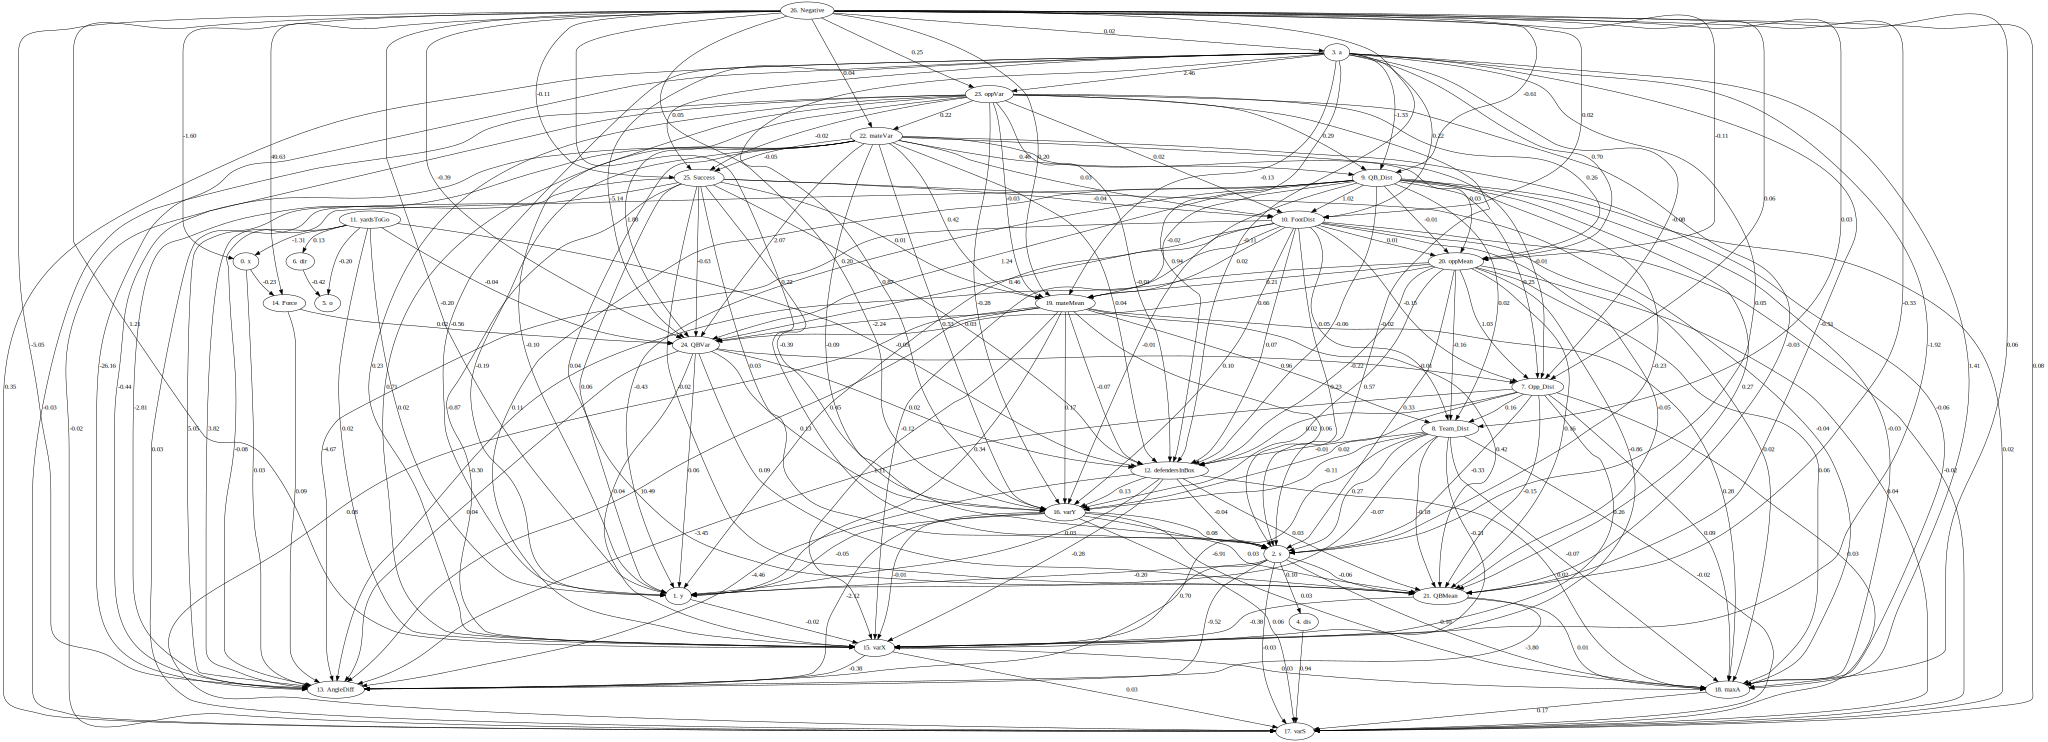

In [554]:
labels = [f'{i}. {col}' for i, col in enumerate(X.columns)]
make_graph(model.adjacency_matrix_, labels)

In [556]:
import lightgbm as lgb
target = 25
features = [i for i in range(X.shape[1]) if i != target]
classifier = lgb.LGBMClassifier(random_state=0)
classifier.fit(X.iloc[:, features], X.iloc[:, target])

LGBMClassifier(random_state=0)

In [557]:
ce = lingam.CausalEffect(model)
effects = ce.estimate_effects_on_prediction(X, target, classifier)

df_effects = pd.DataFrame()
df_effects['feature'] = X.columns
df_effects['effect_plus'] = effects[:, 0]
df_effects['effect_minus'] = effects[:, 1]
df_effects

feature  effect_plus  effect_minus
0                x       0.0047        0.0017
1                y       0.0183        0.0000
2                s       0.0947        0.0278
3                a       0.1390        0.3962
4              dis       0.0506        0.0127
5                o       0.0029        0.0000
6              dir       0.0000        0.0160
7         Opp_Dist       0.0185        0.0035
8        Team_Dist       0.0400        0.0065
9          QB_Dist       0.0087        0.2854
10        FootDist       0.0835        0.0073
11       yardsToGo       0.0016        0.0034
12  defendersInBox       0.0140        0.0068
13       AngleDiff       0.0345        0.0189
14           Force       0.0118        0.0709
15            varX       0.0692        0.4370
16            varY       0.0551        0.2082
17            varS       0.0322        0.0407
18            maxA       0.0204        0.0396
19        mateMean       0.0615        0.0711
20         oppMean       0.0334        0.0171
21          QBMean       0.0808        0.2408
22         mateVar       0.0490        0.4023
23          oppVar       0.2776        0.5063
24           QBVar       0.0217        0.4192
25         Success       0.0314        0.0261
26        Negative       0.0198        0.1112

In [558]:
max_index = np.unravel_index(np.argmax(effects), effects.shape)
print(X.columns[max_index[0]])

oppVar


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor, XGBClassifier
import warnings

# from causalml.inference.meta import XGBTLearner, MLPTLearner
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.meta import BaseSClassifier, BaseTClassifier, BaseXClassifier, BaseRClassifier
from causalml.inference.meta import LRSRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# imports from package
import logging
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as sm
from copy import deepcopy

logger = logging.getLogger('causalml')
logging.basicConfig(level=logging.INFO)

%matplotlib inline

In [63]:
# split into X, y, and treatment
y = offensive_line['Success']
treatment = offensive_line['Negative']
X = offensive_line.drop(columns=['gameId', 'playId', 'nflId', 'frameId', 'displayName',
       'officialPosition', 'team', 'Negative',
       'Success'])

In [64]:
X.columns

Index(['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'Opp_Dist', 'Team_Dist',
       'QB_Dist', 'FootDist', 'yardsToGo', 'defendersInBox', 'AngleDiff',
       'Force', 'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean',
       'QBMean', 'mateVar', 'oppVar', 'QBVar'],
      dtype='object')

In [76]:

alpha = 0.05
learner_s = BaseSClassifier(XGBClassifier(), ate_alpha=alpha, control_name=0)
slearner_tau = learner_s.fit_predict(X=X, treatment=treatment, y=y, return_ci=False
                               )

# Using SHAP
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)

# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau)

# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

INFO:causalml:Error metrics for group 1.0
INFO:causalml:     AUC   (Control):     0.8442
INFO:causalml:     AUC (Treatment):     0.8653
INFO:causalml:Log Loss   (Control):     0.5131
INFO:causalml:Log Loss (Treatment):     0.4700


AttributeError: 'BaseSClassifier' object has no attribute '_classes'

In [65]:
alpha = 0.05
learner_s = BaseSClassifier(XGBClassifier(), ate_alpha=alpha, control_name=0)
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y, return_ci=False
                               )

INFO:causalml:Error metrics for group 1.0
INFO:causalml:     AUC   (Control):     0.8442
INFO:causalml:     AUC (Treatment):     0.8653
INFO:causalml:Log Loss   (Control):     0.5131
INFO:causalml:Log Loss (Treatment):     0.4700


In [66]:
cate_s.mean()

-0.033406489414306795

In [67]:
learner_t = BaseTClassifier(XGBClassifier(), control_name=0)
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)

INFO:causalml:Error metrics for group 1.0
INFO:causalml:     AUC   (Control):     0.8628
INFO:causalml:     AUC (Treatment):     0.9995
INFO:causalml:Log Loss   (Control):     0.4962
INFO:causalml:Log Loss (Treatment):     0.1583


In [68]:
cate_t.mean()

-0.03444910482251329

In [5]:
import matplotlib.style
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

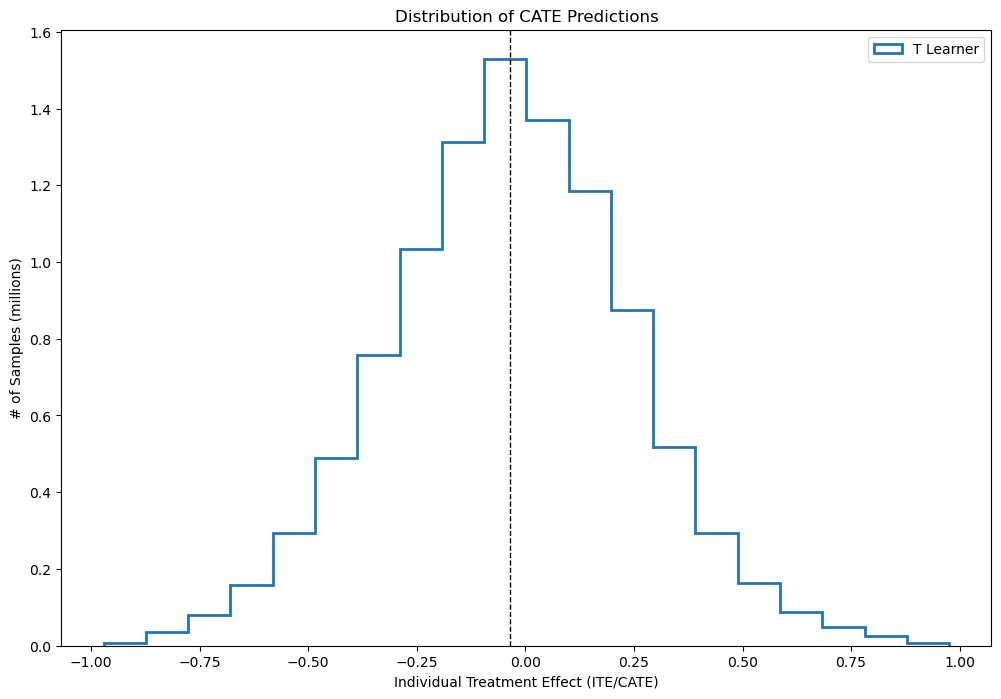

In [70]:
alpha = 1
linewidth = 2
bins = 20
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner',
             histtype='step', linewidth=linewidth, density=True)
plt.axvline(cate_t.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of CATE Predictions')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples (millions)')
_=plt.legend()

In [54]:
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

from causallib.datasets import load_nhefs
from causallib.estimation import Standardization, StratifiedStandardization, XLearner
from causallib.evaluation import evaluate
from causallib.estimation import IPW


warnings.filterwarnings("ignore")
%matplotlib inline

In [55]:
# split into X, y, and a
y = offensive_line['Success']
a = offensive_line['Negative']
X = offensive_line.drop(columns=['gameId', 'playId', 'nflId', 'frameId', 'displayName',
       'officialPosition', 'team', 'Negative',
       'Success'])

In [204]:
offensive_line

gameId  playId      nflId  frameId  displayName officialPosition  \
178      2021090900      97 40151.0000        7  Ryan Jensen                C   
179      2021090900      97 40151.0000        8  Ryan Jensen                C   
180      2021090900      97 40151.0000        9  Ryan Jensen                C   
181      2021090900      97 40151.0000       10  Ryan Jensen                C   
182      2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
8314642  2021110100    4433 52507.0000       54   Matt Peart                T   
8314643  2021110100    4433 52507.0000       55   Matt Peart                T   
8314644  2021110100    4433 52507.0000       56   Matt Peart                T   
8314645  2021110100    4433 52507.0000       57   Matt Peart                T   
8314646  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
178       TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
179       TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
180       TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
181       TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
182       TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
8314642  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
8314643  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
8314644  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
8314645  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
8314646  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
178         1.5535   4.4745    0.9675          2          6.0000   108.1700   
179         1.5512   4.4825    1.2490          2          6.0000   117.0500   
180         1.4901   4.4807    1.6013          2          6.0000   118.6400   
181         1.4200   4.4700    1.9673          2          6.0000   121.1400   
182         1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
8314642     1.6199   2.4468    2.8940         15          6.0000    23.7500   
8314643     1.6876   2.4564    2.9286         15          6.0000    26.0700   
8314644     1.7168   2.4531    2.9665         15          6.0000    27.5100   
8314645     1.7682   2.4085    2.9769         15          6.0000    28.1200   
8314646     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
178     679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
179     586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
180     430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
181     347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
182     312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
8314642 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314643 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314644 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314645 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314646 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  
178       0.2128  0.1466 0.0733        0    0.0000  
179       0.2128  0.1466 0.0733        0    0.0000  
180       0.2128  0.1466 0.0733        0    0.0000  
181       0.2128 

In [205]:
gb = GradientBoostingClassifier()
ipw = IPW(gb)

In [206]:
ipw.fit(X, a)

IPW(clip_max=None, clip_min=None, use_stabilized=False, verbose=False,
    learner=GradientBoostingClassifier())

In [207]:
outcomes = ipw.estimate_population_outcome(X, a, y)
outcomes

0.0000   0.5171
1.0000   0.4844
dtype: float64

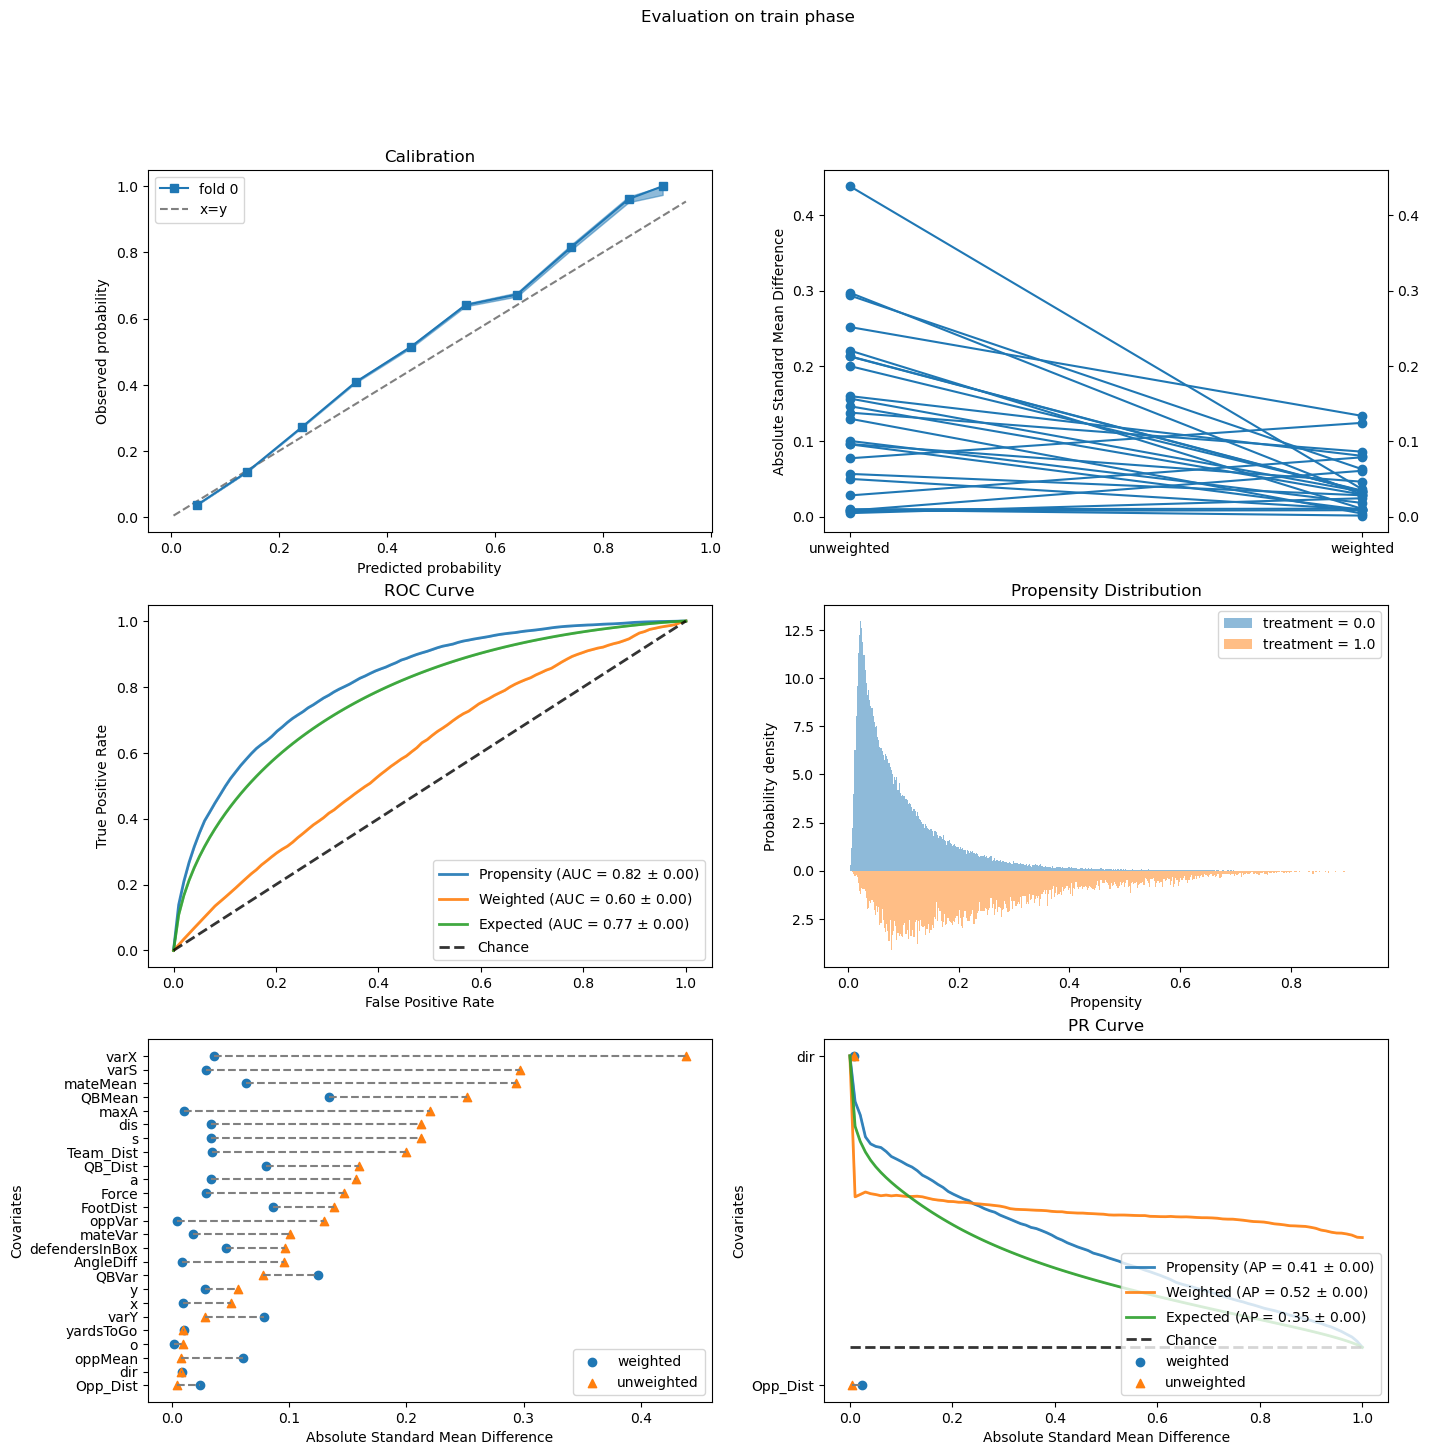

In [208]:
eval_results = evaluate(ipw, X, a, y, cv='auto')
eval_results.plot_all()
eval_results.plot_covariate_balance(kind="love");

## Standardization

In [209]:
std = Standardization(gb, predict_proba=True)
std.fit(X, a, y)

Standardization(encode_treatment=False, predict_proba=True,
                learner=GradientBoostingClassifier())

In [210]:
outcomes = std.estimate_population_outcome(X, a, y)
print(outcomes)
std.estimate_effect(outcomes[0], outcomes[1], effect_types=['diff','ratio'])

Negative  y
0.0000    0   0.4864
          1   0.5136
1.0000    0   0.5056
          1   0.4944
dtype: float64


diff    0.0000
ratio   1.0000
dtype: float64

In [211]:
ind_outcomes = std.estimate_individual_outcome(X, a, treatment_values=1)
ind_outcomes

Negative      1       
y             0      1
178      0.4846 0.5154
179      0.4866 0.5134
180      0.4993 0.5007
181      0.5023 0.4977
182      0.4959 0.5041
...         ...    ...
8314642  0.7217 0.2783
8314643  0.6992 0.3008
8314644  0.6892 0.3108
8314645  0.6857 0.3143
8314646  0.6790 0.3210

[1301900 rows x 2 columns]

In [212]:
ind_outcomes = std.estimate_individual_outcome(X, a)
ind_outcomes

Negative 0.0000        1.0000       
y             0      1      0      1
178      0.4584 0.5416 0.4846 0.5154
179      0.4628 0.5372 0.4866 0.5134
180      0.4800 0.5200 0.4993 0.5007
181      0.4830 0.5170 0.5023 0.4977
182      0.4766 0.5234 0.4959 0.5041
...         ...    ...    ...    ...
8314642  0.7059 0.2941 0.7217 0.2783
8314643  0.6827 0.3173 0.6992 0.3008
8314644  0.6724 0.3276 0.6892 0.3108
8314645  0.6688 0.3312 0.6857 0.3143
8314646  0.6585 0.3415 0.6790 0.3210

[1301900 rows x 4 columns]

In [213]:
estimate_effect = pd.DataFrame(std.estimate_effect(ind_outcomes[1], ind_outcomes[0], agg="diff"))
estimate_effect.to_csv('estimate_effect.csv', index=0)
estimate_effect

effect_type   diff        
y                0       1
178         0.0263 -0.0263
179         0.0238 -0.0238
180         0.0193 -0.0193
181         0.0193 -0.0193
182         0.0193 -0.0193
...            ...     ...
8314642     0.0158 -0.0158
8314643     0.0165 -0.0165
8314644     0.0168 -0.0168
8314645     0.0169 -0.0169
8314646     0.0205 -0.0205

[1301900 rows x 2 columns]

In [214]:
est = pd.read_csv('estimate_effect.csv')
est

diff  diff.1
0       0.0000  1.0000
1       0.0263 -0.0263
2       0.0238 -0.0238
3       0.0193 -0.0193
4       0.0193 -0.0193
...        ...     ...
1301896 0.0158 -0.0158
1301897 0.0165 -0.0165
1301898 0.0168 -0.0168
1301899 0.0169 -0.0169
1301900 0.0205 -0.0205

[1301901 rows x 2 columns]

In [215]:
# drop first row
est = est.iloc[1:, :].reset_index()
est

index   diff  diff.1
0              1 0.0263 -0.0263
1              2 0.0238 -0.0238
2              3 0.0193 -0.0193
3              4 0.0193 -0.0193
4              5 0.0193 -0.0193
...          ...    ...     ...
1301895  1301896 0.0158 -0.0158
1301896  1301897 0.0165 -0.0165
1301897  1301898 0.0168 -0.0168
1301898  1301899 0.0169 -0.0169
1301899  1301900 0.0205 -0.0205

[1301900 rows x 3 columns]

In [216]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301900 entries, 0 to 1301899
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   index   1301900 non-null  int64  
 1   diff    1301900 non-null  float64
 2   diff.1  1301900 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 29.8 MB


In [217]:
est.isna().sum()

index     0
diff      0
diff.1    0
dtype: int64

In [218]:
offensive_line.reset_index(drop=True, inplace=True)
offensive_line

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  
0         0.2128  0.1466 0.0733        0    0.0000  
1         0.2128  0.1466 0.0733        0    0.0000  
2         0.2128  0.1466 0.0733        0    0.0000  
3         0.2128 

In [219]:
offensive_line['Diff0'] = est['diff']
offensive_line['Diff1'] = est['diff.1']
offensive_line

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  Diff0   Diff1  
0         0.2128  0.1466 0.0733        0    0.0000 0.0263 -0.0263  
1         0.2128  0.1466 0.0733        0    0.0000 0.0238 -0.0238  
2         0.2128  0.1466 

## Causal Analysis
How much does the performance of an offensive lineman change the probability of a successful pass play?

In [222]:
offense = offensive_line.copy()
offense

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  Diff0   Diff1  
0         0.2128  0.1466 0.0733        0    0.0000 0.0263 -0.0263  
1         0.2128  0.1466 0.0733        0    0.0000 0.0238 -0.0238  
2         0.2128  0.1466 

In [223]:
offense['Prob'] = np.where(offense['Negative']==0, offense['Diff0'], offense['Diff1'])
offense

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  Diff0   Diff1    Prob  
0         0.2128  0.1466 0.0733        0    0.0000 0.0263 -0.0263  0.0263  
1         0.2128  0.1466 0.0733        0    0.0000 0.0238 -0.0238  0.0238  
2

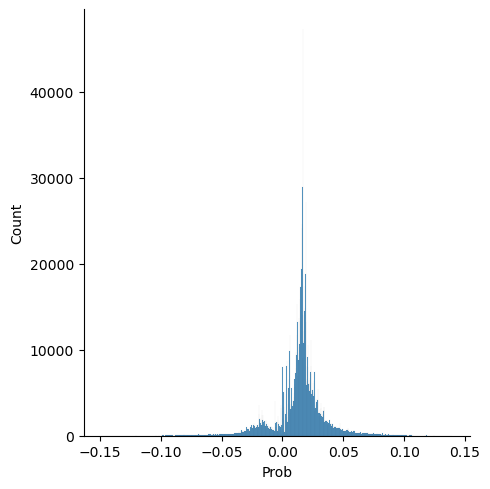

In [227]:
sns.displot(offense['Prob']);

In [228]:
offense['Prob'].describe()

count   1301900.0000
mean          0.0144
std           0.0215
min          -0.1489
25%           0.0085
50%           0.0162
75%           0.0223
max           0.1396
Name: Prob, dtype: float64

In [247]:
snaps = offense.groupby(['displayName', 'gameId', 'officialPosition', 'team'])['playId'].nunique().rename('Snaps').reset_index()
snaps = snaps.groupby(['displayName', 'officialPosition', 'team'])['Snaps'].sum().rename('Snaps').reset_index()
snaps.sort_values(by='Snaps', ascending=False)
snaps

displayName officialPosition team  Snaps
0        A.J. Cann                G  JAX    104
1      A.J. Dillon               RB   GB     16
2     Aaron Brewer                C  TEN     44
3      Aaron Jones               RB   GB     25
4    Aaron Stinnie                G   TB      3
..             ...              ...  ...    ...
529      Zach Ertz               TE  ARI      1
530      Zach Ertz               TE  PHI      5
531    Zach Gentry               TE  PIT     16
532    Zack Martin                G  DAL    202
533      Zack Moss               RB  BUF     16

[534 rows x 4 columns]

In [248]:
prob = offense.groupby(['displayName', 'officialPosition', 'team'])['Prob'].mean().reset_index()
prob

displayName officialPosition team   Prob
0        A.J. Cann                G  JAX 0.0132
1      A.J. Dillon               RB   GB 0.0204
2     Aaron Brewer                C  TEN 0.0104
3      Aaron Jones               RB   GB 0.0313
4    Aaron Stinnie                G   TB 0.0397
..             ...              ...  ...    ...
529      Zach Ertz               TE  ARI 0.0173
530      Zach Ertz               TE  PHI 0.0170
531    Zach Gentry               TE  PIT 0.0213
532    Zack Martin                G  DAL 0.0148
533      Zack Moss               RB  BUF 0.0145

[534 rows x 4 columns]

In [480]:
offense

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  Diff0   Diff1    Prob  
0         0.2128  0.1466 0.0733        0    0.0000 0.0263 -0.0263  0.0263  
1         0.2128  0.1466 0.0733        0    0.0000 0.0238 -0.0238  0.0238  
2

In [651]:
teamprob = offense.groupby(['playId', 'gameId', 'frameId', 'team'])['Prob'].sum().rename('Prob').reset_index()
teamprob = teamprob.groupby(['team'])['Prob'].mean().rename('Prob').reset_index()
teamprob.sort_values(by='Prob', ascending=False)

team   Prob
28   SF 0.0981
27  SEA 0.0958
16   LA 0.0921
1   ATL 0.0885
20  MIN 0.0858
7   CLE 0.0824
2   BAL 0.0821
12  HOU 0.0817
9   DEN 0.0813
22   NO 0.0810
31  WAS 0.0795
29   TB 0.0786
5   CHI 0.0781
8   DAL 0.0777
26  PIT 0.0771
10  DET 0.0765
0   ARI 0.0760
21   NE 0.0758
14  JAX 0.0757
11   GB 0.0752
23  NYG 0.0749
25  PHI 0.0747
4   CAR 0.0732
30  TEN 0.0732
18   LV 0.0730
15   KC 0.0730
19  MIA 0.0729
17  LAC 0.0726
6   CIN 0.0726
13  IND 0.0718
24  NYJ 0.0682
3   BUF 0.0592

In [250]:
var = offense.groupby(['displayName', 'officialPosition', 'team'])['Prob'].var().rename('Var').reset_index()
var

displayName officialPosition team    Var
0        A.J. Cann                G  JAX 0.0005
1      A.J. Dillon               RB   GB 0.0011
2     Aaron Brewer                C  TEN 0.0006
3      Aaron Jones               RB   GB 0.0007
4    Aaron Stinnie                G   TB 0.0006
..             ...              ...  ...    ...
529      Zach Ertz               TE  ARI 0.0001
530      Zach Ertz               TE  PHI 0.0005
531    Zach Gentry               TE  PIT 0.0002
532    Zack Martin                G  DAL 0.0003
533      Zack Moss               RB  BUF 0.0011

[534 rows x 4 columns]

In [251]:
causal = snaps.merge(prob, on=['displayName', 'officialPosition', 'team'], how='inner')
causal = causal.merge(var, on=['displayName', 'officialPosition', 'team'], how='inner')
causal.sort_values(by='Snaps', ascending=False).head(50)

displayName officialPosition team  Snaps   Prob    Var
361            Matt Nelson                T  DET    317 0.0109 0.0006
282          Jonah Jackson                G  DET    317 0.0153 0.0003
413           Penei Sewell                T  DET    316 0.0105 0.0004
212  Halapoulivaati Vaitai                G  DET    316 0.0172 0.0004
273             Joe Thuney                G   KC    307 0.0141 0.0004
407          Orlando Brown                T   KC    307 0.0104 0.0004
125         Creed Humphrey                C   KC    307 0.0169 0.0003
496             Trey Smith                G   KC    307 0.0145 0.0004
13              Alex Cappa                G   TB    304 0.0149 0.0002
497          Tristan Wirfs                T   TB    304 0.0162 0.0002
447            Ryan Jensen                C   TB    303 0.0152 0.0002
170          Donovan Smith                T   TB    301 0.0135 0.0002
18              Ali Marpet                G   TB    301 0.0156 0.0002
433            Robert Hunt                G  MIA    288 0.0166 0.0003
237          Jake Matthews                T  ATL    283 0.0154 0.0005
98         Chris Lindstrom                G  ATL    283 0.0185 0.0005
360          Matt Hennessy                C  ATL    283 0.0163 0.0005
240         Jalen Mayfield                G  ATL    280 0.0113 0.0007
57            Bobby Massie                T  DEN    279 0.0124 0.0004
343      Lloyd Cushenberry                C  DEN    279 0.0145 0.0002
471           Taylor Moton                T  CAR    278 0.0122 0.0005
362           Matt Paradis                C  CAR    278 0.0144 0.0005
521         Will Hernandez                G  NYG    278 0.0151 0.0003
148          David Andrews                C   NE    276 0.0144 0.0002
267            Jesse Davis                T  MIA    271 0.0115 0.0005
89            Charles Leno                T  WAS    270 0.0120 0.0004
40          Austin Jackson                T  MIA    269 0.0089 0.0004
197          Garett Bolles                T  DEN    269 0.0162 0.0004
180          Ereck Flowers                G  WAS    268 0.0152 0.0003
116        Connor McGovern                C  NYJ    265 0.0109 0.0006
19      Alijah Vera-Tucker                G  NYJ    265 0.0116 0.0007
211         Greg Van Roten                G  NYJ    265 0.0139 0.0006
422         Rashawn Slater                T  LAC    264 0.0113 0.0005
153     David Quessenberry                G  TEN    264 0.0125 0.0006
359            Matt Feiler                G  LAC    264 0.0128 0.0004
342        Liam Eichenberg                T  MIA    264 0.0095 0.0005
123          Corey Linsley                C  LAC    264 0.0166 0.0003
47               Ben Jones                C  TEN    260 0.0145 0.0004
394            Nate Solder                T  NYG    258 0.0117 0.0005
24             Andre James                C   LV    256 0.0155 0.0002
277           John Simpson                G   LV    256 0.0150 0.0003
320          Kolton Miller                T   LV    256 0.0151 0.0003
504          Tyler Biadasz                C  DAL    252 0.0159 0.0003
118        Connor Williams                G  DAL    252 0.0137 0.0003
392             Nate Davis                G  TEN    252 0.0110 0.0006
260          Jawaan Taylor                T  JAX    250 0.0129 0.0003
80            Cam Robinson                T  JAX    250 0.0105 0.0005
419          Quinton Spain                G  CIN    249 0.0169 0.0002
283         Jonah Williams                T  CIN    249 0.0114 0.0005
429            Riley Reiff                T  CIN    248 0.0116 0.0004

In [253]:
mask = causal['officialPosition'].isin(['RB', 'TE', 'WR', 'FB', 'LB', 'QB'])
causal = causal[~mask]
causal

displayName officialPosition team  Snaps    Prob    Var
0               A.J. Cann                G  JAX    104  0.0132 0.0005
2            Aaron Brewer                C  TEN     44  0.0104 0.0006
4           Aaron Stinnie                G   TB      3  0.0397 0.0006
7          Alaric Jackson                T   LA      2 -0.0296 0.0007
10   Alejandro Villanueva                T  BAL    224  0.0082 0.0005
..                    ...              ...  ...    ...     ...    ...
525      Xavier Su'a-Filo                G  CIN     59  0.0147 0.0003
526          Yasir Durant                G   NE     38  0.0137 0.0003
527         Yodny Cajuste                T   NE     34  0.0139 0.0002
528         Yosuah Nijman                T   GB     91  0.0165 0.0005
532           Zack Martin                G  DAL    202  0.0148 0.0003

[274 rows x 6 columns]

In [254]:
causal['officialPosition'].value_counts()

T    121
G     98
C     55
Name: officialPosition, dtype: int64

In [255]:
causal.sort_values(by='Prob', ascending=False).head(50)

displayName officialPosition team  Snaps   Prob    Var
4            Aaron Stinnie                G   TB      3 0.0397 0.0006
480          Tommy Kraemer                G  DET      1 0.0383 0.0001
489          Trenton Brown                T   NE      2 0.0344 0.0001
220          Isaiah Prince                T  CIN      5 0.0324 0.0003
478            Tommy Doyle                T  BUF      1 0.0278 0.0000
84          Cedric Ogbuehi                T  SEA     19 0.0221 0.0009
460         Senio Kelemete                G  LAC      2 0.0220 0.0000
432         Robert Hainsey                T   TB      1 0.0215 0.0000
193           Fred Johnson                T  CIN      3 0.0208 0.0004
25             Andre Smith                T  BAL     18 0.0207 0.0004
171            Drew Dalman                C  ATL      3 0.0203 0.0003
523        Will Richardson                T  JAX     28 0.0203 0.0001
445             Ryan Bates                C  BUF      3 0.0200 0.0010
308           Keith Ismael                C  WAS      2 0.0200 0.0000
418          Quinn Meinerz                G  DEN     45 0.0196 0.0003
261           Jaylon Moore                T   SF     39 0.0191 0.0005
510           Tyler Larsen                C  WAS     27 0.0190 0.0001
66         Brandon Scherff                G  WAS     98 0.0189 0.0003
48              Ben Powers                G  BAL    185 0.0188 0.0003
29        Andrew Whitworth                T   LA    211 0.0188 0.0004
196           Gabe Jackson                G  SEA    216 0.0187 0.0005
459            Sean Harlow                G  ARI     45 0.0185 0.0002
98         Chris Lindstrom                G  ATL    283 0.0185 0.0005
70           Brian O'Neill                T  MIN    247 0.0184 0.0004
16               Alex Mack                C   SF    200 0.0183 0.0003
452        Saahdiq Charles                T  WAS     38 0.0181 0.0006
67           Brandon Shell                T  SEA    163 0.0179 0.0008
377      Michael Schofield                G  LAC    104 0.0178 0.0003
331        Laken Tomlinson                G   SF    201 0.0178 0.0004
149          David Edwards                G   LA    244 0.0177 0.0003
322            Kyle Fuller                G  SEA    182 0.0176 0.0005
234           Jake Brendel                C   SF      1 0.0176 0.0000
102     Christian Darrisaw                T  MIN     87 0.0176 0.0009
192           Frank Ragnow                C  DET    130 0.0175 0.0002
37          Austin Corbett                G   LA    242 0.0174 0.0003
212  Halapoulivaati Vaitai                G  DET    316 0.0172 0.0004
274           Joel Bitonio                G  CLE    227 0.0172 0.0005
186            Ethan Pocic                C  SEA     34 0.0171 0.0010
134           Damien Lewis                G  SEA    172 0.0171 0.0007
222        J.C. Hassenauer                C  PIT     10 0.0170 0.0000
248            James Hurst                T   NO    114 0.0170 0.0002
73            Bryan Bulaga                T  LAC     27 0.0170 0.0002
223           J.C. Tretter                C  CLE    227 0.0170 0.0005
138       Daniel Brunskill                G   SF    201 0.0170 0.0004
243          Jamarco Jones                T  SEA     62 0.0169 0.0005
125         Creed Humphrey                C   KC    307 0.0169 0.0003
419          Quinton Spain                G  CIN    249 0.0169 0.0002
209         Graham Glasgow                G  DEN    197 0.0169 0.0003
438          Rodney Hudson                C  ARI    131 0.0168 0.0002
366             Max Garcia                C  ARI    107 0.0167 0.0001

In [256]:
causal.to_csv('causal.csv', index=False)

In [220]:
offensive_line.isna().sum()

gameId              0
playId              0
nflId               0
frameId             0
displayName         0
officialPosition    0
team                0
x                   0
y                   0
s                   0
a                   0
dis                 0
o                   0
dir                 0
Opp_Dist            0
Team_Dist           0
QB_Dist             0
FootDist            0
yardsToGo           0
defendersInBox      0
AngleDiff           0
Force               0
varX                0
varY                0
varS                0
maxA                0
mateMean            0
oppMean             0
QBMean              0
mateVar             0
oppVar              0
QBVar               0
Success             0
Negative            0
Diff0               0
Diff1               0
dtype: int64

{'train': {'calibration': <AxesSubplot:title={'center':'Calibration'}, xlabel='Predicted probability', ylabel='Observed probability'>,
  'roc_curve': <AxesSubplot:title={'center':'ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
  'pr_curve': <AxesSubplot:title={'center':'PR Curve'}, xlabel='Recall', ylabel='Precision'>}}

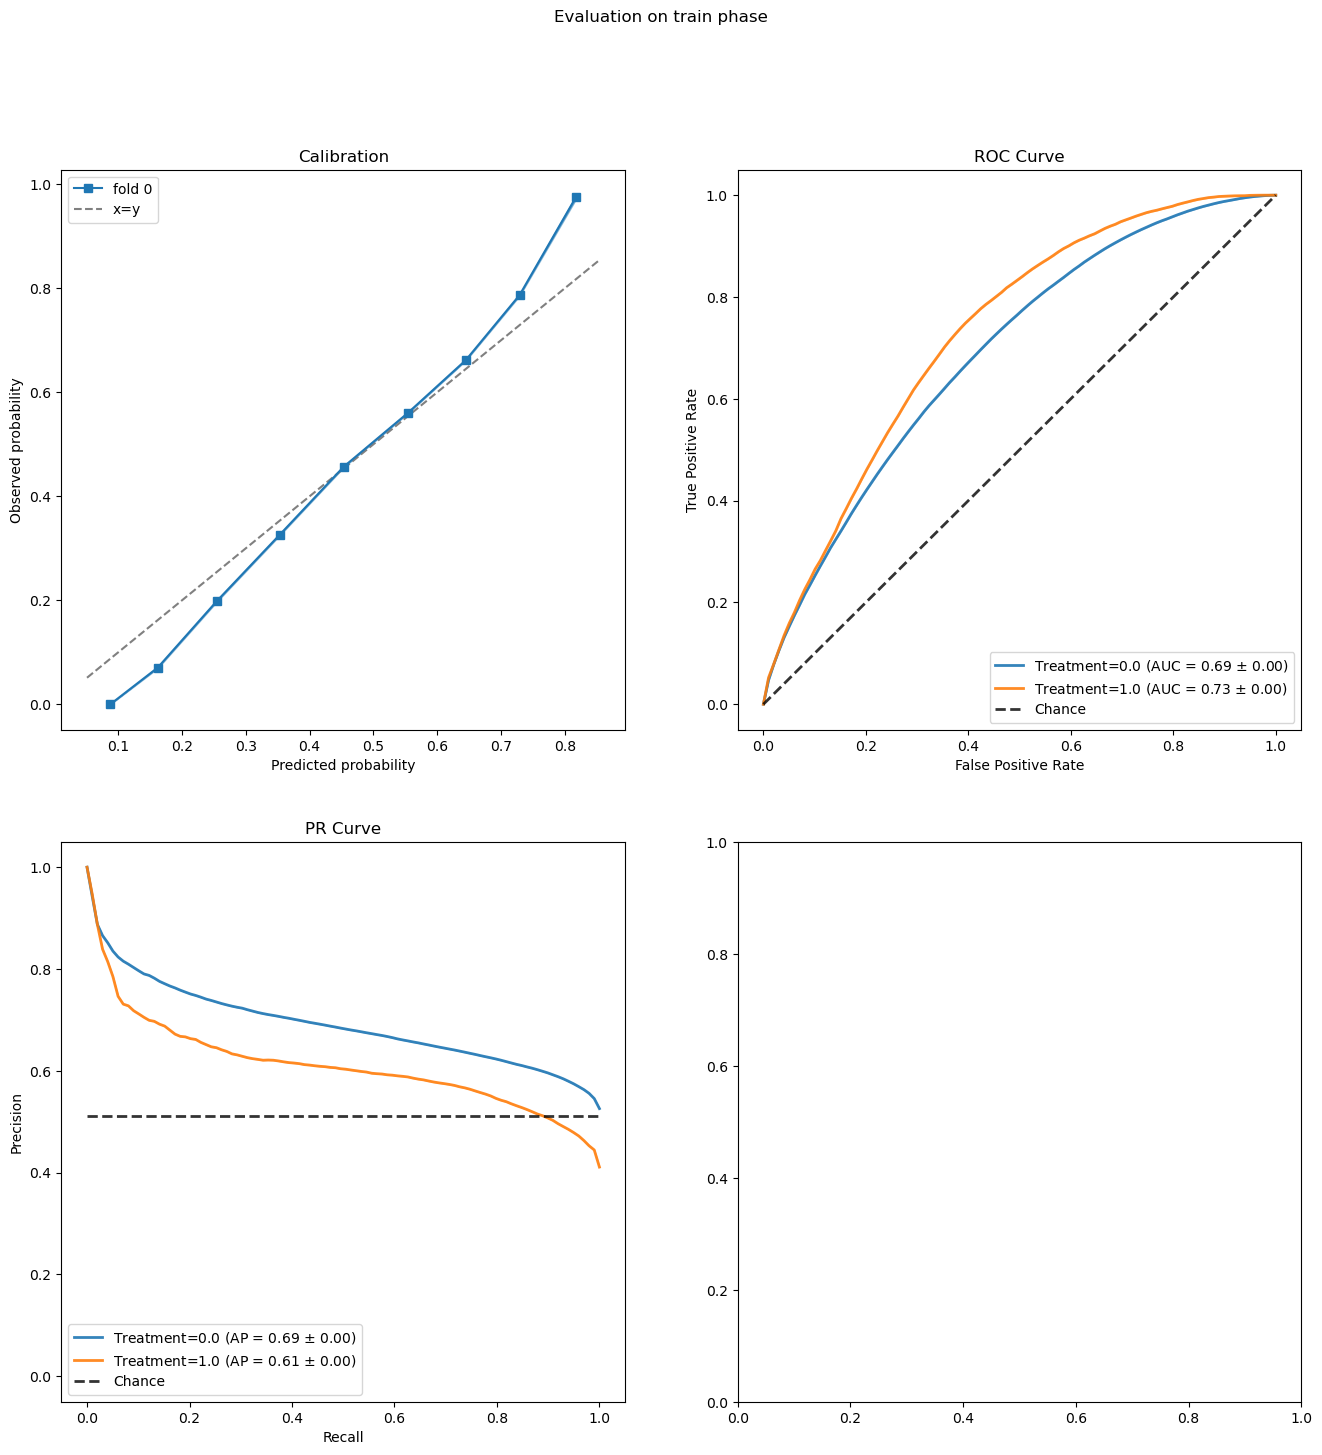

In [221]:
eval_results = evaluate(std, X, a, y)
eval_results.plot_all()

In [275]:
from causallib.estimation import StratifiedStandardization
std = StratifiedStandardization(gb, predict_proba=True)
std.fit(X, a, y)

outcomes = std.estimate_population_outcome(X, a, y)
print(outcomes)
std.estimate_effect(outcomes[0], outcomes[1], effect_types=['diff','ratio'])

Negative  y
0.0000    0   0.4841
          1   0.5159
1.0000    0   0.5311
          1   0.4689
dtype: float64


diff    -0.0000
ratio    1.0000
dtype: float64

In [276]:
estimate_effect = pd.DataFrame(std.estimate_effect(ind_outcomes[1], ind_outcomes[0], agg="diff"))
#estimate_effect.to_csv('estimate_effect.csv', index=0)
estimate_effect

effect_type   diff        
y                0       1
178         0.0263 -0.0263
179         0.0238 -0.0238
180         0.0193 -0.0193
181         0.0193 -0.0193
182         0.0193 -0.0193
...            ...     ...
8314642     0.0158 -0.0158
8314643     0.0165 -0.0165
8314644     0.0168 -0.0168
8314645     0.0169 -0.0169
8314646     0.0205 -0.0205

[1301900 rows x 2 columns]

{'train': {'calibration': <AxesSubplot:title={'center':'Calibration'}, xlabel='Predicted probability', ylabel='Observed probability'>,
  'roc_curve': <AxesSubplot:title={'center':'ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
  'pr_curve': <AxesSubplot:title={'center':'PR Curve'}, xlabel='Recall', ylabel='Precision'>}}

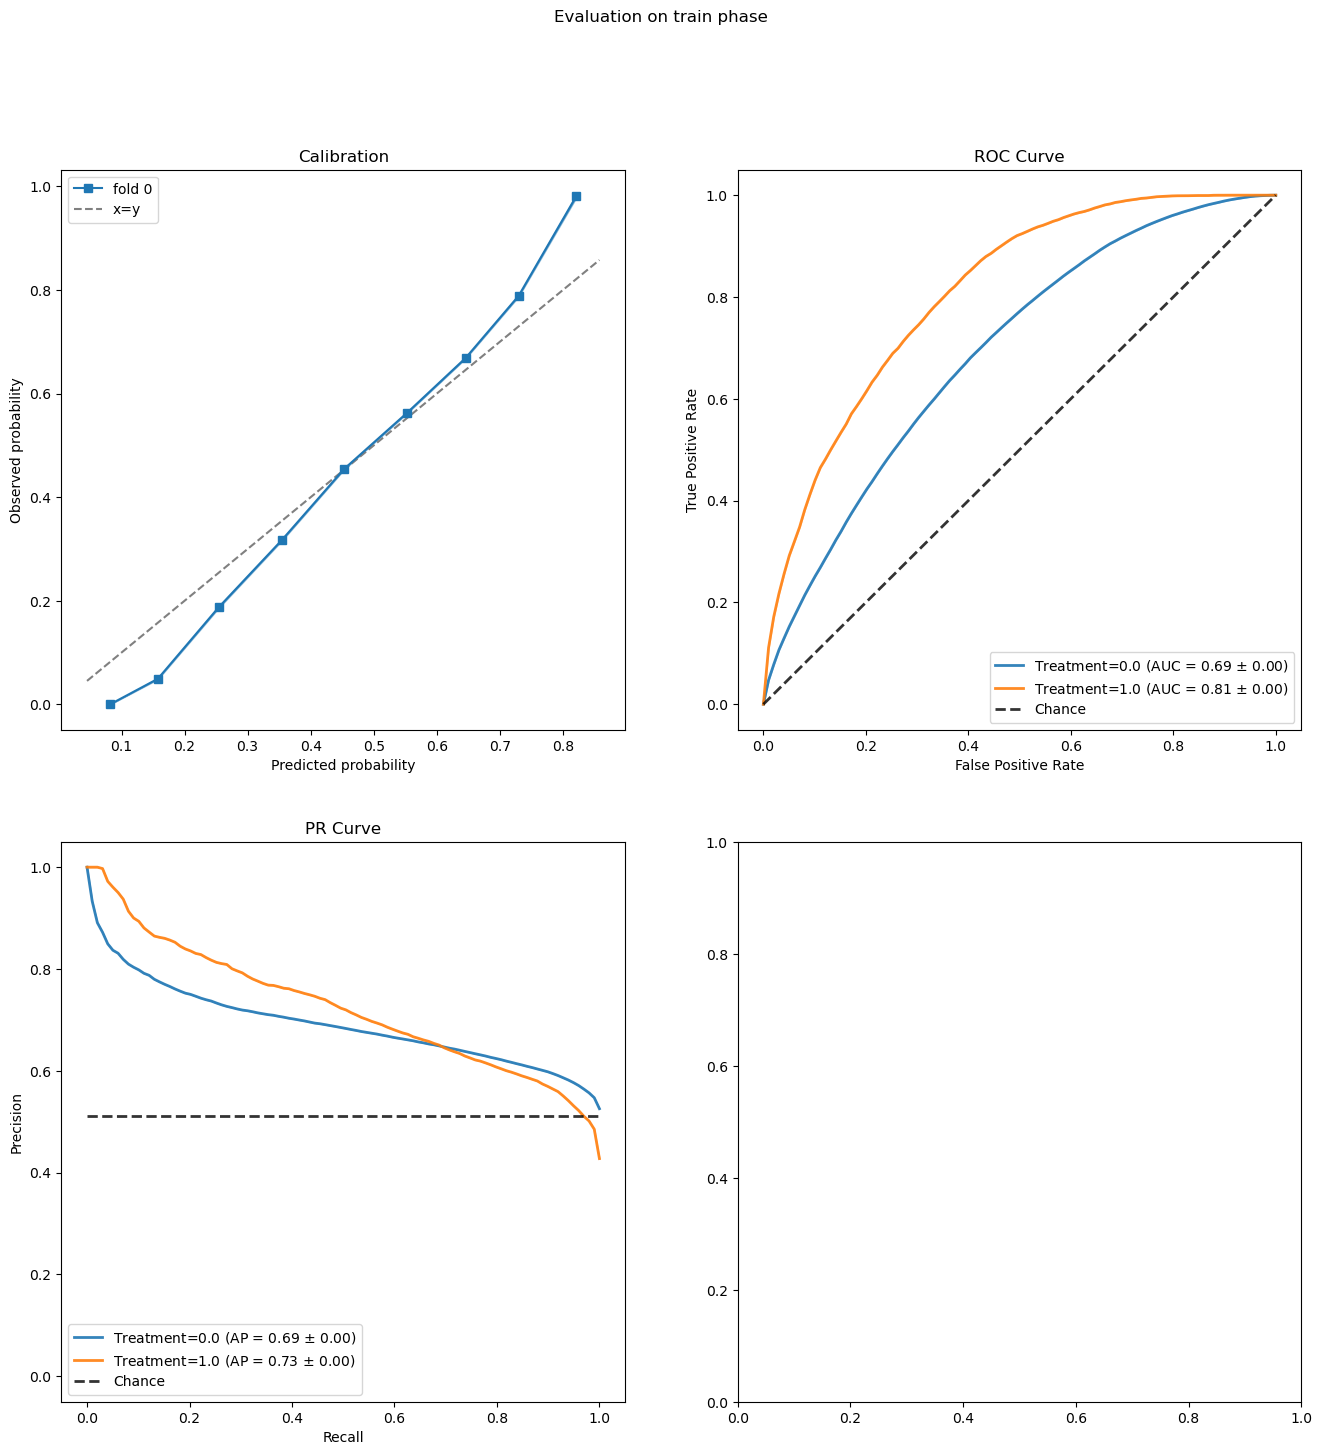

In [277]:
eval_results = evaluate(std, X, a, y)
eval_results.plot_all()

## Doubly Robust

In [56]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from causallib.datasets import load_nhefs
from causallib.estimation import IPW, Standardization, StratifiedStandardization
from causallib.estimation import AIPW, PropensityFeatureStandardization, WeightedStandardization
from causallib.evaluation import evaluate

In [57]:
# split into X, y, and a
y = offensive_line['Success']
a = offensive_line['Negative']
X = offensive_line.drop(columns=['gameId', 'playId', 'nflId', 'frameId', 'displayName',
       'officialPosition', 'team', 'Negative',
       'Success'])

In [58]:
X.columns

Index(['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'Opp_Dist', 'Team_Dist',
       'QB_Dist', 'FootDist', 'yardsToGo', 'defendersInBox', 'AngleDiff',
       'Force', 'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean',
       'QBMean', 'mateVar', 'oppVar', 'QBVar'],
      dtype='object')

In [59]:
offensive_line

gameId  playId    nflId  frameId  displayName officialPosition  \
178      2021090900      97  40151.0        7  Ryan Jensen                C   
179      2021090900      97  40151.0        8  Ryan Jensen                C   
180      2021090900      97  40151.0        9  Ryan Jensen                C   
181      2021090900      97  40151.0       10  Ryan Jensen                C   
182      2021090900      97  40151.0       11  Ryan Jensen                C   
...             ...     ...      ...      ...          ...              ...   
8314642  2021110100    4433  52507.0       54   Matt Peart                T   
8314643  2021110100    4433  52507.0       55   Matt Peart                T   
8314644  2021110100    4433  52507.0       56   Matt Peart                T   
8314645  2021110100    4433  52507.0       57   Matt Peart                T   
8314646  2021110100    4433  52507.0       58   Matt Peart                T   

        team      x      y     s     a   dis      o     dir  Opp_Dist  \
178       TB  42.03  24.06  0.79  2.13  0.07  53.21  305.04  1.691774   
179       TB  41.95  24.10  1.00  1.84  0.09  57.07  300.02  1.647695   
180       TB  41.86  24.16  1.17  1.35  0.11  59.92  301.28  1.569841   
181       TB  41.74  24.24  1.39  1.09  0.14  62.96  301.82  1.478276   
182       TB  41.58  24.31  1.62  0.98  0.18  71.03  297.56  1.436837   
...      ...    ...    ...   ...   ...   ...    ...     ...       ...   
8314642  NYG  21.51  26.75  2.05  0.37  0.22  55.95   32.20  1.793349   
8314643  NYG  21.63  26.97  2.32  0.56  0.25  55.95   29.88  1.757555   
8314644  NYG  21.75  27.19  2.45  0.44  0.25  55.95   28.44  1.681577   
8314645  NYG  21.88  27.45  2.64  0.59  0.28  55.16   27.04  1.571782   
8314646  NYG  22.01  27.70  2.77  0.35  0.29  55.16   26.73  1.439618   

         Team_Dist   QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
178       1.553480  4.474472  0.967471          2             6.0     108.17   
179       1.551161  4.482510  1.249040          2             6.0     117.05   
180       1.490134  4.480714  1.601312          2             6.0     118.64   
181       1.420035  4.470011  1.967257          2             6.0     121.14   
182       1.360037  4.440912  2.320797          2             6.0     133.47   
...            ...       ...       ...        ...             ...        ...   
8314642   1.619877  2.446753  2.893994         15             6.0      23.75   
8314643   1.687602  2.456379  2.928566         15             6.0      26.07   
8314644   1.716770  2.453080  2.966547         15             6.0      27.51   
8314645   1.768191  2.408527  2.976928         15             6.0      28.12   
8314646   1.797776  2.347850  2.995413         15             6.0      28.43   

          Force      varX      varY      varS  maxA  mateMean   oppMean  \
178      679.47  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
179      586.96  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
180      430.65  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
181      347.71  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
182      312.62  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
...         ...       ...       ...       ...   ...       ...       ...   
8314642  112.11  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314643  169.68  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314644  133.32  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314645  178.77  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314646  106.05  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   

           QBMean   mateVar    oppVar     QBVar  Success  Negative  
178      4.620958  0.212786  0.146570  0.073307        0       0.0  
179      4.620958  0.212786  0.146570  0.073307        0       0.0  
180      4.620958  0.212786  0.146570  0.073307        0       0.0  
181      4.620958  0.212786  0.146570  0.073307  

In [333]:
ipw = IPW(gb)
std = Standardization(LinearRegression())
dr = PropensityFeatureStandardization(std, ipw)
dr.fit(X, a, y);

In [61]:
ipw = IPW(GradientBoostingClassifier())
std = Standardization(GradientBoostingRegressor())
dr = PropensityFeatureStandardization(std, ipw)
dr.fit(X, a, y);

In [62]:
pop_outcome = dr.estimate_population_outcome(X, a)
pop_outcome

Negative
0.0    0.470995
1.0    0.465174
dtype: float64

In [63]:
dr.estimate_effect(pop_outcome[1], pop_outcome[0])

diff   -0.005821
dtype: float64

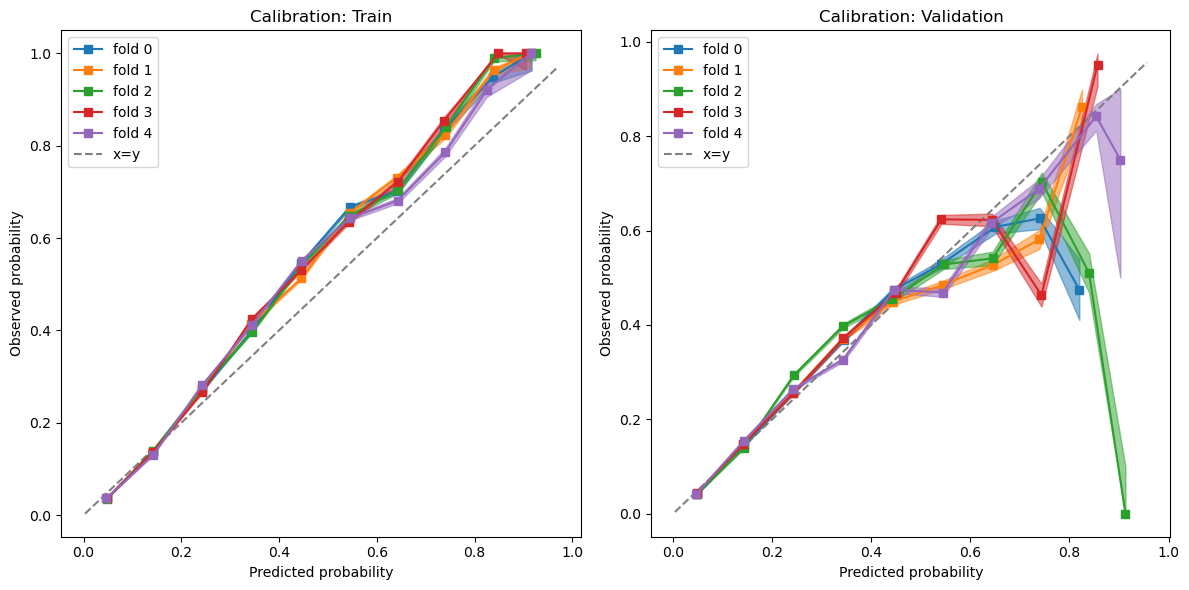

In [66]:
fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_calibration_curve(ax=a0)
results.plot_calibration_curve(phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

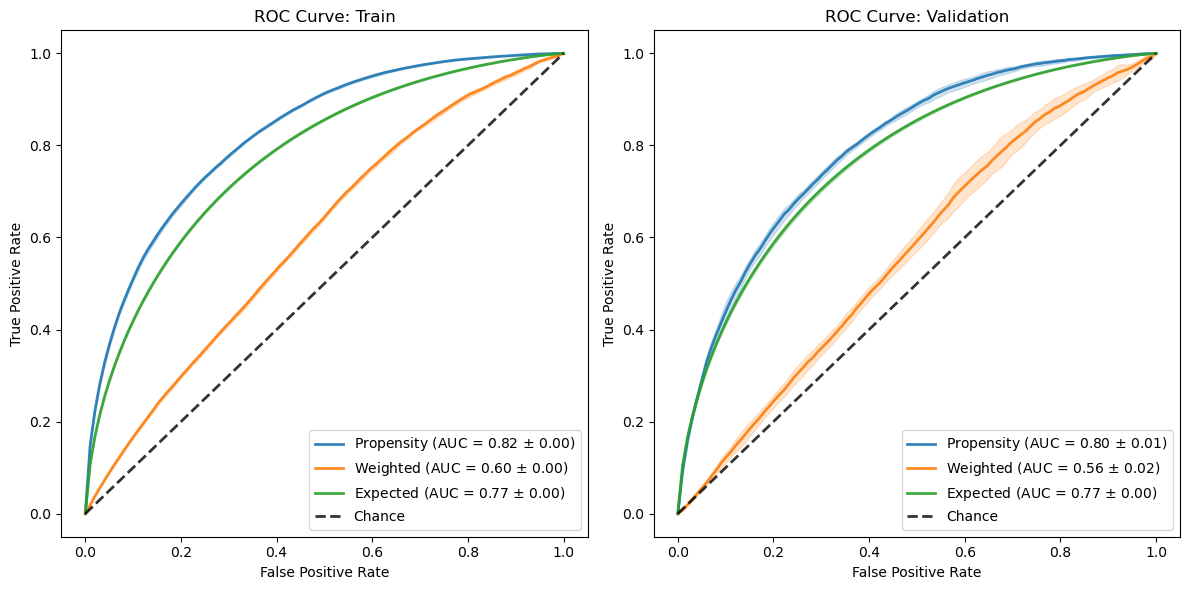

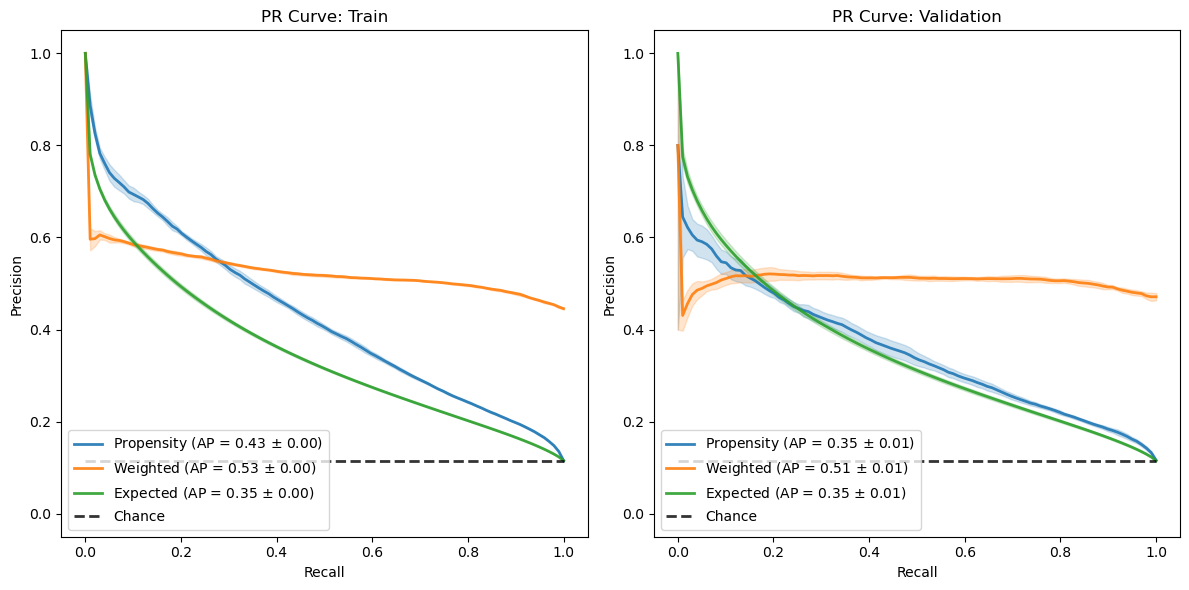

In [67]:

fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_roc_curve(ax=a0)
results.plot_roc_curve(phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_pr_curve(ax=a0)
results.plot_pr_curve(phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();


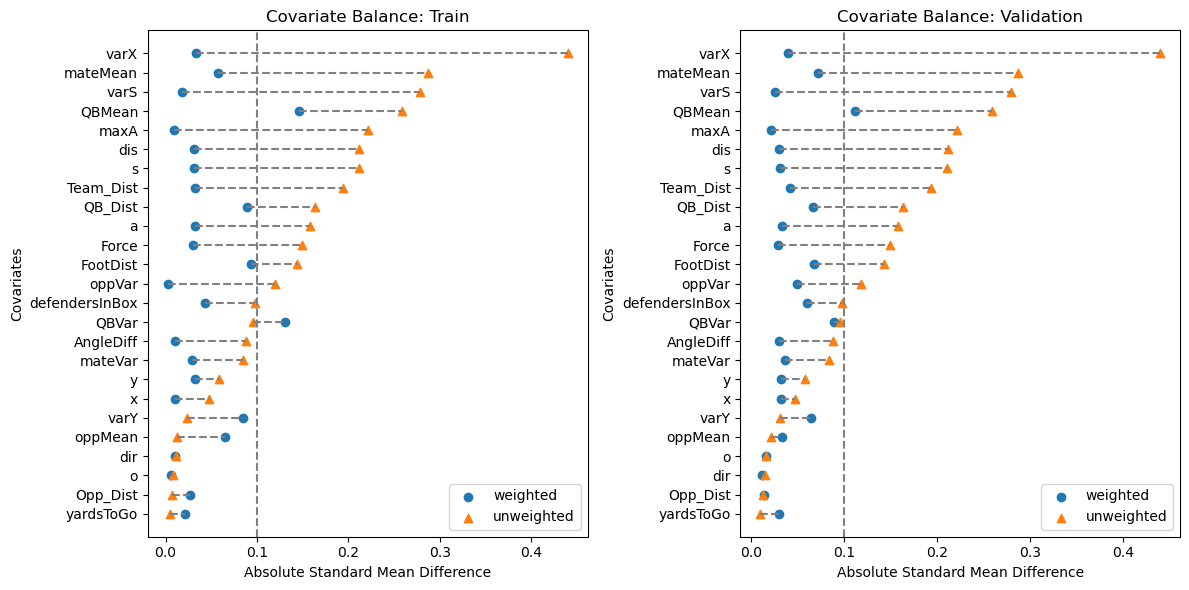

In [115]:
fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_covariate_balance(kind="love", phase="train", ax=a0, thresh=0.1)
results.plot_covariate_balance(kind="love", phase="valid", ax=a1, thresh=0.1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + "Covariate Balance: " + suffix)
plt.tight_layout();

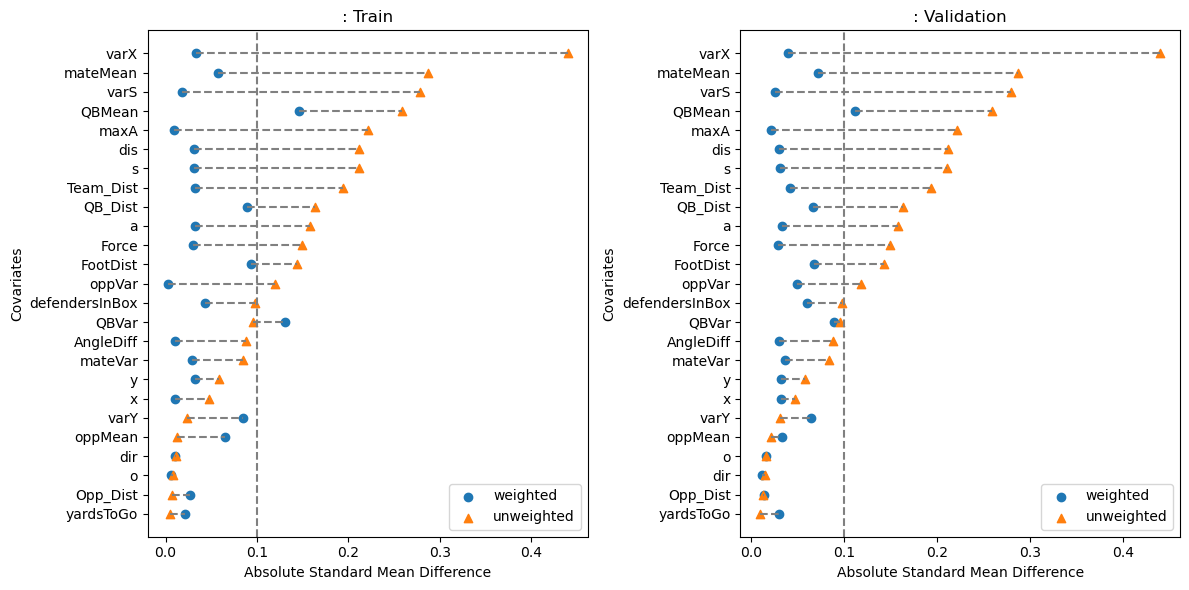

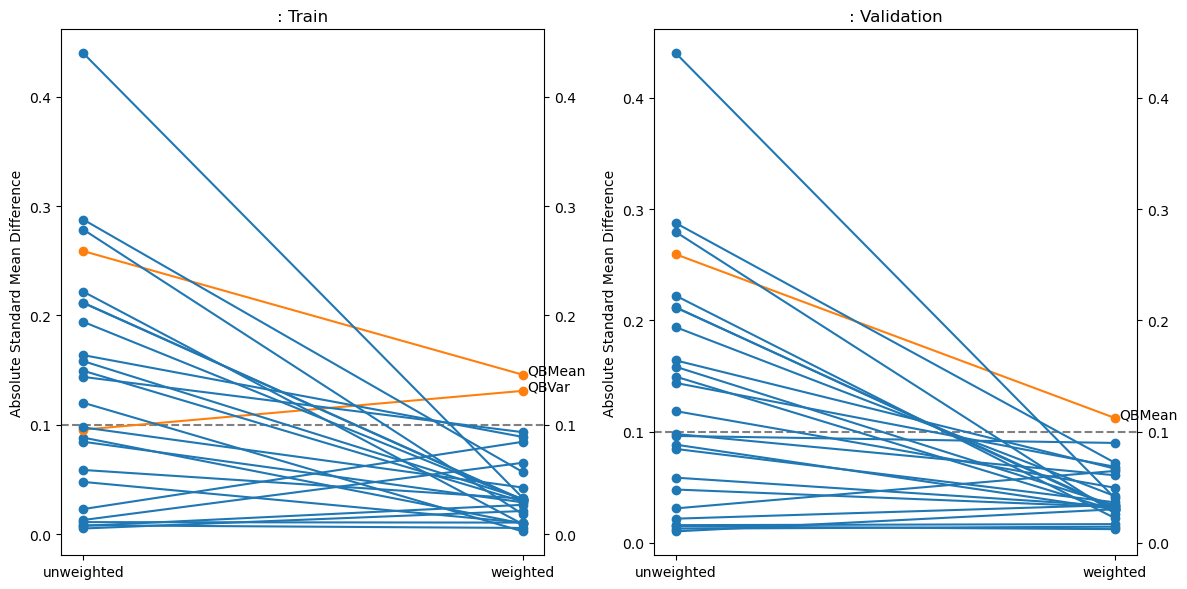

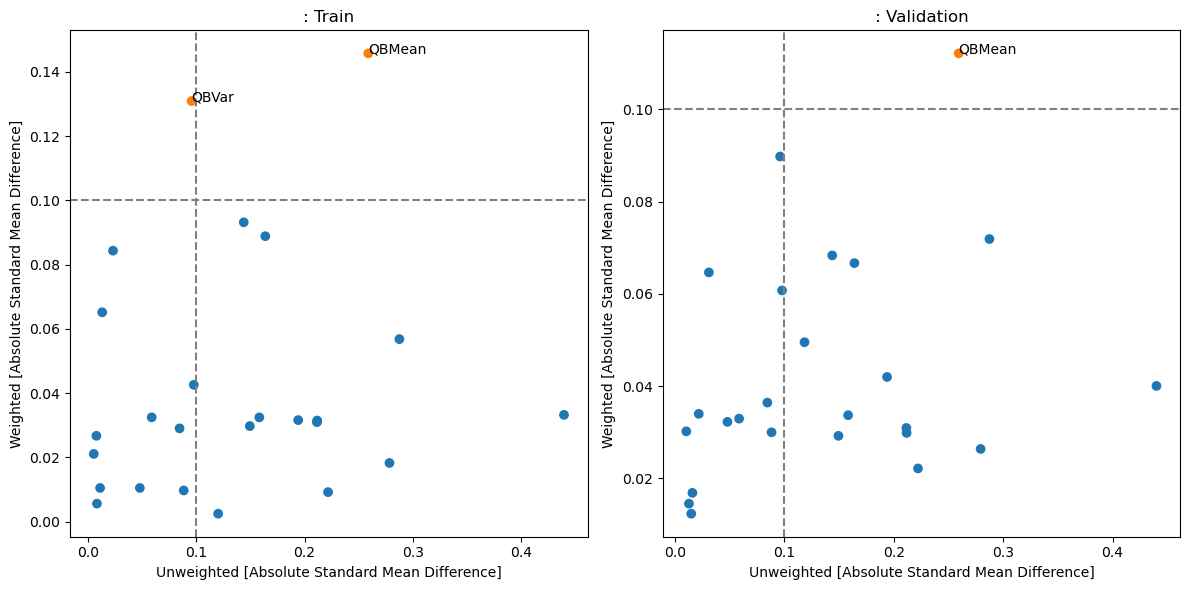

In [68]:

fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_covariate_balance(kind="love", phase="train", ax=a0, thresh=0.1)
results.plot_covariate_balance(kind="love", phase="valid", ax=a1, thresh=0.1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();


fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_covariate_balance(kind="slope", phase="train", ax=a0, thresh=0.1)
results.plot_covariate_balance(kind="slope", phase="valid", ax=a1, thresh=0.1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();


fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_covariate_balance(kind="scatter", phase="train", ax=a0, thresh=0.1)
results.plot_covariate_balance(kind="scatter", phase="valid", ax=a1, thresh=0.1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

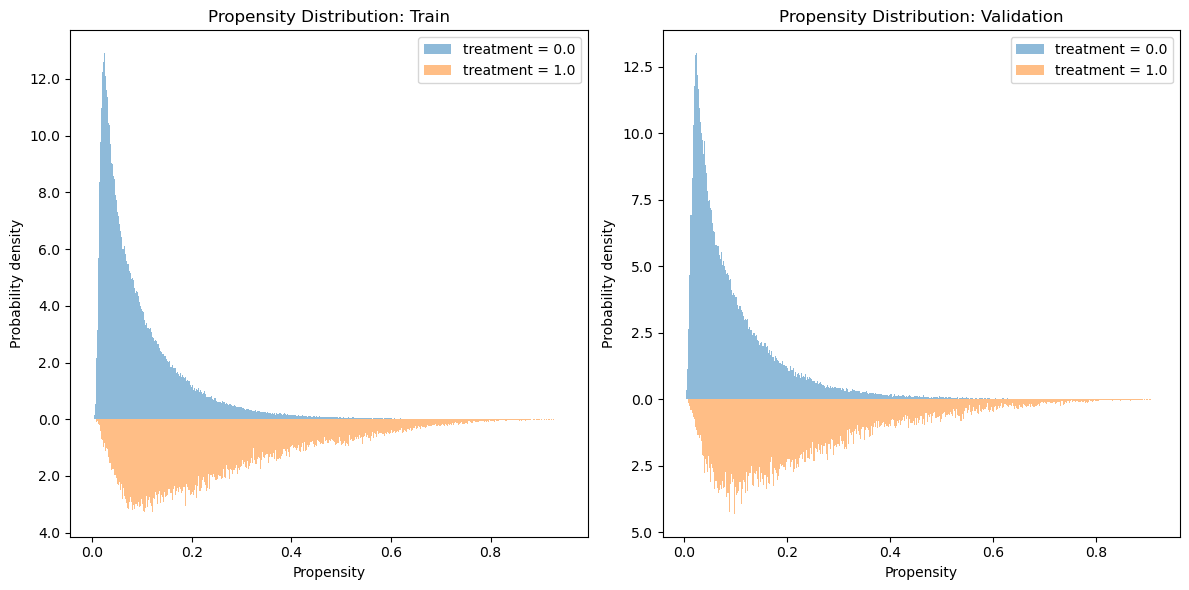

In [69]:
fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_weight_distribution(reflect=True, ax=a0)
results.plot_weight_distribution(reflect=True, phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

accuracy  precision    recall        f1   roc_auc  \
phase fold                                                        
train 0    0  0.891963   0.698609  0.108936  0.188482  0.821369   
      1    0  0.892623   0.701396  0.117830  0.201764  0.825077   
      2    0  0.891440   0.688450  0.104835  0.181962  0.823164   
      3    0  0.891743   0.683152  0.111943  0.192364  0.824883   
      4    0  0.891459   0.674751  0.111129  0.190829  0.826080   
valid 0    0  0.886732   0.559540  0.077527  0.136185  0.799722   
      1    0  0.885305   0.512231  0.086053  0.147351  0.786734   
      2    0  0.886389   0.547918  0.077494  0.135784  0.804362   
      3    0  0.888272   0.611073  0.082247  0.144981  0.794571   
      4    0  0.886431   0.543600  0.086605  0.149406  0.793017   

              avg_precision     hinge  matthews       0_1     brier  \
phase fold                                                            
train 0    0       0.425975  1.056450  0.247155  0.108037  0.083028   
      1    0       0.431726  1.055631  0.257943  0.107377  0.082581   
      2    0       0.423929  1.056695  0.239937  0.108560  0.083153   
      3    0       0.430358  1.055946  0.246763  0.108257  0.082652   
      4    0       0.428357  1.055700  0.243744  0.108541  0.082631   
valid 0    0       0.354639  1.062197  0.177264  0.113268  0.087285   
      1    0       0.339283  1.062485  0.174711  0.114695  0.088598   
      2    0       0.357109  1.059854  0.174440  0.113611  0.087020   
      3    0       0.354843  1.060162  0.194927  0.111728  0.087475   
      4    0       0.348792  1.060949  0.183486  0.113569  0.088056   

                               confusion_matrix  \
phase fold                                        
train 0    0  [[995967, 6130], [116225, 14209]]   
      1    0  [[995554, 6543], [115065, 15369]]   
      2    0  [[995910, 6188], [116759, 13674]]   
      3    0  [[995326, 6772], [115832, 14601]]   
      4    0  [[995111, 6987], [115939, 14495]]   
valid 0    0    [[248535, 1990], [30080, 2528]]   
      1    0    [[247853, 2672], [29802, 2806]]   
      2    0    [[248439, 2085], [30082, 2527]]   
      3    0    [[248817, 1707], [29927, 2682]]   
      4    0    [[248153, 2371], [29784, 2824]]   

                                                      roc_curve  \
phase fold                                                        
train 0    0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
      1    0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
      2    0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
      3    0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
      4    0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
valid 0    0  ([0.0, 0.0, 0.0, 0.0, 3.991617603033629e-06, 3...   
      1    0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
      2    0  ([0.0, 7.983267072216633e-06, 2.39498012166499...   
      3    0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
      4    0  ([0.0, 0.0, 3.991633536108317e-06, 3.991633536...   

                                                       pr_curve  
phase fold                                                       
train 0    0  ([0.11563215863717279, 0.11562745456125077, 0....  
      1    0  ([0.11554550012667714, 0.11554314962736446, 0....  
      2    0  ([0.11536852421374219, 0.11536774175287641, 0....  
      3    0  ([0.11539934971577713, 0.11539856707311678, 0....  
      4    0  ([0.11536440874347485, 0.11536049657666009, 0....  
valid 0    0  ([0.11570834457013895, 0.11568951690169833, 0....  
      1    0  ([0.11694622869213747, 0.11693672756486125, 0....  
      2    0  ([0.11747519651850624, 0.11741478511184848, 0....  
      3    0  ([0.11558187921128278, 0.1155693398316349, 0.1...  
      4    0  ([0.11590040697364445, 0.11588469467548163, 0....

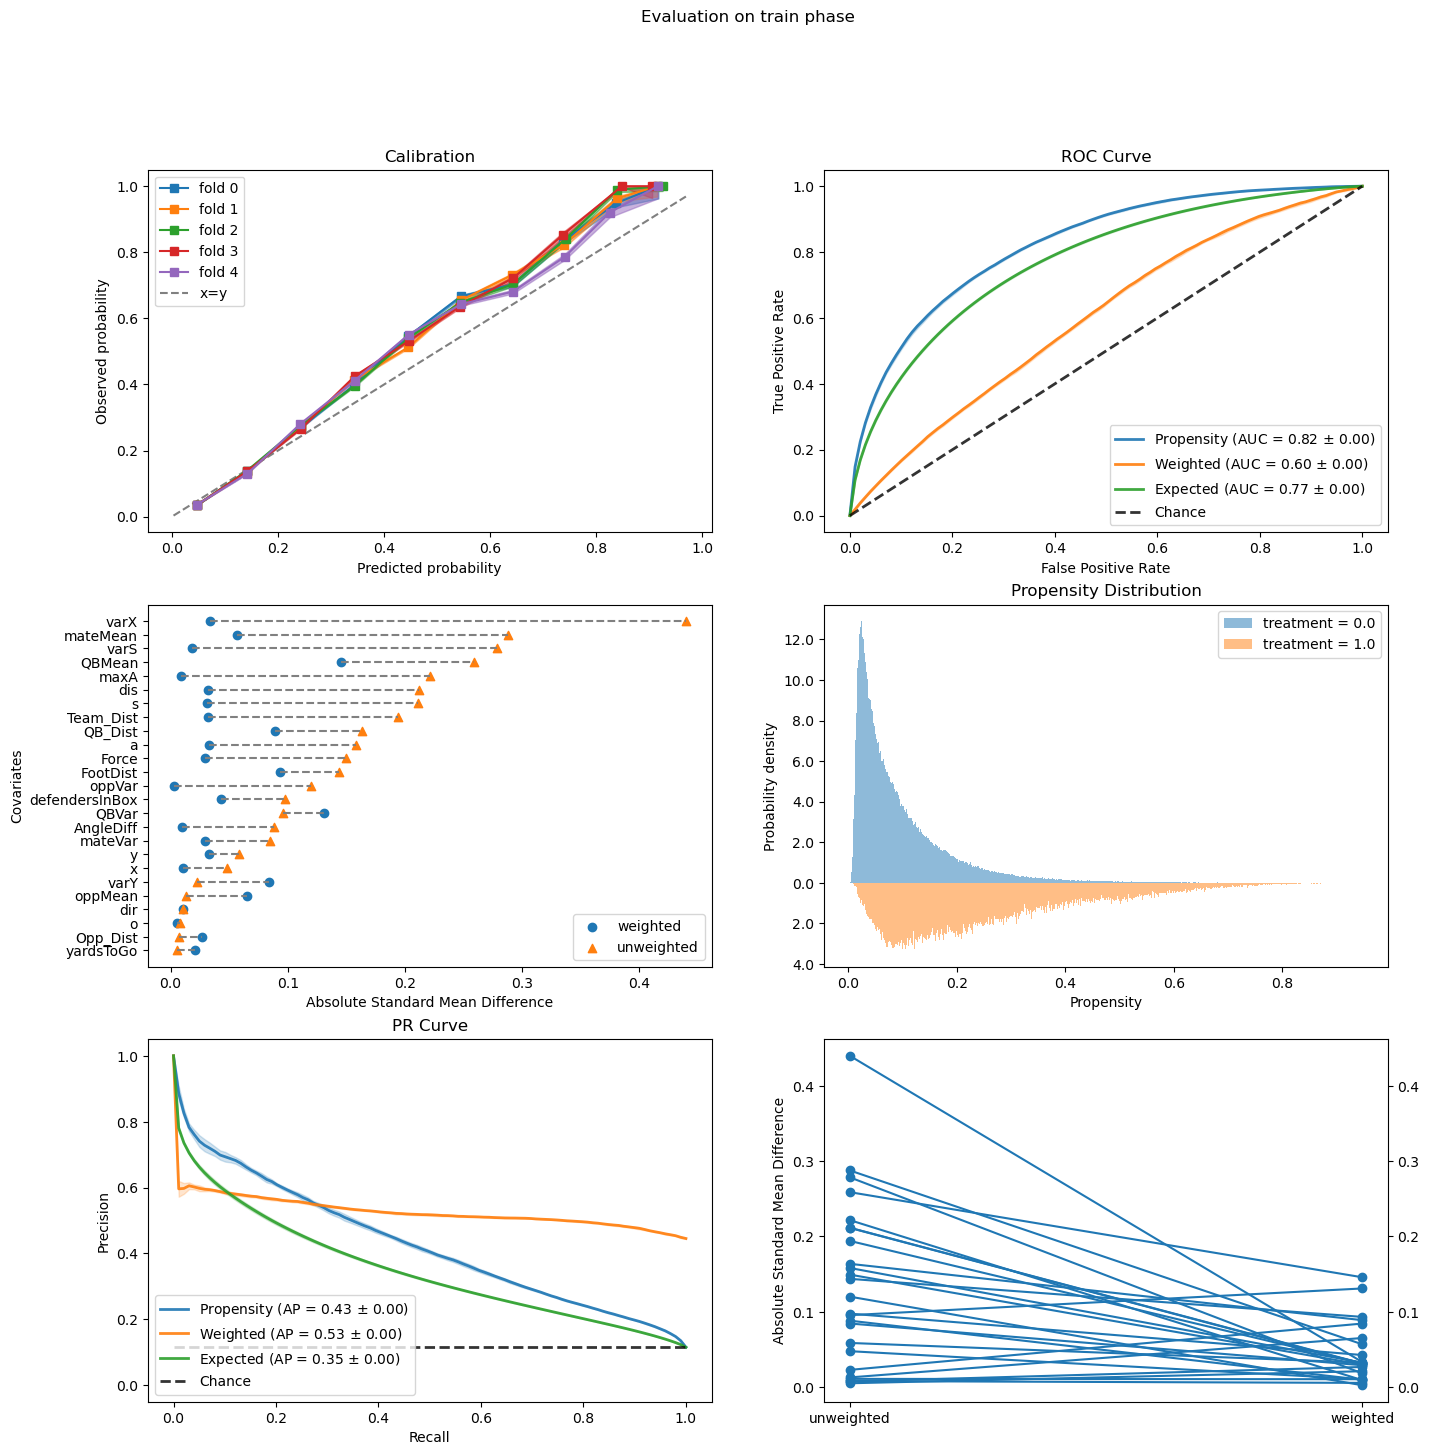

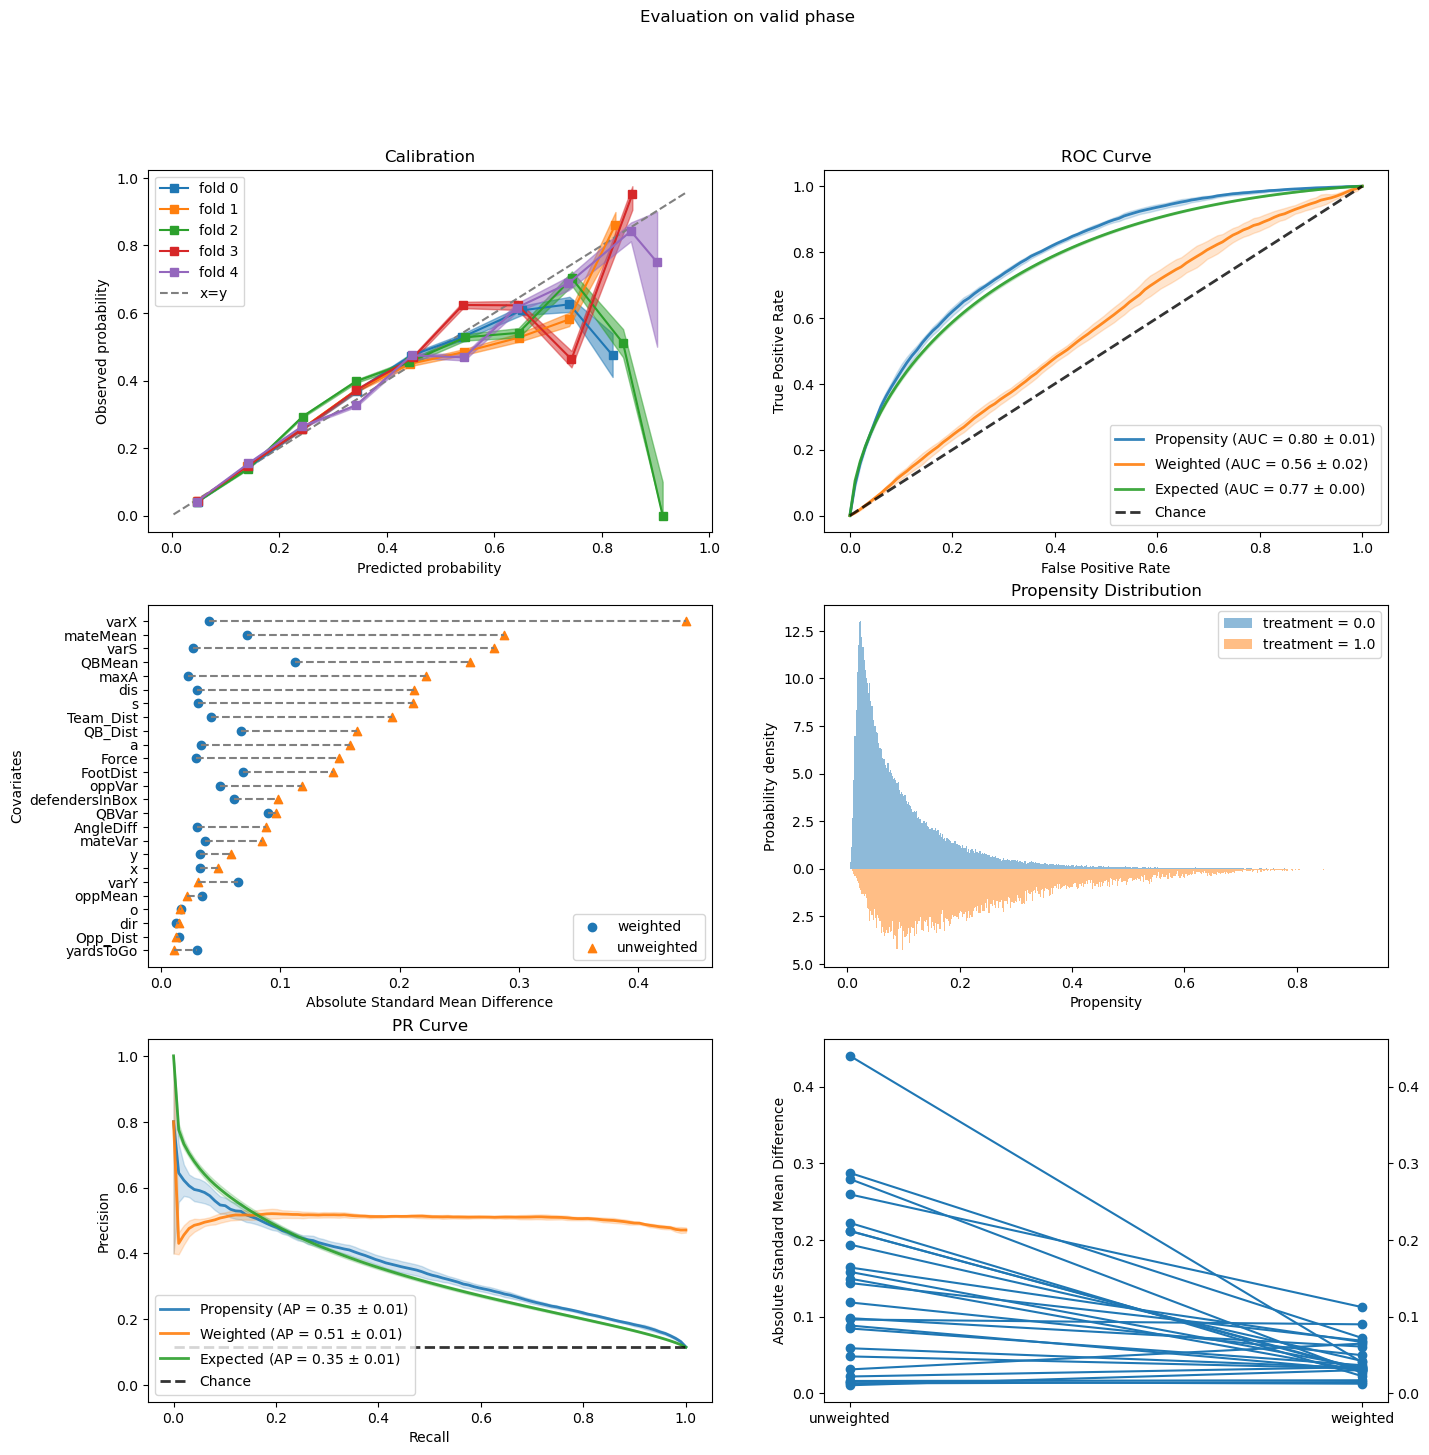

In [65]:
results = evaluate(dr.weight_model, X, a, y, cv='auto')
results.plot_all()
results.evaluated_metrics.prediction_scores

In [70]:
result = evaluate(dr, X, a, y, cv='auto')
result.plot_all()                                        
result.evaluated_metrics

KeyboardInterrupt: 

## PFF rank

In [6]:
pff = pd.read_csv('pffteamrank.csv')
pff

Team  Rank  PFFrank   CLIP  Stdev  PFF
0    TB     1        2 0.2210 0.0940    3
1    SF     2        3 0.2190 0.1060    7
2   DAL     3        1 0.2160 0.0990    1
3    LA     4        7 0.2080 0.0910    5
4    KC     5        5 0.2080 0.1040    2
5   MIN     6       23 0.2080 0.1080   24
6   SEA     7       26 0.2050 0.1050   23
7   PHI     8        4 0.2050 0.0940    8
8    NE     9        9 0.2020 0.0980   11
9   CLE    10        8 0.1960 0.1090    4
10  LAC    11       10 0.1940 0.1070    9
11  CIN    12       20 0.1930 0.1000   20
12  WAS    13        6 0.1910 0.0950    6
13  DET    14       13 0.1900 0.0910   25
14  DEN    15       19 0.1890 0.0980   19
15  ATL    16       27 0.1880 0.1100   30
16  IND    17       12 0.1840 0.0930   16
17  TEN    18       16 0.1830 0.1130   17
18   LV    19       28 0.1790 0.0910   26
19  BAL    20       21 0.1760 0.0970   13
20   GB    21       14 0.1730 0.1060   12
21  BUF    22       17 0.1690 0.0940   18
22  NYG    23       30 0.1660 0.1060   31
23   NO    24       18 0.1630 0.1050   14
24  ARI    25       15 0.1620 0.0990   10
25  CHI    26       22 0.1610 0.1110   22
26  PIT    27       26 0.1610 0.0930   28
27  HOU    28       29 0.1580 0.0960   27
28  JAX    29       24 0.1550 0.0980   21
29  NYJ    30       11 0.1460 0.1080   15
30  MIA    31       32 0.1430 0.0980   32
31  CAR    32       31 0.1330 0.1050   29

In [7]:
x = pff['Rank']
y = pff['PFFrank']

In [8]:
from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(x, y)
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.689


In [9]:
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.5f' % p)
else:
 print('Samples are correlated (reject H0) p=%.5f' % p)

Samples are correlated (reject H0) p=0.00001


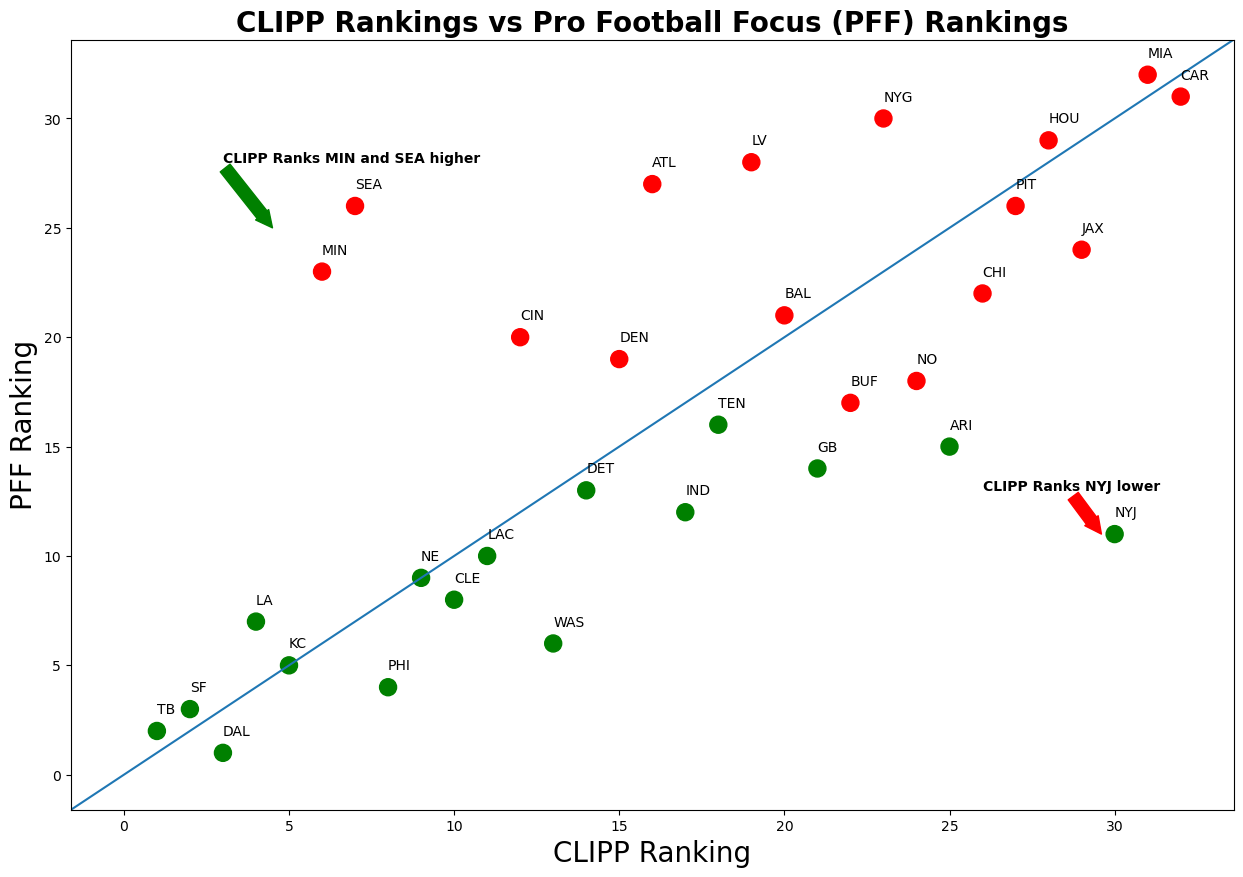

In [10]:
# Preparing dataset
x = pff['Rank']
y = pff['PFFrank']
text = pff['Team']
# Function to map the colors as a list from the input list of y variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l>16:
            cols.append('red')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(y)

plt.figure(figsize=(15,10))
plt.title("CLIPP Rankings vs Pro Football Focus (PFF) Rankings", fontsize=20, fontweight='bold')
plt.xlabel("CLIPP Ranking", fontsize=20)
plt.ylabel("PFF Ranking", fontsize=20)
plt.annotate("CLIPP Ranks MIN and SEA higher", xy=(4.5, 25), xytext=(3, 28), fontweight='bold',
            arrowprops=dict(width=9, color='green'))
plt.annotate("CLIPP Ranks NYJ lower", xy=(29.6, 11), xytext=(26, 13), fontweight='bold',
            arrowprops=dict(width=9, color='red'))
#plt.axhline(0, linestyle='--', color='black')

# plotting scatter plot
plt.scatter(x, y, s=150, c=cols)
plt.axline([0, 0], [1, 1])


# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] +0.8))

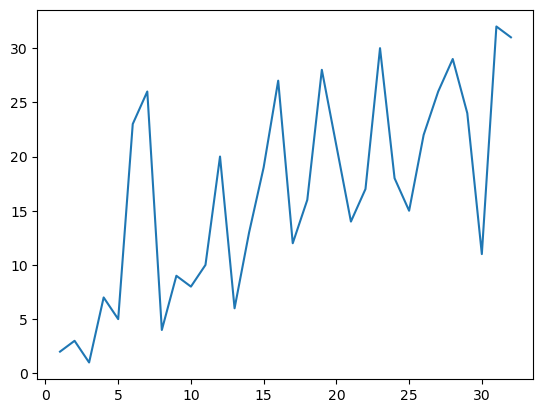

In [75]:
plt.plot(x, y)

In [353]:
ind_outcomes = dr.estimate_individual_outcome(X, a)
ind_outcomes

Negative  0.0000  1.0000
178       0.5235  0.5015
179       0.5197  0.5011
180       0.5009  0.4841
181       0.4977  0.4809
182       0.5015  0.4847
...          ...     ...
8314642   0.2751  0.2583
8314643   0.2860  0.2692
8314644   0.2974  0.2806
8314645   0.3000  0.2832
8314646   0.3164  0.2996

[1301900 rows x 2 columns]

In [339]:
ind_outcomes.to_csv('ind_outcomes.csv', index=0)

In [340]:
est = pd.read_csv('ind_outcomes.csv')
est

0.0    1.0
0       0.5476 0.4467
1       0.5515 0.4506
2       0.5468 0.4459
3       0.5502 0.4493
4       0.5669 0.4660
...        ...    ...
1301895 0.4614 0.3605
1301896 0.4757 0.3748
1301897 0.4719 0.3710
1301898 0.4838 0.3829
1301899 0.4805 0.3796

[1301900 rows x 2 columns]

In [341]:
est.columns

Index(['0.0', '1.0'], dtype='object')

In [344]:
est['Diff+'] = est['1.0'] - est['0.0']
est

0.0    1.0   Diff+
0       0.5476 0.4467 -0.1009
1       0.5515 0.4506 -0.1009
2       0.5468 0.4459 -0.1009
3       0.5502 0.4493 -0.1009
4       0.5669 0.4660 -0.1009
...        ...    ...     ...
1301895 0.4614 0.3605 -0.1009
1301896 0.4757 0.3748 -0.1009
1301897 0.4719 0.3710 -0.1009
1301898 0.4838 0.3829 -0.1009
1301899 0.4805 0.3796 -0.1009

[1301900 rows x 3 columns]

In [368]:
from causallib.estimation import StratifiedStandardization
std = StratifiedStandardization(gb, predict_proba=True)
std.fit(X, a, y)

outcomes = std.estimate_population_outcome(X, a)
print(outcomes)
std.estimate_effect(outcomes[0], outcomes[1], effect_types=['diff','ratio'])

Negative  y
0.0000    0   0.4841
          1   0.5159
1.0000    0   0.5311
          1   0.4689
dtype: float64


diff    -0.0000
ratio    1.0000
dtype: float64

In [373]:
#estimate_effect = pd.DataFrame(std.estimate_effect(ind_outcomes[1], ind_outcomes[0], agg="diff"))
#estimate_effect

In [ ]:
estimate_effect['diff'].describe()

In [370]:
ind_outcomes = std.estimate_individual_outcome(X, a)
ind_outcomes

Negative 0.0000        1.0000       
y             0      1      0      1
178      0.4602 0.5398 0.5094 0.4906
179      0.4613 0.5387 0.4949 0.5051
180      0.4830 0.5170 0.4949 0.5051
181      0.4857 0.5143 0.4949 0.5051
182      0.4803 0.5197 0.4915 0.5085
...         ...    ...    ...    ...
8314642  0.7387 0.2613 0.7684 0.2316
8314643  0.7137 0.2863 0.7684 0.2316
8314644  0.7137 0.2863 0.7441 0.2559
8314645  0.7115 0.2885 0.7441 0.2559
8314646  0.7077 0.2923 0.7441 0.2559

[1301900 rows x 4 columns]

In [371]:
ind_outcomes.to_csv('ind_outcomes.csv', index=0)

In [372]:
effect = pd.read_csv('ind_outcomes.csv')
effect

0.0  0.0.1    1.0  1.0.1
0       0.0000 1.0000 0.0000 1.0000
1       0.4602 0.5398 0.5094 0.4906
2       0.4613 0.5387 0.4949 0.5051
3       0.4830 0.5170 0.4949 0.5051
4       0.4857 0.5143 0.4949 0.5051
...        ...    ...    ...    ...
1301896 0.7387 0.2613 0.7684 0.2316
1301897 0.7137 0.2863 0.7684 0.2316
1301898 0.7137 0.2863 0.7441 0.2559
1301899 0.7115 0.2885 0.7441 0.2559
1301900 0.7077 0.2923 0.7441 0.2559

[1301901 rows x 4 columns]

In [374]:
# drop first row
effect = effect.iloc[1:, :].reset_index()
effect

index    0.0  0.0.1    1.0  1.0.1
0              1 0.4602 0.5398 0.5094 0.4906
1              2 0.4613 0.5387 0.4949 0.5051
2              3 0.4830 0.5170 0.4949 0.5051
3              4 0.4857 0.5143 0.4949 0.5051
4              5 0.4803 0.5197 0.4915 0.5085
...          ...    ...    ...    ...    ...
1301895  1301896 0.7387 0.2613 0.7684 0.2316
1301896  1301897 0.7137 0.2863 0.7684 0.2316
1301897  1301898 0.7137 0.2863 0.7441 0.2559
1301898  1301899 0.7115 0.2885 0.7441 0.2559
1301899  1301900 0.7077 0.2923 0.7441 0.2559

[1301900 rows x 5 columns]

In [375]:
effect['Diff+'] = effect['1.0'] - effect['0.0']
effect

index    0.0  0.0.1    1.0  1.0.1  Diff+
0              1 0.4602 0.5398 0.5094 0.4906 0.0492
1              2 0.4613 0.5387 0.4949 0.5051 0.0337
2              3 0.4830 0.5170 0.4949 0.5051 0.0119
3              4 0.4857 0.5143 0.4949 0.5051 0.0092
4              5 0.4803 0.5197 0.4915 0.5085 0.0113
...          ...    ...    ...    ...    ...    ...
1301895  1301896 0.7387 0.2613 0.7684 0.2316 0.0297
1301896  1301897 0.7137 0.2863 0.7684 0.2316 0.0547
1301897  1301898 0.7137 0.2863 0.7441 0.2559 0.0304
1301898  1301899 0.7115 0.2885 0.7441 0.2559 0.0327
1301899  1301900 0.7077 0.2923 0.7441 0.2559 0.0364

[1301900 rows x 6 columns]

In [377]:
effect['Diff-'] = effect['0.0'] - effect['1.0']
effect

index    0.0  0.0.1    1.0  1.0.1  Diff+   Diff-
0              1 0.4602 0.5398 0.5094 0.4906 0.0492 -0.0492
1              2 0.4613 0.5387 0.4949 0.5051 0.0337 -0.0337
2              3 0.4830 0.5170 0.4949 0.5051 0.0119 -0.0119
3              4 0.4857 0.5143 0.4949 0.5051 0.0092 -0.0092
4              5 0.4803 0.5197 0.4915 0.5085 0.0113 -0.0113
...          ...    ...    ...    ...    ...    ...     ...
1301895  1301896 0.7387 0.2613 0.7684 0.2316 0.0297 -0.0297
1301896  1301897 0.7137 0.2863 0.7684 0.2316 0.0547 -0.0547
1301897  1301898 0.7137 0.2863 0.7441 0.2559 0.0304 -0.0304
1301898  1301899 0.7115 0.2885 0.7441 0.2559 0.0327 -0.0327
1301899  1301900 0.7077 0.2923 0.7441 0.2559 0.0364 -0.0364

[1301900 rows x 7 columns]

In [121]:
test = offensive_line.copy()
test

gameId  playId    nflId  frameId  displayName officialPosition  \
178      2021090900      97  40151.0        7  Ryan Jensen                C   
179      2021090900      97  40151.0        8  Ryan Jensen                C   
180      2021090900      97  40151.0        9  Ryan Jensen                C   
181      2021090900      97  40151.0       10  Ryan Jensen                C   
182      2021090900      97  40151.0       11  Ryan Jensen                C   
...             ...     ...      ...      ...          ...              ...   
8314642  2021110100    4433  52507.0       54   Matt Peart                T   
8314643  2021110100    4433  52507.0       55   Matt Peart                T   
8314644  2021110100    4433  52507.0       56   Matt Peart                T   
8314645  2021110100    4433  52507.0       57   Matt Peart                T   
8314646  2021110100    4433  52507.0       58   Matt Peart                T   

        team      x      y     s     a   dis      o     dir  Opp_Dist  \
178       TB  42.03  24.06  0.79  2.13  0.07  53.21  305.04  1.691774   
179       TB  41.95  24.10  1.00  1.84  0.09  57.07  300.02  1.647695   
180       TB  41.86  24.16  1.17  1.35  0.11  59.92  301.28  1.569841   
181       TB  41.74  24.24  1.39  1.09  0.14  62.96  301.82  1.478276   
182       TB  41.58  24.31  1.62  0.98  0.18  71.03  297.56  1.436837   
...      ...    ...    ...   ...   ...   ...    ...     ...       ...   
8314642  NYG  21.51  26.75  2.05  0.37  0.22  55.95   32.20  1.793349   
8314643  NYG  21.63  26.97  2.32  0.56  0.25  55.95   29.88  1.757555   
8314644  NYG  21.75  27.19  2.45  0.44  0.25  55.95   28.44  1.681577   
8314645  NYG  21.88  27.45  2.64  0.59  0.28  55.16   27.04  1.571782   
8314646  NYG  22.01  27.70  2.77  0.35  0.29  55.16   26.73  1.439618   

         Team_Dist   QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
178       1.553480  4.474472  0.967471          2             6.0     108.17   
179       1.551161  4.482510  1.249040          2             6.0     117.05   
180       1.490134  4.480714  1.601312          2             6.0     118.64   
181       1.420035  4.470011  1.967257          2             6.0     121.14   
182       1.360037  4.440912  2.320797          2             6.0     133.47   
...            ...       ...       ...        ...             ...        ...   
8314642   1.619877  2.446753  2.893994         15             6.0      23.75   
8314643   1.687602  2.456379  2.928566         15             6.0      26.07   
8314644   1.716770  2.453080  2.966547         15             6.0      27.51   
8314645   1.768191  2.408527  2.976928         15             6.0      28.12   
8314646   1.797776  2.347850  2.995413         15             6.0      28.43   

          Force      varX      varY      varS  maxA  mateMean   oppMean  \
178      679.47  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
179      586.96  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
180      430.65  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
181      347.71  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
182      312.62  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
...         ...       ...       ...       ...   ...       ...       ...   
8314642  112.11  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314643  169.68  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314644  133.32  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314645  178.77  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
8314646  106.05  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   

           QBMean   mateVar    oppVar     QBVar  Success  Negative  
178      4.620958  0.212786  0.146570  0.073307        0       0.0  
179      4.620958  0.212786  0.146570  0.073307        0       0.0  
180      4.620958  0.212786  0.146570  0.073307        0       0.0  
181      4.620958  0.212786  0.146570  0.073307  

In [122]:
test.reset_index(drop=True, inplace=True)
test

gameId  playId    nflId  frameId  displayName officialPosition  \
0        2021090900      97  40151.0        7  Ryan Jensen                C   
1        2021090900      97  40151.0        8  Ryan Jensen                C   
2        2021090900      97  40151.0        9  Ryan Jensen                C   
3        2021090900      97  40151.0       10  Ryan Jensen                C   
4        2021090900      97  40151.0       11  Ryan Jensen                C   
...             ...     ...      ...      ...          ...              ...   
1415659  2021110100    4433  52507.0       54   Matt Peart                T   
1415660  2021110100    4433  52507.0       55   Matt Peart                T   
1415661  2021110100    4433  52507.0       56   Matt Peart                T   
1415662  2021110100    4433  52507.0       57   Matt Peart                T   
1415663  2021110100    4433  52507.0       58   Matt Peart                T   

        team      x      y     s     a   dis      o     dir  Opp_Dist  \
0         TB  42.03  24.06  0.79  2.13  0.07  53.21  305.04  1.691774   
1         TB  41.95  24.10  1.00  1.84  0.09  57.07  300.02  1.647695   
2         TB  41.86  24.16  1.17  1.35  0.11  59.92  301.28  1.569841   
3         TB  41.74  24.24  1.39  1.09  0.14  62.96  301.82  1.478276   
4         TB  41.58  24.31  1.62  0.98  0.18  71.03  297.56  1.436837   
...      ...    ...    ...   ...   ...   ...    ...     ...       ...   
1415659  NYG  21.51  26.75  2.05  0.37  0.22  55.95   32.20  1.793349   
1415660  NYG  21.63  26.97  2.32  0.56  0.25  55.95   29.88  1.757555   
1415661  NYG  21.75  27.19  2.45  0.44  0.25  55.95   28.44  1.681577   
1415662  NYG  21.88  27.45  2.64  0.59  0.28  55.16   27.04  1.571782   
1415663  NYG  22.01  27.70  2.77  0.35  0.29  55.16   26.73  1.439618   

         Team_Dist   QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0         1.553480  4.474472  0.967471          2             6.0     108.17   
1         1.551161  4.482510  1.249040          2             6.0     117.05   
2         1.490134  4.480714  1.601312          2             6.0     118.64   
3         1.420035  4.470011  1.967257          2             6.0     121.14   
4         1.360037  4.440912  2.320797          2             6.0     133.47   
...            ...       ...       ...        ...             ...        ...   
1415659   1.619877  2.446753  2.893994         15             6.0      23.75   
1415660   1.687602  2.456379  2.928566         15             6.0      26.07   
1415661   1.716770  2.453080  2.966547         15             6.0      27.51   
1415662   1.768191  2.408527  2.976928         15             6.0      28.12   
1415663   1.797776  2.347850  2.995413         15             6.0      28.43   

          Force      varX      varY      varS  maxA  mateMean   oppMean  \
0        679.47  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
1        586.96  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
2        430.65  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
3        347.71  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
4        312.62  2.319950  0.760771  0.577290  2.13  1.517969  1.465512   
...         ...       ...       ...       ...   ...       ...       ...   
1415659  112.11  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
1415660  169.68  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
1415661  133.32  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
1415662  178.77  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   
1415663  106.05  6.214783  0.239997  0.472352  2.56  1.477745  1.049407   

           QBMean   mateVar    oppVar     QBVar  Success  Negative  
0        4.620958  0.212786  0.146570  0.073307        0       0.0  
1        4.620958  0.212786  0.146570  0.073307        0       0.0  
2        4.620958  0.212786  0.146570  0.073307        0       0.0  
3        4.620958  0.212786  0.146570  0.073307  

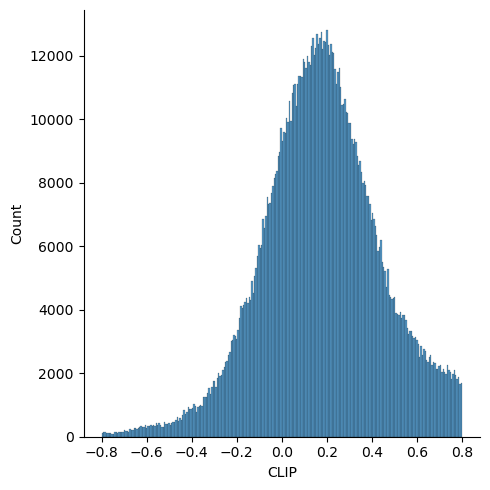

In [695]:
sns.displot(draft['CLIP']);

In [699]:
CLIPteam = draft.groupby(['team'])['CLIP'].mean().reset_index().rename(columns={"mean": "CLIP"})
CLIPteam.sort_values(by='CLIP', ascending=False)

team   CLIP
20  MIN 0.2188
27  SEA 0.2169
21   NE 0.2135
28   SF 0.2104
12  HOU 0.2103
0   ARI 0.2046
29   TB 0.2026
30  TEN 0.2010
16   LA 0.1955
22   NO 0.1954
18   LV 0.1866
15   KC 0.1848
2   BAL 0.1809
1   ATL 0.1780
7   CLE 0.1746
17  LAC 0.1737
8   DAL 0.1734
6   CIN 0.1720
9   DEN 0.1687
26  PIT 0.1644
5   CHI 0.1628
10  DET 0.1605
11   GB 0.1602
23  NYG 0.1602
13  IND 0.1584
24  NYJ 0.1574
4   CAR 0.1567
31  WAS 0.1547
14  JAX 0.1512
19  MIA 0.1461
3   BUF 0.1437
25  PHI 0.1329

In [689]:
successplay = draft[draft['gameId']==2021091204]
successplay = successplay[successplay['playId']==1443]
successplay.to_csv('CLIPsuccess.csv', index=False)

In [688]:
success = oline[oline['gameId']==2021091204]
success = success[success['playId']==1443]
success

gameId  playId      nflId  frameId                 time  \
397837  2021091204    1443 34472.0000        7  2021-09-12 18:05:47   
397838  2021091204    1443 34472.0000        8  2021-09-12 18:05:47   
397839  2021091204    1443 34472.0000        9  2021-09-12 18:05:47   
397840  2021091204    1443 34472.0000       10  2021-09-12 18:05:47   
397841  2021091204    1443 34472.0000       11  2021-09-12 18:05:47   
...            ...     ...        ...      ...                  ...   
398436  2021091204    1443 46078.0000       34  2021-09-12 18:05:50   
398437  2021091204    1443 46078.0000       35  2021-09-12 18:05:50   
398438  2021091204    1443 46078.0000       36  2021-09-12 18:05:50   
398439  2021091204    1443 46078.0000       37  2021-09-12 18:05:50   
398440  2021091204    1443 46078.0000       38  2021-09-12 18:05:50   

        jerseyNumber team playDirection       x       y      s      a    dis  \
397837       50.0000   SF          left 73.5600 23.4933 0.7100 1.7000 0.0700   
397838       50.0000   SF          left 73.5100 23.3833 1.0900 2.4100 0.1200   
397839       50.0000   SF          left 73.4600 23.2433 1.4500 2.2900 0.1500   
397840       50.0000   SF          left 73.3900 23.0733 1.8000 2.0400 0.1900   
397841       50.0000   SF          left 73.3000 22.8833 2.0400 1.5100 0.2000   
...              ...  ...           ...     ...     ...    ...    ...    ...   
398436       69.0000   SF          left 66.2700 21.1933 3.8200 1.7000 0.4000   
398437       69.0000   SF          left 66.0000 21.4633 3.7500 1.8500 0.3800   
398438       69.0000   SF          left 65.7400 21.7333 3.6300 1.9500 0.3700   
398439       69.0000   SF          left 65.5000 22.0433 3.6400 1.9000 0.3900   
398440       69.0000   SF          left 65.2800 22.3433 3.5900 1.9300 0.3700   

              o      dir event        events  Opp_Dist  closestOpp_Id  \
397837 271.8400  23.8700  None  between_snap    1.3500     53501.0000   
397838 274.7700  23.0800  None  between_snap    1.3413     53501.0000   
397839 278.1700  22.7100  None  between_snap    1.3155     53501.0000   
397840 283.8900  22.6900  None  between_snap    1.3025     53501.0000   
397841 288.1700  23.2700  None  between_snap    1.3061     53501.0000   
...         ...      ...   ...           ...       ...            ...   
398436  92.1500 132.0300  None  between_snap    0.6803     43775.0000   
398437  97.0300 135.0800  None  between_snap    0.6356     43775.0000   
398438 102.0500 137.4900  None  between_snap    0.6037     43775.0000   
398439 118.9000 140.9600  None  between_snap    0.5608     43775.0000   
398440 130.3300 144.5000  None  between_snap    0.5608     43775.0000   

        Team_Dist  closestTeam_Id  QB_Dist  closestQB_Id  FootDist height  \
397837     1.4262      42371.0000   4.6867    41291.0000    0.7606    6-4   
397838     1.3805      42371.0000   4.6432    41291.0000    1.2976    6-4   
397839     1.3244      42371.0000   4.6061    41291.0000    1.8331    6-4   
397840     1.0847      45069.0000   4.5665    41291.0000    2.3006    6-4   
397841     0.8616      45069.0000   4.5089    41291.0000    2.7216    6-4   
...           ...             ...      ...           ...       ...    ...   
398436     4.0419      34472.0000   5.7645    41291.0000    5.4134    6-8   
398437     4.2314      34472.0000   5.6412    41291.0000    5.2467    6-8   
398438     4.4223      34472.0000   5.5226    41291.0000    5.0799    6-8   
398439     4.5998      34472.0000   5.3759    41291.0000    4.8972    6-8   
398440     4.7377      34472.0000   5.2369    41291.0000    4.7544    6-8   

         weight officialPosition      displayName  \
397837 311.0000                C        Alex Mack   
397838 311.0000                C        Alex Mack   
397839 311.0000                C        Alex Mack   
397840 311.0000                C        Alex Mack   
397841 311.0000                C        Alex Mack   
...         ...              ...              ...   
398436 315.0000          

In [598]:
mask = test['officialPosition'].isin(['RB', 'TE', 'WR', 'FB', 'LB', 'QB'])
line_men = test[~mask]
line_men
#bad = line_men[line_men['Prob'] < -.4]  
bad = line_men[line_men['Negative'] ==1]  
bad = bad[bad['Success'] ==1]  
bad.sort_values(by='Prob', ascending=True)

gameId  playId      nflId  frameId     displayName  \
871178  2021101700    3352 52426.0000       39  Austin Jackson   
871155  2021101700    3352 52426.0000       16  Austin Jackson   
871177  2021101700    3352 52426.0000       38  Austin Jackson   
871159  2021101700    3352 52426.0000       20  Austin Jackson   
871158  2021101700    3352 52426.0000       19  Austin Jackson   
...            ...     ...        ...      ...             ...   
97893   2021091207    1747 52480.0000        9      Josh Jones   
97900   2021091207    1747 52480.0000       16      Josh Jones   
97898   2021091207    1747 52480.0000       14      Josh Jones   
97899   2021091207    1747 52480.0000       15      Josh Jones   
97901   2021091207    1747 52480.0000       17      Josh Jones   

       officialPosition team       x       y      s      a    dis        o  \
871178                T  MIA 18.5400 22.8900 0.6500 1.9400 0.0700 207.2800   
871155                T  MIA 18.5400 24.9200 0.2900 0.8800 0.0300  62.9300   
871177                T  MIA 18.6000 22.9000 0.6000 2.0800 0.0700 209.3100   
871159                T  MIA 18.5500 24.8400 0.2700 0.4000 0.0200  80.6700   
871158                T  MIA 18.5500 24.8600 0.2700 0.7800 0.0200  76.9000   
...                 ...  ...     ...     ...    ...    ...    ...      ...   
97893                 G  ARI 33.2600 28.2100 0.4200 0.5700 0.0500 107.0900   
97900                 G  ARI 32.6600 28.1000 1.2500 1.1400 0.1200  77.4100   
97898                 G  ARI 32.8900 28.0700 1.0300 0.9700 0.1000 107.9900   
97899                 G  ARI 32.7800 28.0800 1.1500 1.0300 0.1200  96.2500   
97901                 G  ARI 32.5000 28.1800 1.5700 1.7500 0.1800  53.0700   

            dir  Opp_Dist  Team_Dist  QB_Dist  FootDist  yardsToGo  \
871178 265.8200    0.8440     1.3865   7.2814    7.1366         10   
871155 123.5800    1.2060     0.9313   2.7171    2.6724         10   
871177 242.8900    0.8393     1.3892   7.5123    7.3791         10   
871159 195.4700    0.9571     0.7034   4.0957    4.2002         10   
871158 195.6100    0.9925     0.7531   3.6949    3.7871         10   
...         ...       ...        ...      ...       ...        ...   
97893  225.3400    2.4331     1.5474   4.0212    1.6763         10   
97900  279.5900    1.1236     1.9499   4.6242    4.3027         10   
97898  262.5900    1.5747     1.7271   4.4144    3.5835         10   
97899  270.9800    1.3341     1.8317   4.5125    3.9605         10   
97901  291.5500    0.9961     2.1145   4.7019    4.5594         10   

        defendersInBox  AngleDiff    Force    varX    varY   varS   maxA  \
871178          6.0000    58.5400 601.4000  0.0255  0.6611 0.2230 2.1100   
871155          6.0000    60.6500 272.8000  0.0255  0.6611 0.2230 2.1100   
871177          6.0000    33.5800 644.8000  0.0255  0.6611 0.2230 2.1100   
871159          6.0000   114.8000 124.0000  0.0255  0.6611 0.2230 2.1100   
871158          6.0000   118.7100 241.8000  0.0255  0.6611 0.2230 2.1100   
...                ...        ...      ...     ...     ...    ...    ...   
97893           6.0000   118.2500 176.7000 32.2538 21.3720 2.6730 3.5700   
97900           6.0000   157.8200 353.4000 32.2538 21.3720 2.6730 3.5700   
97898           6.0000   154.6000 300.7000 32.2538 21.3720 2.6730 3.5700   
97899           6.0000   174.7300 319.3000 32.2538 21.3720 2.6730 3.5700   
97901           6.0000   121.5200 542.5000 32.2538 21.3720 2.6730 3.5700   

        mateMean  oppMean  QBMean  mateVar  oppVar   QBVar  Success  Negative  \
871178    1.1925   1.1673  5.3106   0.0823  0.1341  6.0888        1    1.0000   
871155    1.1925   1.1673  5.3106   0.0823  0.1341  6.0888        1    1.0000   
871177    1.1925   1.1673  5.3106   0.0823  0.1341  6.0888        1    1.0000   
871159    1.1925   1.1673  5.3106   0.0823  0.1341  6.0888        1    1.0000   
871158    1.1925   1.1673  5.3106   0.0823  0.1341  6.0888        1    1.0000   
...          ...      ...     ...      ...

In [595]:
bad.officialPosition.describe()

count     133871
unique         3
top            T
freq       68467
Name: officialPosition, dtype: object

In [444]:
df3 = test[test['Prob'] > -.4]  
df3

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  propensity_score  \
0         0.2128  0.1466 0.0733        0    0.0000            0.1238   
1         0.2128  0.1466 0.0733        0    0.0000            0.1172   
2         0.2

In [445]:
df3 = df3[df3['Prob'] <= .4]  
df3

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  propensity_score  \
0         0.2128  0.1466 0.0733        0    0.0000            0.1238   
1         0.2128  0.1466 0.0733        0    0.0000            0.1172   
2         0.2

In [446]:
snaps = test.groupby(['displayName', 'gameId', 'officialPosition', 'team'])['playId'].nunique().rename('Snaps').reset_index()
snaps = snaps.groupby(['displayName', 'officialPosition', 'team'])['Snaps'].sum().rename('Snaps').reset_index()
snaps.sort_values(by='Snaps', ascending=False)
snaps

displayName officialPosition team  Snaps
0        A.J. Cann                G  JAX    104
1      A.J. Dillon               RB   GB     16
2     Aaron Brewer                C  TEN     44
3      Aaron Jones               RB   GB     25
4    Aaron Stinnie                G   TB      3
..             ...              ...  ...    ...
529      Zach Ertz               TE  ARI      1
530      Zach Ertz               TE  PHI      5
531    Zach Gentry               TE  PIT     16
532    Zack Martin                G  DAL    202
533      Zack Moss               RB  BUF     16

[534 rows x 4 columns]

In [447]:
df3 = df3.merge(snaps, on =['displayName', 'officialPosition', 'team'])
df3

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1295654  2021103111    4107 37101.0000       42  Mark Ingram               RB   
1295655  2021103111    4107 37101.0000       43  Mark Ingram               RB   
1295656  2021103111    4107 37101.0000       44  Mark Ingram               RB   
1295657  2021103111    4107 37101.0000       45  Mark Ingram               RB   
1295658  2021103111    4107 37101.0000       46  Mark Ingram               RB   

        team       x       y      s      a    dis        o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700  53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900  57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100  59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400  62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800  71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...      ...      ...       ...   
1295654   NO 68.2100 24.2633 3.5100 1.5800 0.3400 338.2800  55.8200    1.6369   
1295655   NO 67.9200 24.0533 3.6700 1.6600 0.3600 343.5700  52.7000    1.8213   
1295656   NO 67.6300 23.8133 3.8200 1.8000 0.3800 352.8600  48.9800    2.0306   
1295657   NO 67.3500 23.5533 3.9100 1.8300 0.3900 356.1200  45.6000    2.2200   
1295658   NO 67.0800 23.2633 3.9600 1.8000 0.3900 358.9500  42.4500    2.4035   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1295654     0.8591   3.3652    3.6539          5          6.0000    77.5400   
1295655     0.8544   3.3956    3.7679          5          6.0000    69.1300   
1295656     0.8638   3.4708    3.8908          5          6.0000    56.1200   
1295657     0.8947   3.5918    4.0389          5          6.0000    49.4800   
1295658     0.9365   3.7344    4.1797          5          6.0000    43.5000   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1295654 339.7000 2.5774 1.5846 1.7432 2.7700    1.7455   2.5663  3.1112   
1295655 356.9000 2.5774 1.5846 1.7432 2.7700    1.7455   2.5663  3.1112   
1295656 387.0000 2.5774 1.5846 1.7432 2.7700    1.7455   2.5663  3.1112   
1295657 393.4500 2.5774 1.5846 1.7432 2.7700    1.7455   2.5663  3.1112   
1295658 387.0000 2.5774 1.5846 1.7432 2.7700    1.7455   2.5663  3.1112   

         mateVar  oppVar  QBVar  Success  Negative  propensity_score  \
0         0.2128  0.1466 0.0733        0    0.0000            0.1238   
1         0.2128  0.1466 0.0733        0    0.0000            0.1172   
2

In [448]:
df3 = df3[df3['Snaps'] >= 80]  
df3

gameId  playId      nflId  frameId    displayName  \
0        2021090900      97 40151.0000        7    Ryan Jensen   
1        2021090900      97 40151.0000        8    Ryan Jensen   
2        2021090900      97 40151.0000        9    Ryan Jensen   
3        2021090900      97 40151.0000       10    Ryan Jensen   
4        2021090900      97 40151.0000       11    Ryan Jensen   
...             ...     ...        ...      ...            ...   
1284455  2021103105    4114 41630.0000       34  Justin McCray   
1284456  2021103105    4114 41630.0000       35  Justin McCray   
1284457  2021103105    4114 41630.0000       36  Justin McCray   
1284458  2021103105    4114 41630.0000       37  Justin McCray   
1284459  2021103105    4114 41630.0000       38  Justin McCray   

        officialPosition team       x       y      s      a    dis        o  \
0                      C   TB 42.0300 24.0600 0.7900 2.1300 0.0700  53.2100   
1                      C   TB 41.9500 24.1000 1.0000 1.8400 0.0900  57.0700   
2                      C   TB 41.8600 24.1600 1.1700 1.3500 0.1100  59.9200   
3                      C   TB 41.7400 24.2400 1.3900 1.0900 0.1400  62.9600   
4                      C   TB 41.5800 24.3100 1.6200 0.9800 0.1800  71.0300   
...                  ...  ...     ...     ...    ...    ...    ...      ...   
1284455                C  HOU 81.9300 27.8433 0.4400 1.1100 0.0500 237.3200   
1284456                C  HOU 81.9000 27.8833 0.4100 0.7600 0.0500 243.7300   
1284457                C  HOU 81.8700 27.9233 0.4200 0.4700 0.0500 251.3200   
1284458                C  HOU 81.8300 27.9433 0.4300 0.3100 0.0500 259.9400   
1284459                C  HOU 81.7900 27.9633 0.4100 0.2800 0.0400 266.5000   

             dir  Opp_Dist  Team_Dist  QB_Dist  FootDist  yardsToGo  \
0       305.0400    1.6918     1.5535   4.4745    0.9675          2   
1       300.0200    1.6477     1.5512   4.4825    1.2490          2   
2       301.2800    1.5698     1.4901   4.4807    1.6013          2   
3       301.8200    1.4783     1.4200   4.4700    1.9673          2   
4       297.5600    1.4368     1.3600   4.4409    2.3208          2   
...          ...       ...        ...      ...       ...        ...   
1284455 141.8200    1.1985     1.8386   6.1917    6.2216         10   
1284456 137.5200    1.2479     1.9263   6.2023    6.3830         10   
1284457 132.1600    1.2940     2.0045   6.1929    6.5255         10   
1284458 126.2200    1.3396     2.0730   6.1418    6.6553         10   
1284459 118.3100    1.3706     2.1261   6.0707    6.7670         10   

         defendersInBox  AngleDiff    Force   varX   varY   varS   maxA  \
0                6.0000   108.1700 679.4700 2.3200 0.7608 0.5773 2.1300   
1                6.0000   117.0500 586.9600 2.3200 0.7608 0.5773 2.1300   
2                6.0000   118.6400 430.6500 2.3200 0.7608 0.5773 2.1300   
3                6.0000   121.1400 347.7100 2.3200 0.7608 0.5773 2.1300   
4                6.0000   133.4700 312.6200 2.3200 0.7608 0.5773 2.1300   
...                 ...        ...      ...    ...    ...    ...    ...   
1284455          5.0000    95.5000 351.8700 1.0313 0.3314 0.2516 2.0400   
1284456          5.0000   106.2100 240.9200 1.0313 0.3314 0.2516 2.0400   
1284457          5.0000   119.1600 148.9900 1.0313 0.3314 0.2516 2.0400   
1284458          5.0000   133.7200  98.2700 1.0313 0.3314 0.2516 2.0400   
1284459          5.0000   148.1900  88.7600 1.0313 0.3314 0.2516 2.0400   

         mateMean  oppMean  QBMean  mateVar  oppVar  QBVar  Success  Negative  \
0          1.5180   1.4655  4.6210   0.2128  0.1466 0.0733        0    0.0000   
1          1.5180   1.4655  4.6210   0.2128  0.1466 0.0733        0    0.0000   
2          1.5180   1.4655  4.6210   0.2128  0.1466 0.0733        0    0.0000   
3          1.5180   1.4655  4.6210   0.2128  0.1466 0.0733        0    0.0000   
4          1.5180   1.4655  4.6210   0.2128  0.1466 0.0733        0    0.0000   
...           ...      ...     

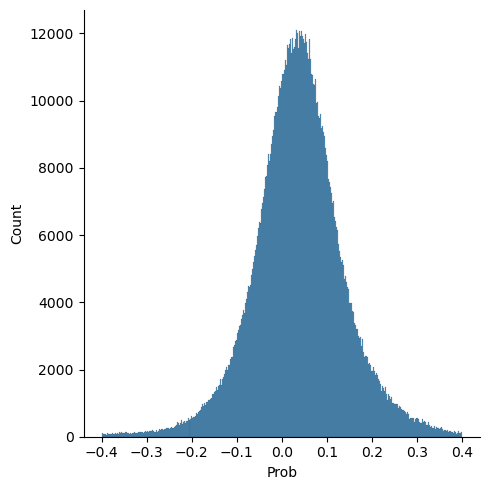

In [562]:
sns.displot(df3['Prob']);

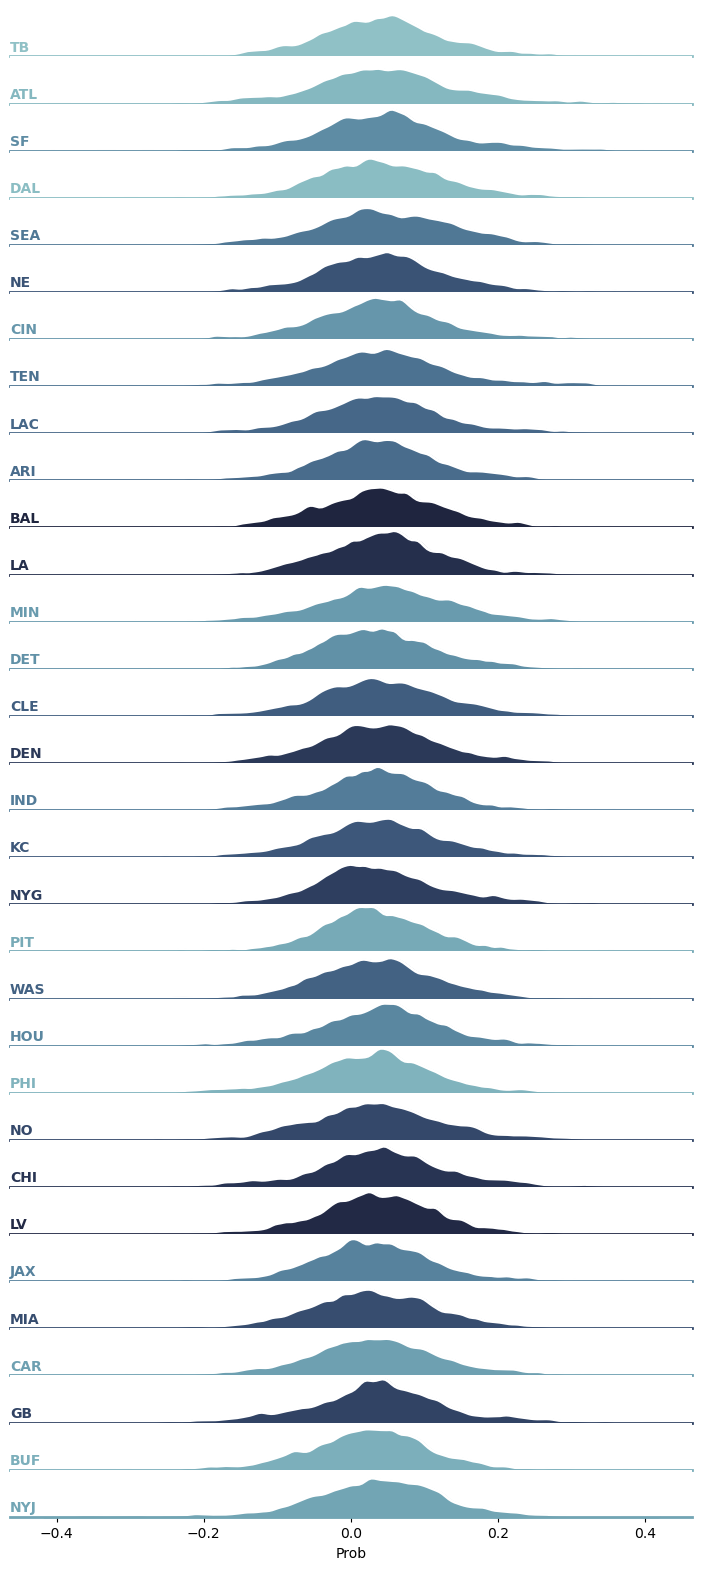

In [513]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
g = sns.FacetGrid(df3, row="team", 
                  hue="team", 
                  aspect=15, height=.5, 
                  palette=pal, row_order=ranking
                 );

# Draw the densities in a few steps
g.map(sns.kdeplot, "Prob",
      bw_adjust=.5, clip_on=(None),
      fill=True, alpha=1, linewidth=1.5);
g.map(sns.kdeplot, "Prob", clip_on=(None), color="w", lw=2, bw_adjust=.5);

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Prob");

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0);

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="");
g.despine(bottom=True, left=True);

In [573]:
line = pd.read_csv('line.csv')
line

displayName officialPosition team  Snaps   CLIP  Stdev
0        Ryan Jensen                C   TB    303 0.0740 0.1120
1          Alex Mack                C   SF    200 0.0682 0.1300
2         Ted Karras                C   NE    139 0.0674 0.1130
3       Trey Hopkins                C  CIN    246 0.0674 0.1070
4        Jason Kelce                C  PHI    221 0.0666 0.1110
..               ...              ...  ...    ...    ...    ...
181    Andre Dillard                T  PHI    143 0.0109 0.0920
182  Terron Armstead                T   NO    112 0.0100 0.1040
183      Matt Nelson                T  DET    317 0.0086 0.0940
184    Andrew Thomas                T  NYG    151 0.0081 0.0710
185     Cam Robinson                T  JAX    250 0.0075 0.1000

[186 rows x 6 columns]

In [653]:
team_prob = line.groupby(['team'])['CLIP'].mean().reset_index()
team_prob.sort_values(by='CLIP', ascending=False).reset_index()
#team_prob.to_csv('team_prob.csv', index=0)

index team   CLIP
0      29   TB 0.0491
1       1  ATL 0.0488
2      28   SF 0.0484
3      27  SEA 0.0480
4       8  DAL 0.0476
5      21   NE 0.0454
6       6  CIN 0.0435
7      17  LAC 0.0433
8      30  TEN 0.0431
9       0  ARI 0.0421
10     10  DET 0.0419
11     16   LA 0.0418
12      2  BAL 0.0412
13     20  MIN 0.0410
14      7  CLE 0.0400
15      9  DEN 0.0396
16     13  IND 0.0393
17     15   KC 0.0387
18     23  NYG 0.0376
19     26  PIT 0.0365
20     31  WAS 0.0354
21     12  HOU 0.0349
22     25  PHI 0.0340
23     22   NO 0.0335
24      5  CHI 0.0329
25     18   LV 0.0326
26     14  JAX 0.0325
27     19  MIA 0.0316
28      4  CAR 0.0294
29      3  BUF 0.0293
30     11   GB 0.0286
31     24  NYJ 0.0273

In [501]:
ranking = ["TB", "ATL",
"SF",
"DAL",
"SEA",
"NE",
"CIN",
"TEN",
"LAC",
"ARI",
"BAL",
"LA",
"MIN",
"DET",
"CLE",
"DEN",
"IND",
"KC",
"NYG",
"PIT",
"WAS",
"HOU",
"PHI",
"NO",
"CHI",
"LV",
"JAX",
"MIA",
"CAR",
"GB",
"BUF",
"NYJ"]

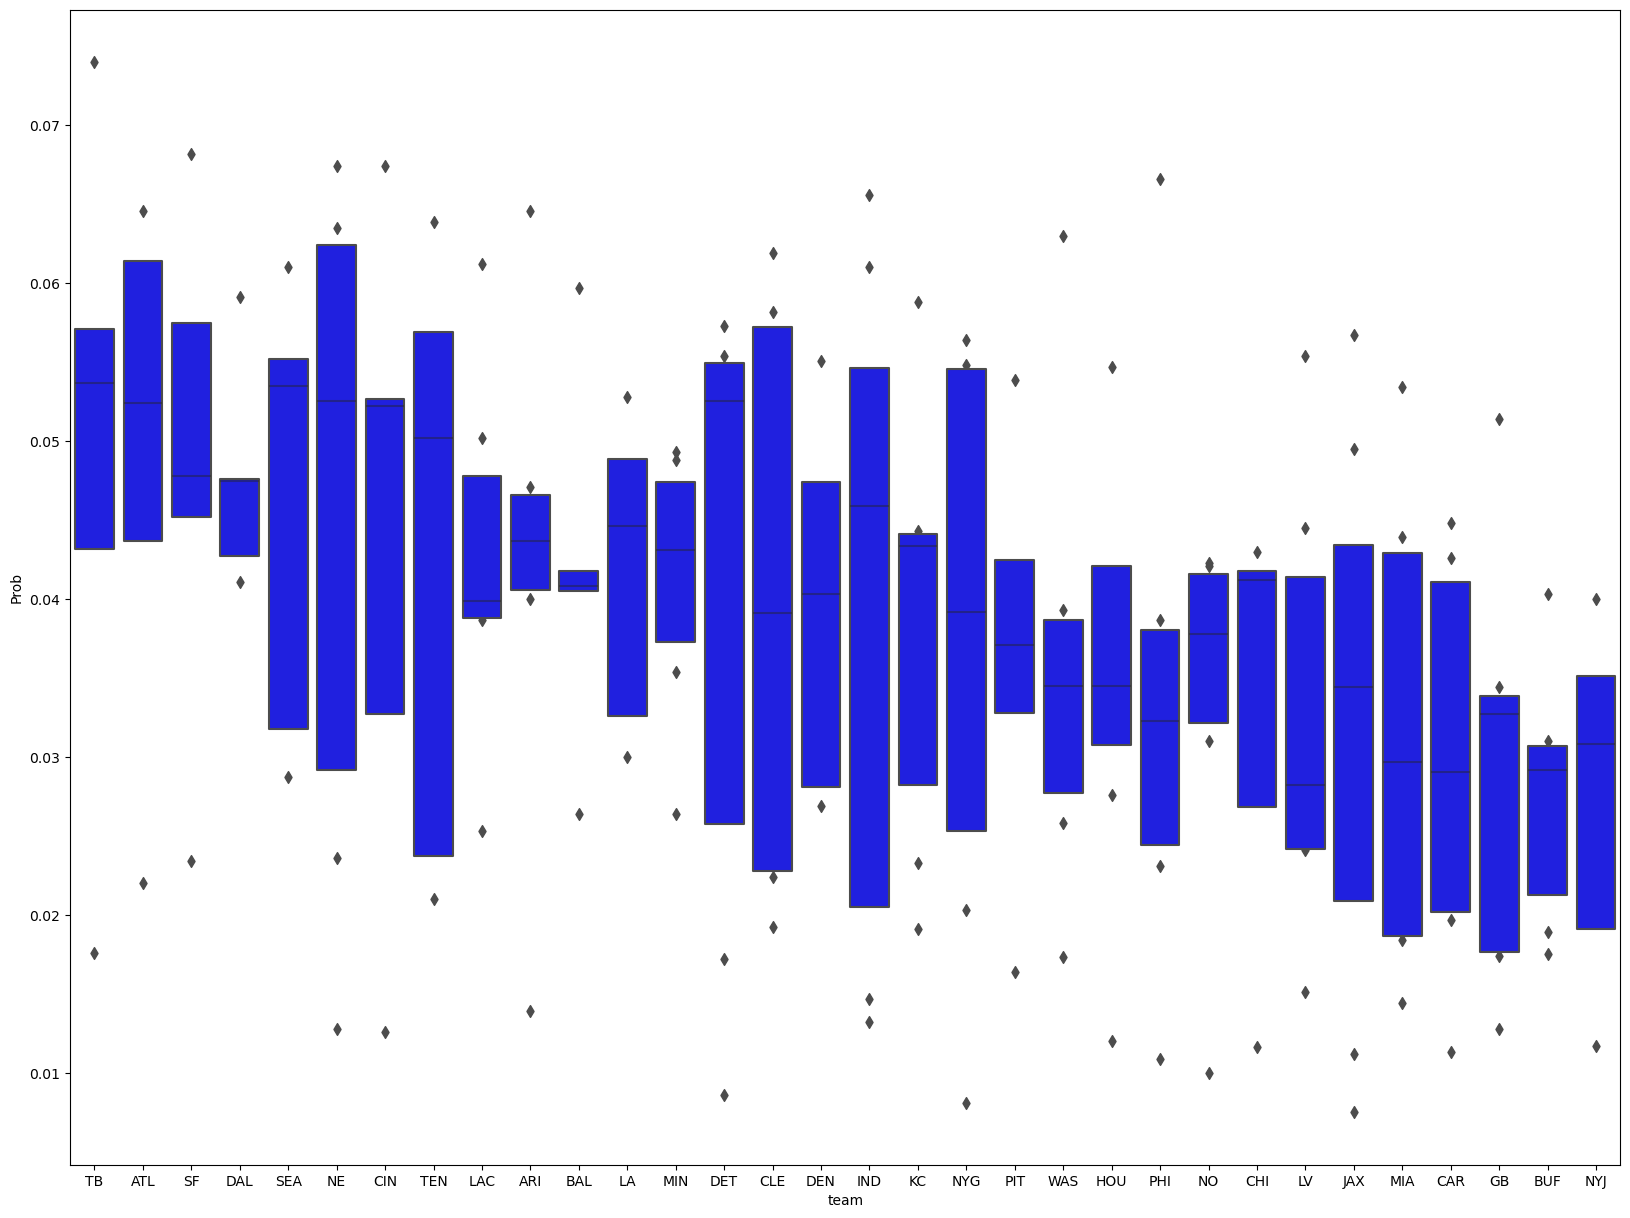

In [571]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxenplot(x="team", y="Prob",
              color="b", order=ranking,
              scale="linear", data=line,
             ax=ax);

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxenplot(x="team", y="Prob",
              color="b", order=ranking,
              scale="linear", data=line,
             ax=ax);

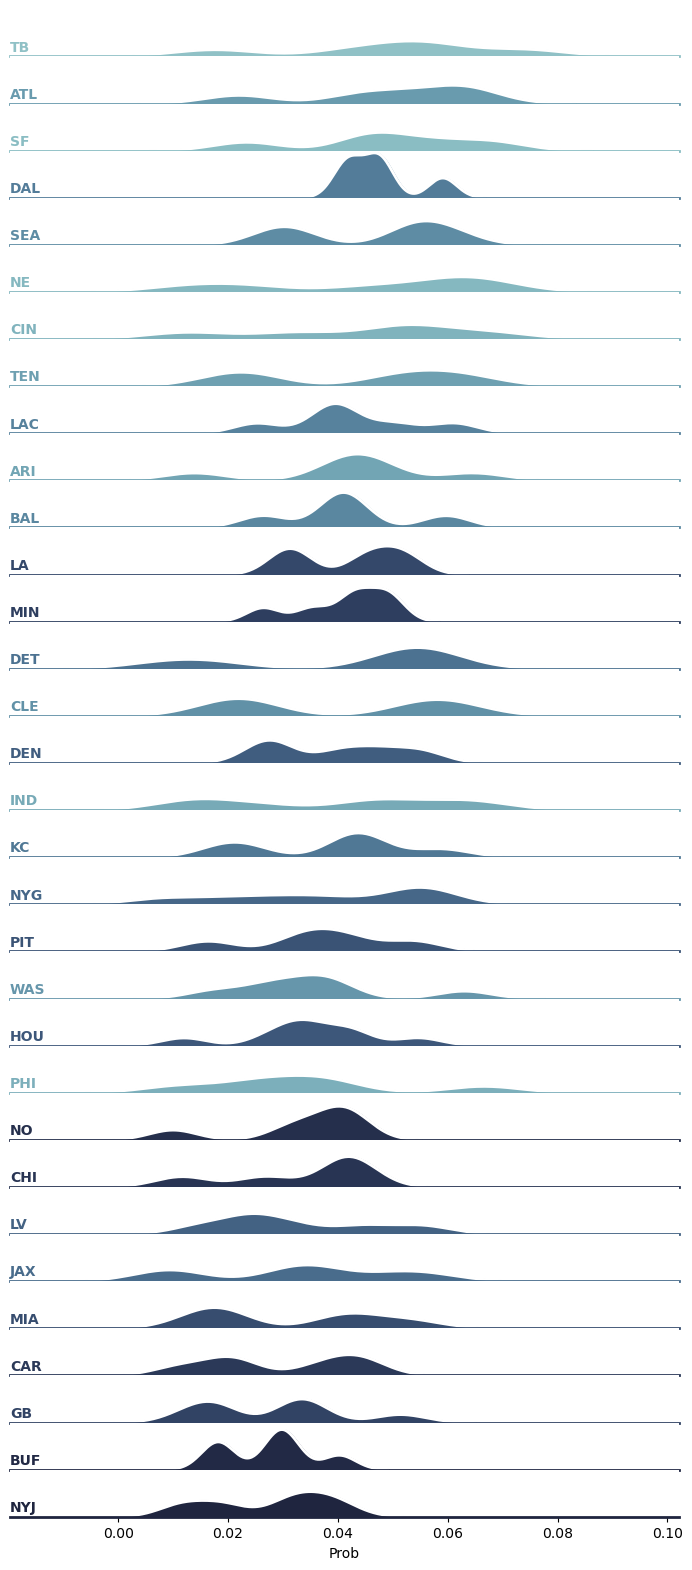

In [506]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
g = sns.FacetGrid(line, row="team", 
                  hue="team", 
                  aspect=15, height=.5, 
                  palette=pal, row_order=ranking
                 );

# Draw the densities in a few steps
g.map(sns.kdeplot, "Prob",
      bw_adjust=.5, clip_on=(-.4),
      fill=True, alpha=1, linewidth=1.5);
g.map(sns.kdeplot, "Prob", clip_on=(-.4), color="w", lw=2, bw_adjust=.5);

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Prob");

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0);

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="");
g.despine(bottom=True, left=True);

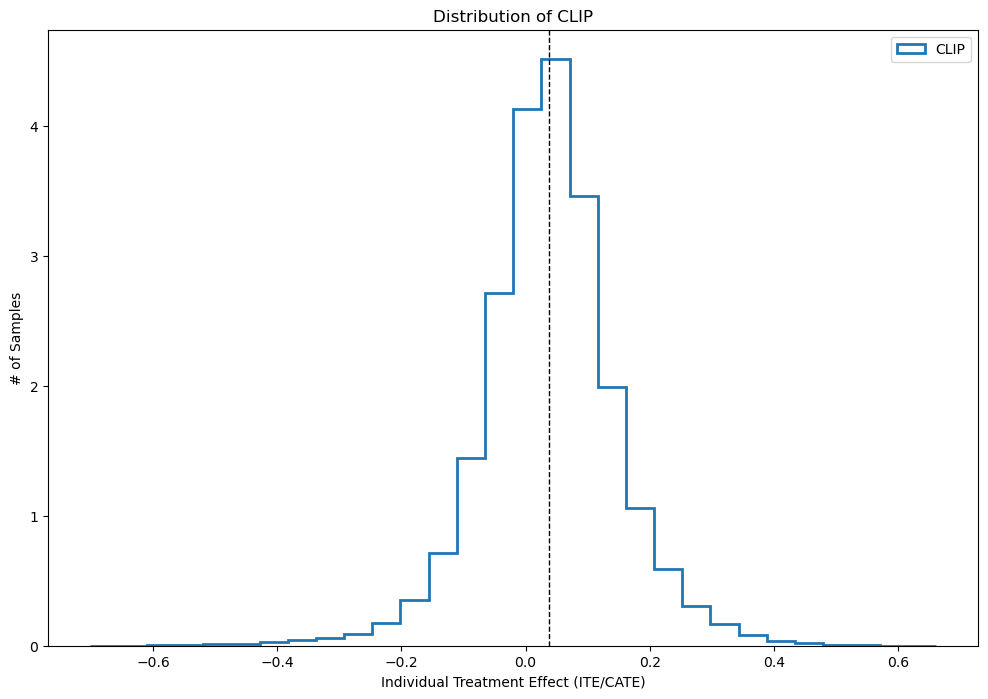

In [400]:
alpha = 1
linewidth = 2
bins = 30
plt.figure(figsize=(12,8))
plt.hist(test['Prob'], alpha=alpha, bins=bins, label='CLIP',
             histtype='step', linewidth=linewidth, density=True)
plt.axvline(test['Prob'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of CLIP')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

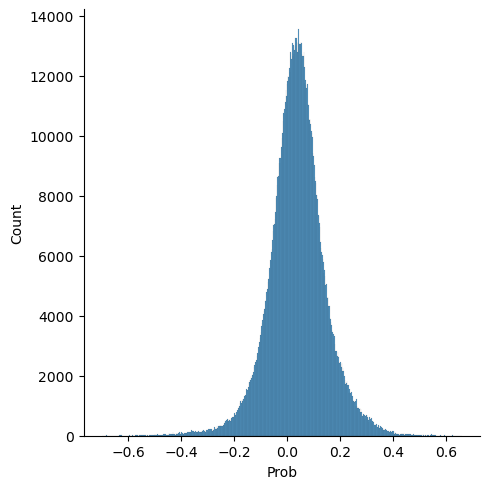

In [385]:
sns.displot(test['Prob']);

In [386]:
snaps = test.groupby(['displayName', 'gameId', 'officialPosition', 'team'])['playId'].nunique().rename('Snaps').reset_index()
snaps = snaps.groupby(['displayName', 'officialPosition', 'team'])['Snaps'].sum().rename('Snaps').reset_index()
snaps.sort_values(by='Snaps', ascending=False)
snaps

displayName officialPosition team  Snaps
0        A.J. Cann                G  JAX    104
1      A.J. Dillon               RB   GB     16
2     Aaron Brewer                C  TEN     44
3      Aaron Jones               RB   GB     25
4    Aaron Stinnie                G   TB      3
..             ...              ...  ...    ...
529      Zach Ertz               TE  ARI      1
530      Zach Ertz               TE  PHI      5
531    Zach Gentry               TE  PIT     16
532    Zack Martin                G  DAL    202
533      Zack Moss               RB  BUF     16

[534 rows x 4 columns]

In [387]:
prob = test.groupby(['displayName', 'officialPosition', 'team'])['Prob'].mean().reset_index()
prob

displayName officialPosition team    Prob
0        A.J. Cann                G  JAX  0.0306
1      A.J. Dillon               RB   GB -0.0103
2     Aaron Brewer                C  TEN  0.0507
3      Aaron Jones               RB   GB  0.0651
4    Aaron Stinnie                G   TB  0.0991
..             ...              ...  ...     ...
529      Zach Ertz               TE  ARI  0.0606
530      Zach Ertz               TE  PHI  0.0812
531    Zach Gentry               TE  PIT  0.0541
532    Zack Martin                G  DAL  0.0461
533      Zack Moss               RB  BUF  0.0082

[534 rows x 4 columns]

In [473]:
test

gameId  playId      nflId  frameId  displayName officialPosition  \
0        2021090900      97 40151.0000        7  Ryan Jensen                C   
1        2021090900      97 40151.0000        8  Ryan Jensen                C   
2        2021090900      97 40151.0000        9  Ryan Jensen                C   
3        2021090900      97 40151.0000       10  Ryan Jensen                C   
4        2021090900      97 40151.0000       11  Ryan Jensen                C   
...             ...     ...        ...      ...          ...              ...   
1301895  2021110100    4433 52507.0000       54   Matt Peart                T   
1301896  2021110100    4433 52507.0000       55   Matt Peart                T   
1301897  2021110100    4433 52507.0000       56   Matt Peart                T   
1301898  2021110100    4433 52507.0000       57   Matt Peart                T   
1301899  2021110100    4433 52507.0000       58   Matt Peart                T   

        team       x       y      s      a    dis       o      dir  Opp_Dist  \
0         TB 42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
1         TB 41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
2         TB 41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
3         TB 41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
4         TB 41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...      ...     ...     ...    ...    ...    ...     ...      ...       ...   
1301895  NYG 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
1301896  NYG 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
1301897  NYG 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
1301898  NYG 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
1301899  NYG 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
0           1.5535   4.4745    0.9675          2          6.0000   108.1700   
1           1.5512   4.4825    1.2490          2          6.0000   117.0500   
2           1.4901   4.4807    1.6013          2          6.0000   118.6400   
3           1.4200   4.4700    1.9673          2          6.0000   121.1400   
4           1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
1301895     1.6199   2.4468    2.8940         15          6.0000    23.7500   
1301896     1.6876   2.4564    2.9286         15          6.0000    26.0700   
1301897     1.7168   2.4531    2.9665         15          6.0000    27.5100   
1301898     1.7682   2.4085    2.9769         15          6.0000    28.1200   
1301899     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
0       679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
1       586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
2       430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
3       347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
4       312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
1301895 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301896 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301897 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301898 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
1301899 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  Success  Negative  propensity_score  \
0         0.2128  0.1466 0.0733        0    0.0000            0.1238   
1         0.2128  0.1466 0.0733        0    0.0000            0.1172   
2         0.2

In [389]:
stdev = test.groupby(['displayName', 'officialPosition', 'team'])['Prob'].std().rename('Stdev').reset_index()
stdev

displayName officialPosition team  Stdev
0        A.J. Cann                G  JAX 0.1182
1      A.J. Dillon               RB   GB 0.1163
2     Aaron Brewer                C  TEN 0.1216
3      Aaron Jones               RB   GB 0.1064
4    Aaron Stinnie                G   TB 0.0752
..             ...              ...  ...    ...
529      Zach Ertz               TE  ARI 0.0402
530      Zach Ertz               TE  PHI 0.1083
531    Zach Gentry               TE  PIT 0.0882
532    Zack Martin                G  DAL 0.1073
533      Zack Moss               RB  BUF 0.1327

[534 rows x 4 columns]

In [394]:
causal = snaps.merge(prob, on=['displayName', 'officialPosition', 'team'], how='inner')
causal = causal.merge(stdev, on=['displayName', 'officialPosition', 'team'], how='inner')
causal.sort_values(by='Prob', ascending=False).head(50)

displayName officialPosition team  Snaps   Prob  Stdev
86             CeeDee Lamb               WR  DAL      1 0.3139 0.0190
328        La'Mical Perine               RB  NYJ      1 0.2715 0.0452
264        Jeremy Sprinkle               TE  DAL      4 0.2473 0.1471
11              Alex Armah               RB   NO      1 0.2424 0.0165
74           Bryan Edwards               WR   LV      1 0.2267 0.0131
22          Ameer Abdullah               RB  MIN      3 0.2237 0.2367
139           Danny Pinter                G  IND      2 0.2162 0.2892
396           Nick Bellore               LB  SEA      3 0.2104 0.0769
227             J.P. Holtz               TE  CHI      3 0.1896 0.1400
121            Corey Davis               WR  NYJ      1 0.1856 0.0129
163          Devine Ozigbo               RB   NO      1 0.1716 0.0422
445             Ryan Bates                C  BUF      3 0.1668 0.1875
226            J.J. Taylor               RB   NE      1 0.1623 0.0193
383            Mike Thomas               WR  CIN      1 0.1583 0.0089
399             Noah Brown               WR  DAL      1 0.1582 0.0134
88           Cethan Carter               TE  MIA      3 0.1449 0.0904
184         Eric Tomlinson               TE  BAL     10 0.1402 0.0613
269           Jimmy Graham               TE  CHI      4 0.1335 0.0544
479           Tommy Hudson               TE  TEN      5 0.1327 0.0695
483             Tony Jones               RB   NO      4 0.1292 0.0865
95            Chris Conley               WR  HOU      2 0.1195 0.0296
389          MyCole Pruitt               TE  TEN     30 0.1143 0.1177
220          Isaiah Prince                T  CIN      5 0.1133 0.0961
193           Fred Johnson                T  CIN      3 0.1122 0.1572
464            Sony Michel               RB   LA      6 0.1103 0.1179
255          Jason Cabinda               FB  DET      6 0.1100 0.0941
293            Josh Palmer               WR  LAC      1 0.1086 0.0238
489          Trenton Brown                T   NE      2 0.1076 0.0779
194          Freddie Swain               WR  SEA      1 0.1071 0.0133
460         Senio Kelemete                G  LAC      2 0.1061 0.0234
309            Keith Smith               FB  ATL     16 0.1056 0.1293
136             Dan Arnold               TE  JAX     10 0.1053 0.1319
144           Darren Fells               TE  DET     11 0.1049 0.0664
278           Johnny Mundt               TE   LA      7 0.1046 0.1560
275             John Bates               TE  WAS      7 0.1027 0.1823
54            Blake Jarwin               TE  DAL     13 0.1017 0.1412
428      Ricky Seals-Jones               TE  WAS     19 0.1016 0.1473
239          Jakobi Meyers               WR   NE      2 0.1015 0.0432
120  Cordarrelle Patterson               RB  ATL     16 0.1009 0.0918
85          Cedrick Wilson               WR  DAL      2 0.0996 0.0733
207         Giovanni Ricci               FB  CAR      2 0.0994 0.0458
4            Aaron Stinnie                G   TB      3 0.0991 0.0752
442           Ross Dwelley               TE   SF     11 0.0967 0.1588
387            Mo Alie-Cox               TE  IND     15 0.0952 0.0753
340              Lee Smith               TE  ATL     35 0.0945 0.1243
100          Chris Myarick               TE  NYG      3 0.0936 0.1251
199        Garrett Griffin               TE   NO     14 0.0922 0.0994
183           Eric Saubert               TE  DEN     17 0.0920 0.1378
174          Durham Smythe               TE  MIA     23 0.0911 0.1027
17      Alexander Mattison               RB  MIN     11 0.0910 0.1355

In [395]:
causal['officialPosition'].value_counts()

T     121
RB    109
TE    108
G      98
C      55
WR     28
FB     13
LB      1
QB      1
Name: officialPosition, dtype: int64

In [396]:
mask = causal['officialPosition'].isin(['RB', 'TE', 'WR', 'FB', 'LB', 'QB'])
causal = causal[~mask]
causal.sort_values(by='Prob', ascending=False).head(50)

displayName officialPosition team  Snaps   Prob  Stdev
139      Danny Pinter                G  IND      2 0.2162 0.2892
445        Ryan Bates                C  BUF      3 0.1668 0.1875
220     Isaiah Prince                T  CIN      5 0.1133 0.0961
193      Fred Johnson                T  CIN      3 0.1122 0.1572
489     Trenton Brown                T   NE      2 0.1076 0.0779
460    Senio Kelemete                G  LAC      2 0.1061 0.0234
4       Aaron Stinnie                G   TB      3 0.0991 0.0752
234      Jake Brendel                C   SF      1 0.0845 0.0185
154      David Sharpe                T  BAL      8 0.0779 0.0564
218      Ike Boettger                G  BUF     56 0.0759 0.1011
461     Shane Lemieux                G  NYG      9 0.0756 0.1066
447       Ryan Jensen                C   TB    303 0.0740 0.1117
294        Josh Wells                T   TB     15 0.0719 0.0933
480     Tommy Kraemer                G  DET      1 0.0695 0.0208
473        Ted Karras                C   NE    139 0.0674 0.1134
493      Trey Hopkins                C  CIN    246 0.0674 0.1066
522       Will Holden                T  DET      3 0.0670 0.1054
525  Xavier Su'a-Filo                G  CIN     59 0.0665 0.1077
365        Matt Skura                C  NYG    132 0.0664 0.1191
16          Alex Mack                C   SF    200 0.0652 0.1298
25        Andre Smith                T  BAL     18 0.0648 0.0787
438     Rodney Hudson                C  ARI    131 0.0646 0.1268
360     Matt Hennessy                C  ATL    283 0.0646 0.1141
437    Rodger Saffold                G  TEN    199 0.0639 0.1406
148     David Andrews                C   NE    276 0.0635 0.1066
478       Tommy Doyle                T  BUF      1 0.0631 0.0174
527     Yodny Cajuste                T   NE     34 0.0623 0.1212
98    Chris Lindstrom                G  ATL    283 0.0614 0.1152
123     Corey Linsley                C  LAC    264 0.0612 0.1170
322       Kyle Fuller                G  SEA    182 0.0610 0.1032
302     Justin Murray                T  ARI     37 0.0600 0.1202
210        Greg Mancz                C  MIA    111 0.0599 0.1000
498     Trystan Colon                C  BAL     27 0.0598 0.0790
48         Ben Powers                G  BAL    185 0.0597 0.0878
462   Shaquille Mason                G   NE    221 0.0592 0.0961
261      Jaylon Moore                T   SF     39 0.0590 0.1410
84     Cedric Ogbuehi                T  SEA     19 0.0588 0.1059
125    Creed Humphrey                C   KC    307 0.0588 0.1216
246     James Ferentz                C   NE     55 0.0577 0.1007
166     Dillon Radunz                T  TEN     17 0.0574 0.1410
192      Frank Ragnow                C  DET    130 0.0573 0.0882
47          Ben Jones                C  TEN    260 0.0569 0.1224
64     Brandon Linder                G  JAX    153 0.0567 0.0976
41      Austin Reiter                C  MIA     69 0.0561 0.0897
448        Ryan Kelly                C  IND    246 0.0556 0.0952
24        Andre James                C   LV    256 0.0554 0.0879
187        Evan Brown                C  DET    186 0.0554 0.0966
196      Gabe Jackson                G  SEA    216 0.0552 0.1023
209    Graham Glasgow                G  DEN    197 0.0551 0.0961
243     Jamarco Jones                T  SEA     62 0.0550 0.0974

In [397]:
causal.to_csv('causal_lineman.csv', index=0)

In [78]:
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

from causallib.datasets import load_nhefs
from causallib.estimation import Standardization, StratifiedStandardization, XLearner
from causallib.evaluation import evaluate
from causallib.estimation import IPW


warnings.filterwarnings("ignore")
%matplotlib inline

In [79]:
offensive_line = oline[[
                        'x', 'y', 's', 'a', 'dis',
                        'o', 'dir',
       'Opp_Dist', 'Team_Dist', 'QB_Dist',
       'FootDist', 'yardsToGo',
       'defendersInBox', 'AngleDiff', 'Force',
       'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean', 'QBMean','mateVar', 'oppVar', 'QBVar',
        'playResult', 
                        'Negative']]
offensive_line.dropna(inplace=True)
offensive_line

x       y      s      a    dis       o      dir  Opp_Dist  \
178     42.0300 24.0600 0.7900 2.1300 0.0700 53.2100 305.0400    1.6918   
179     41.9500 24.1000 1.0000 1.8400 0.0900 57.0700 300.0200    1.6477   
180     41.8600 24.1600 1.1700 1.3500 0.1100 59.9200 301.2800    1.5698   
181     41.7400 24.2400 1.3900 1.0900 0.1400 62.9600 301.8200    1.4783   
182     41.5800 24.3100 1.6200 0.9800 0.1800 71.0300 297.5600    1.4368   
...         ...     ...    ...    ...    ...     ...      ...       ...   
8314642 21.5100 26.7500 2.0500 0.3700 0.2200 55.9500  32.2000    1.7933   
8314643 21.6300 26.9700 2.3200 0.5600 0.2500 55.9500  29.8800    1.7576   
8314644 21.7500 27.1900 2.4500 0.4400 0.2500 55.9500  28.4400    1.6816   
8314645 21.8800 27.4500 2.6400 0.5900 0.2800 55.1600  27.0400    1.5718   
8314646 22.0100 27.7000 2.7700 0.3500 0.2900 55.1600  26.7300    1.4396   

         Team_Dist  QB_Dist  FootDist  yardsToGo  defendersInBox  AngleDiff  \
178         1.5535   4.4745    0.9675          2          6.0000   108.1700   
179         1.5512   4.4825    1.2490          2          6.0000   117.0500   
180         1.4901   4.4807    1.6013          2          6.0000   118.6400   
181         1.4200   4.4700    1.9673          2          6.0000   121.1400   
182         1.3600   4.4409    2.3208          2          6.0000   133.4700   
...            ...      ...       ...        ...             ...        ...   
8314642     1.6199   2.4468    2.8940         15          6.0000    23.7500   
8314643     1.6876   2.4564    2.9286         15          6.0000    26.0700   
8314644     1.7168   2.4531    2.9665         15          6.0000    27.5100   
8314645     1.7682   2.4085    2.9769         15          6.0000    28.1200   
8314646     1.7978   2.3479    2.9954         15          6.0000    28.4300   

           Force   varX   varY   varS   maxA  mateMean  oppMean  QBMean  \
178     679.4700 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
179     586.9600 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
180     430.6500 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
181     347.7100 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
182     312.6200 2.3200 0.7608 0.5773 2.1300    1.5180   1.4655  4.6210   
...          ...    ...    ...    ...    ...       ...      ...     ...   
8314642 112.1100 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314643 169.6800 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314644 133.3200 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314645 178.7700 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   
8314646 106.0500 6.2148 0.2400 0.4724 2.5600    1.4777   1.0494  3.1412   

         mateVar  oppVar  QBVar  playResult  Negative  
178       0.2128  0.1466 0.0733           0    0.0000  
179       0.2128  0.1466 0.0733           0    0.0000  
180       0.2128  0.1466 0.0733           0    0.0000  
181       0.2128  0.1466 0.0733           0    0.0000  
182       0.2128  0.1466 0.0733           0    0.0000  
...          ...     ...    ...         ...       ...  
8314642   0.1110  0.2671 1.9999          -5    1.0000  
8314643   0.1110  0.2671 1.9999          -5    1.0000  
8314644   0.1110  0.2671 1.9999          -5    1.0000  
8314645   0.1110  0.2671 1.9999          -5    1.0000  
8314646   0.1110  0.2671 1.9999          -5    1.0000  

[1301900 rows x 27 columns]

In [86]:
# split into X, y, and a
y = offensive_line['playResult']
treatment = offensive_line['Negative']
X = offensive_line.drop(columns=['Negative',
       'playResult'])
features = ['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'Opp_Dist', 'Team_Dist',
       'QB_Dist', 'FootDist', 'yardsToGo', 'defendersInBox', 'AngleDiff',
       'Force', 'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean',
       'QBMean', 'mateVar', 'oppVar', 'QBVar']

In [87]:
X.columns

Index(['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'Opp_Dist', 'Team_Dist',
       'QB_Dist', 'FootDist', 'yardsToGo', 'defendersInBox', 'AngleDiff',
       'Force', 'varX', 'varY', 'varS', 'maxA', 'mateMean', 'oppMean',
       'QBMean', 'mateVar', 'oppVar', 'QBVar'],
      dtype='object')

In [82]:
start = time.time()
learner_s = BaseSRegressor(XGBRegressor(), control_name=0)
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y, return_ci=False)
end = time.time()
print("Run time (seconds): {:.2f}".format(end - start))

INFO:causalml:Error metrics for group 1.0
INFO:causalml:    RMSE   (Control):     9.1658
INFO:causalml:    RMSE (Treatment):     8.7119
INFO:causalml:   sMAPE   (Control):     1.2025
INFO:causalml:   sMAPE (Treatment):     1.2801
INFO:causalml:    Gini   (Control):     0.6270
INFO:causalml:    Gini (Treatment):     0.6818


Run time (seconds): 80.53


INFO:causalml:Error metrics for group 1.0
INFO:causalml:    RMSE   (Control):     9.1658
INFO:causalml:    RMSE (Treatment):     8.7119
INFO:causalml:   sMAPE   (Control):     1.2025
INFO:causalml:   sMAPE (Treatment):     1.2801
INFO:causalml:    Gini   (Control):     0.6270
INFO:causalml:    Gini (Treatment):     0.6818
INFO:causalml:Error metrics for group 1.0
INFO:causalml:    RMSE   (Control):     9.1658
INFO:causalml:    RMSE (Treatment):     8.7119
INFO:causalml:   sMAPE   (Control):     1.2025
INFO:causalml:   sMAPE (Treatment):     1.2801
INFO:causalml:    Gini   (Control):     0.6270
INFO:causalml:    Gini (Treatment):     0.6818


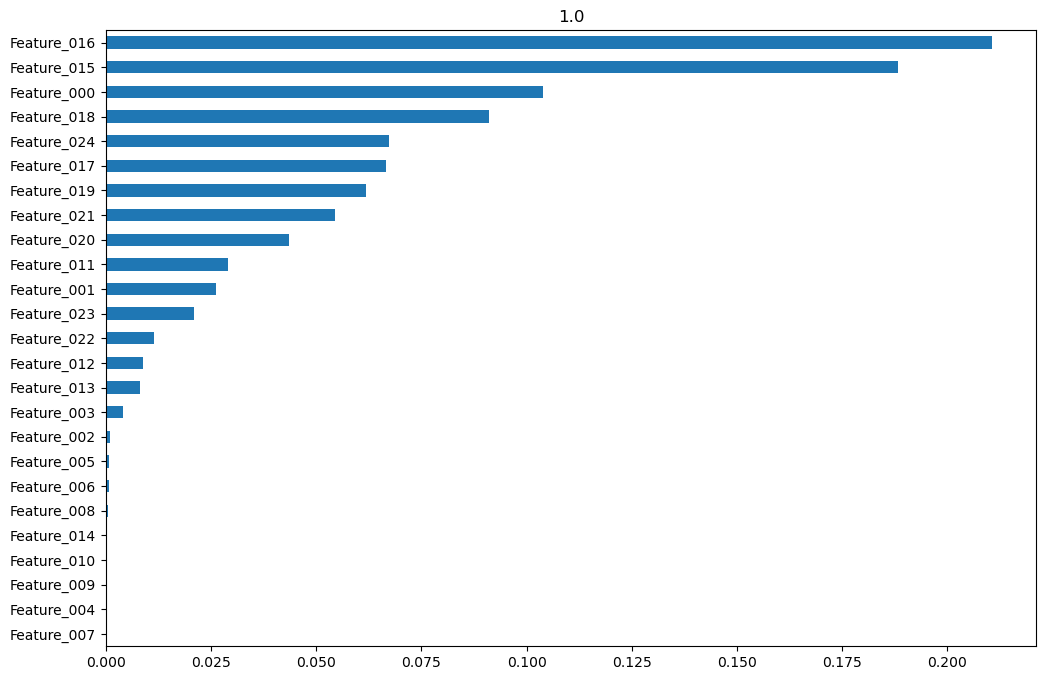

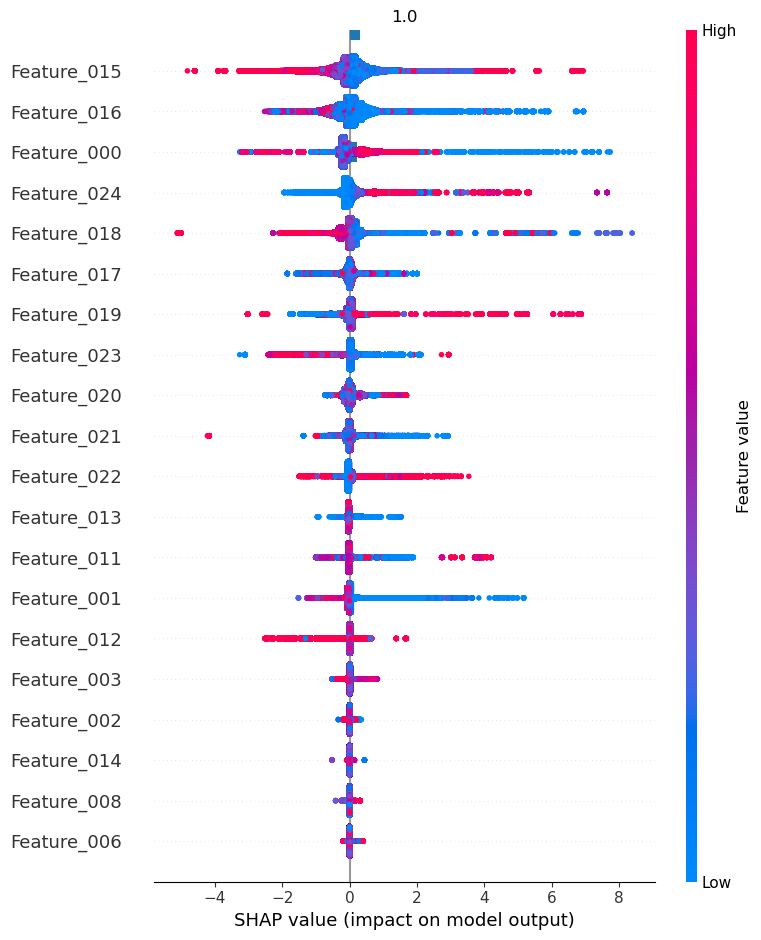

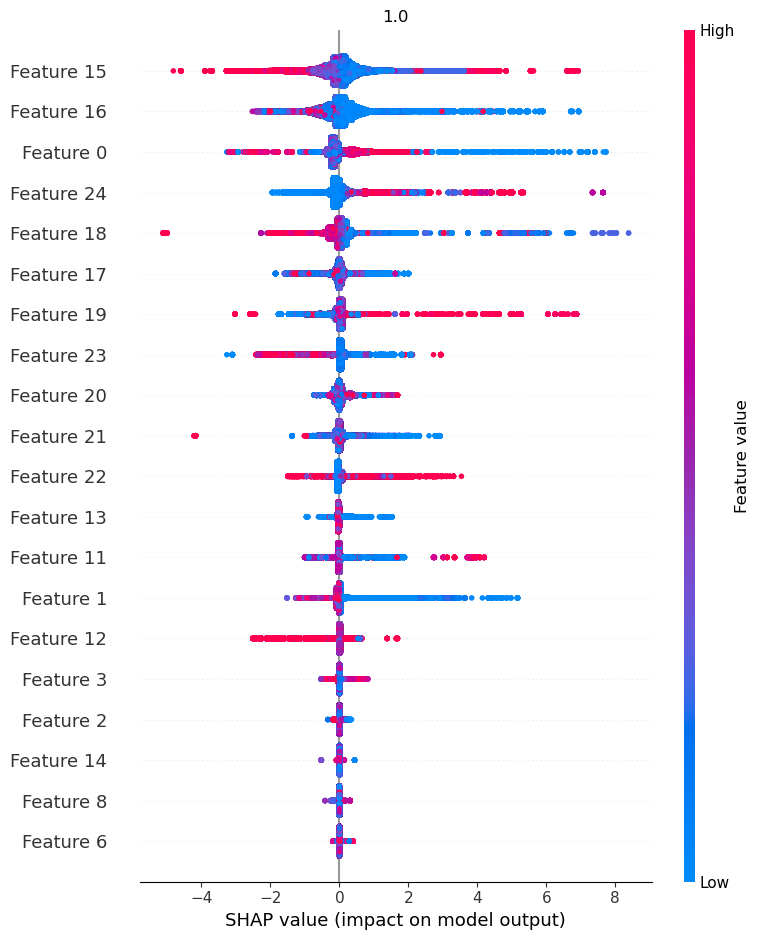

In [89]:
slearner = BaseSRegressor(XGBRegressor(), control_name=0)
slearner.estimate_ate(X, treatment, y)
slearner_tau = slearner.fit_predict(X, treatment, y)

model_tau_feature = XGBRegressor()  # specify model for model_tau_feature

slearner.get_importance(X=X, tau=slearner_tau, model_tau_feature=model_tau_feature,
                        normalize=True, method='auto', features=features)

# Using the feature_importances_ method in the base learner (LGBMRegressor() in this example)
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='auto')

# Using eli5's PermutationImportance
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='permutation')

# Using SHAP
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)

# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau)

# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

In [129]:
cate_s.mean()

-0.7268670911557678

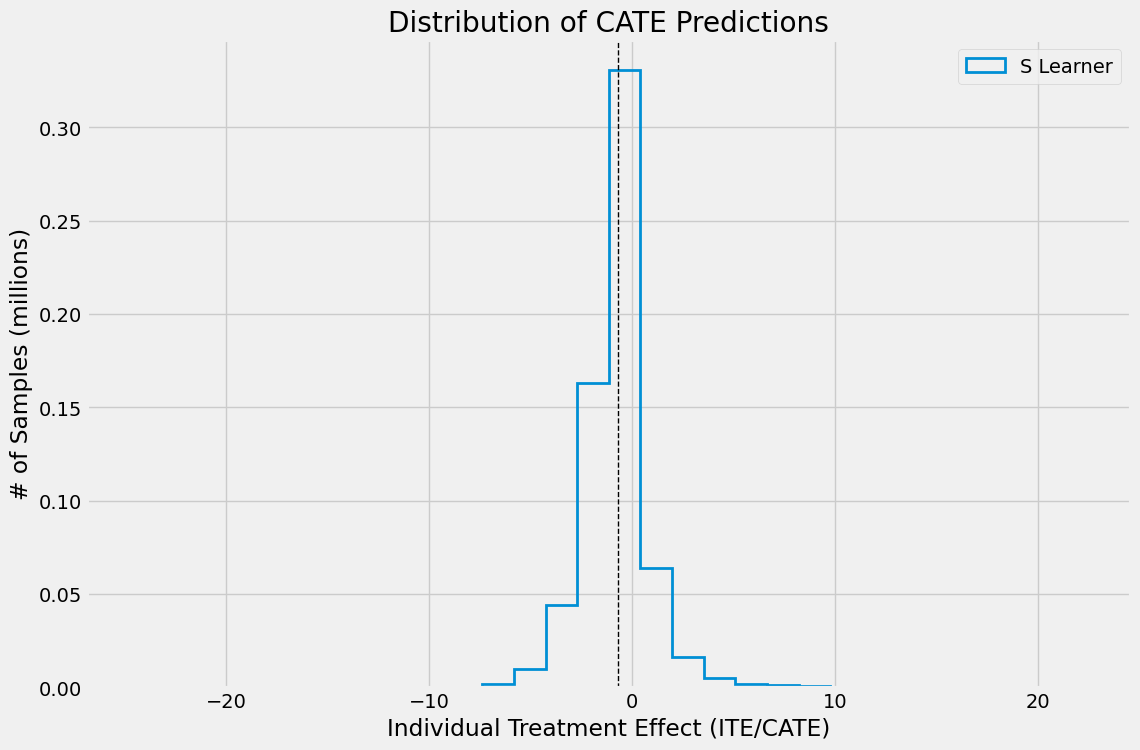

In [131]:
alpha = 1
linewidth = 2
bins = 30
plt.figure(figsize=(12,8))
plt.hist(cate_s, alpha=alpha, bins=bins, label='S Learner',
             histtype='step', linewidth=linewidth, density=True)
plt.axvline(cate_s.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of CATE Predictions')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples (millions)')
_=plt.legend()

In [130]:
learner_t = BaseTRegressor(XGBRegressor(), control_name=0)
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)

INFO:causalml:Error metrics for group 1.0
INFO:causalml:    RMSE   (Control):     8.9410
INFO:causalml:    RMSE (Treatment):     4.0096
INFO:causalml:   sMAPE   (Control):     1.1591
INFO:causalml:   sMAPE (Treatment):     0.9475
INFO:causalml:    Gini   (Control):     0.6287
INFO:causalml:    Gini (Treatment):     0.9499


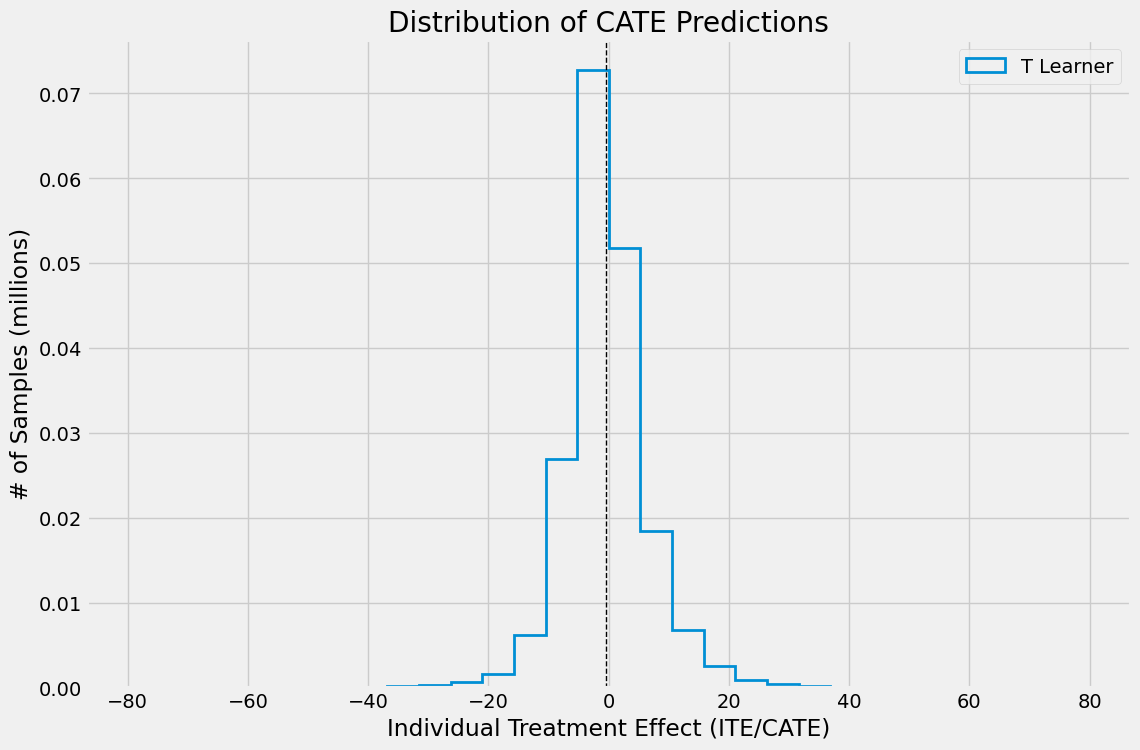

In [132]:
alpha = 1
linewidth = 2
bins = 30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner',
             histtype='step', linewidth=linewidth, density=True)
plt.axvline(cate_t.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of CATE Predictions')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples (millions)')
_=plt.legend()

In [ ]:
start = time.time()
learner_r = BaseRRegressor(XGBRegressor(), control_name=0)
cate_r = learner_r.fit_predict(X=X, treatment=treatment, y=y)
end = time.time()
print("Run time (seconds): {:.2f}".format(end - start))

INFO:causalml:Generating propensity score


In [ ]:
groups = learner_r._classes

alpha = 1
linewidth = 2
bins = 30
for group,idx in sorted(groups.items(), key=lambda x: x[1]):
    plt.figure(figsize=(12,8))
    plt.hist(cate_t[:,idx], alpha=alpha, bins=bins, label='T Learner ({})'.format(group),
             histtype='step', linewidth=linewidth, density=True)
    plt.hist(cate_x[:,idx], alpha=alpha, bins=bins, label='X Learner ({})'.format(group),
             histtype='step', linewidth=linewidth, density=True)
    plt.hist(cate_r[:,idx], alpha=alpha, bins=bins, label='R Learner ({})'.format(group),
             histtype='step', linewidth=linewidth, density=True)
    plt.vlines(cate_s[0,idx], 0, plt.axes().get_ylim()[1], label='S Learner ({})'.format(group),
               linestyles='dotted', linewidth=linewidth)
    
    plt.title('Distribution of CATE Predictions for {}'.format(group))
    plt.xlabel('Individual Treatment Effect (ITE/CATE)')
    plt.ylabel('# of Samples')
    _=plt.legend()

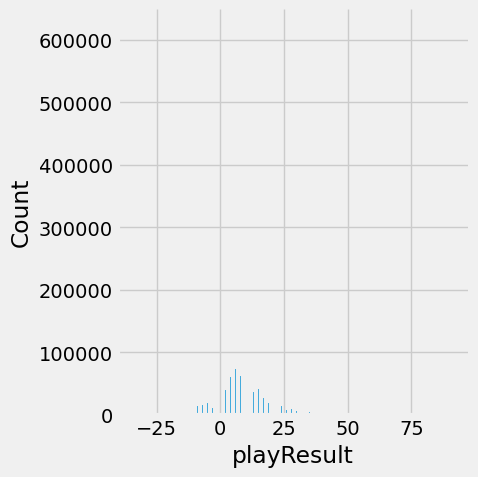

In [274]:
sns.displot(offensive_line['playResult']);

In [158]:
# split into X, y, and a
y = offensive_line['playResult']
a = offensive_line['Negative']
X = offensive_line.drop(columns=['Negative', 
       'playResult'])

In [159]:
start = time.time()
xlearner = XLearner(
    outcome_model=StratifiedStandardization(GradientBoostingRegressor()),
    effect_model=Standardization(GradientBoostingRegressor()),
    treatment_model = GradientBoostingClassifier(),
    effect_types="diff",
)
_ = xlearner.fit(X, a, y)
end = time.time()
print("Run time (seconds): {:.2f}".format(end - start))
effect = xlearner.estimate_effect(X, a, agg="population")  #
print(f"{effect['diff']:.6f}")

Run time (seconds): 1285.23
-0.972707


In [160]:
_

XLearner(effect_model=Standardization(encode_treatment=False, predict_proba=False,
                learner=GradientBoostingRegressor()), effect_types=diff, outcome_model=StratifiedStandardization(learner=GradientBoostingRegressor()), predict_proba=True, treatment_model=DummyClassifier(),
         learner={'outcome_model': StratifiedStandardization(learner=GradientBoostingRegressor()), 'cate_model': Standardization(encode_treatment=False, predict_proba=False,
                learner=GradientBoostingRegressor()), 'treatment_model': DummyClassifier()})

In [161]:
outcomes = xlearner.outcome_model.estimate_individual_outcome(
    X, a, predict_proba=True
)
print((outcomes[1] - outcomes[0]).mean())

-0.9662041315109778


100%|===================| 1251557/1252622 [14:38<00:00]        

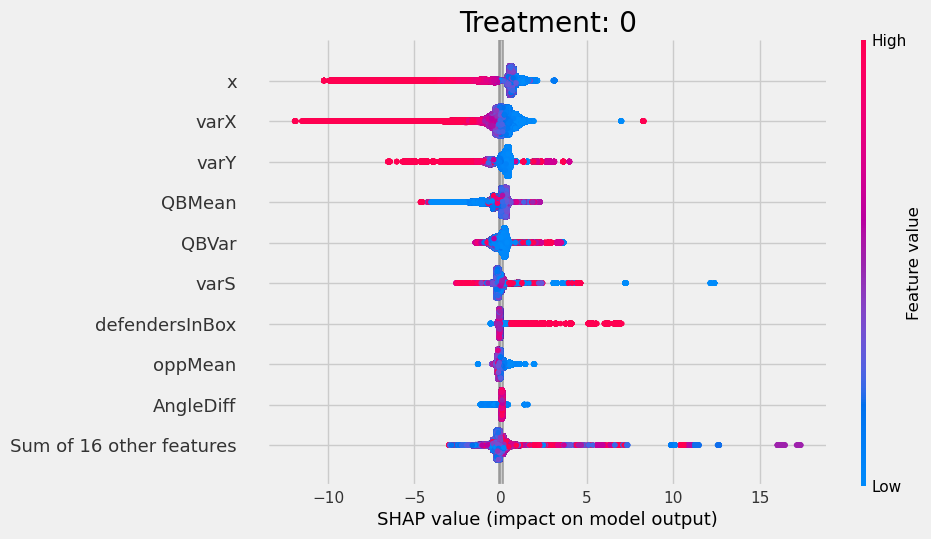

ValueError: zero-size array to reduction operation maximum which has no identity

In [162]:
for treatment in (0, 1):
    model = xlearner.outcome_model.learner[treatment]
    X = X.loc[a == treatment, :]
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    plt.gca().set_title(f"Treatment: {treatment}")
    shap.plots.beeswarm(shap_values)

In [ ]:
shap.summary_plot(shap_values)

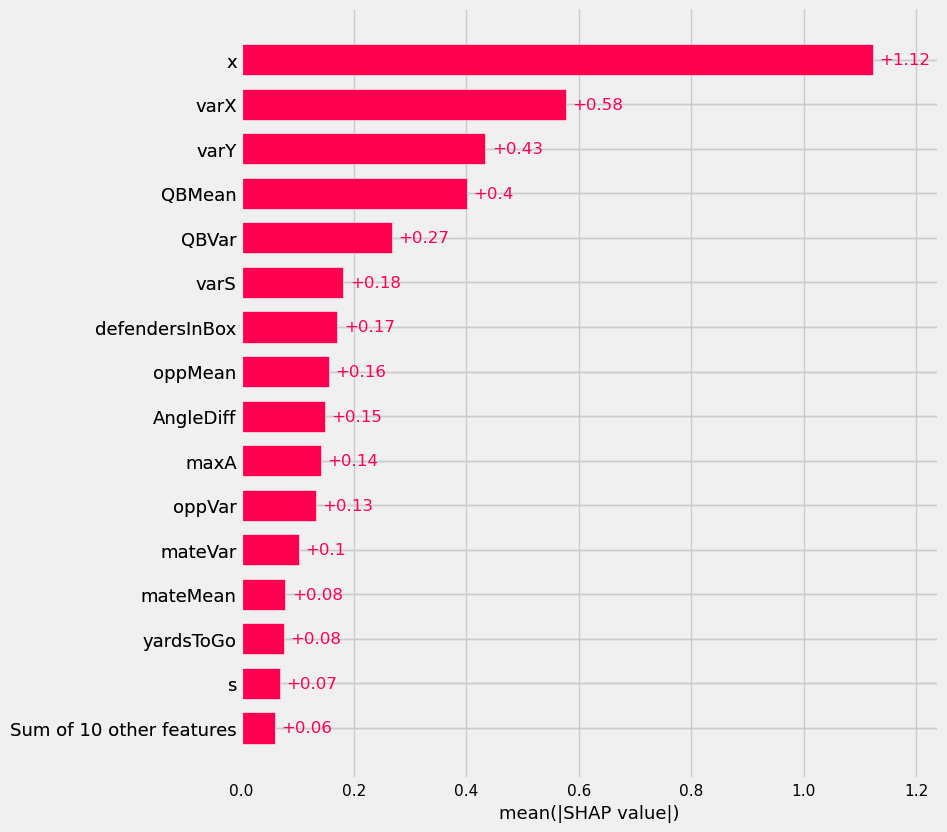

In [163]:
shap.plots.bar(shap_values, max_display=16)

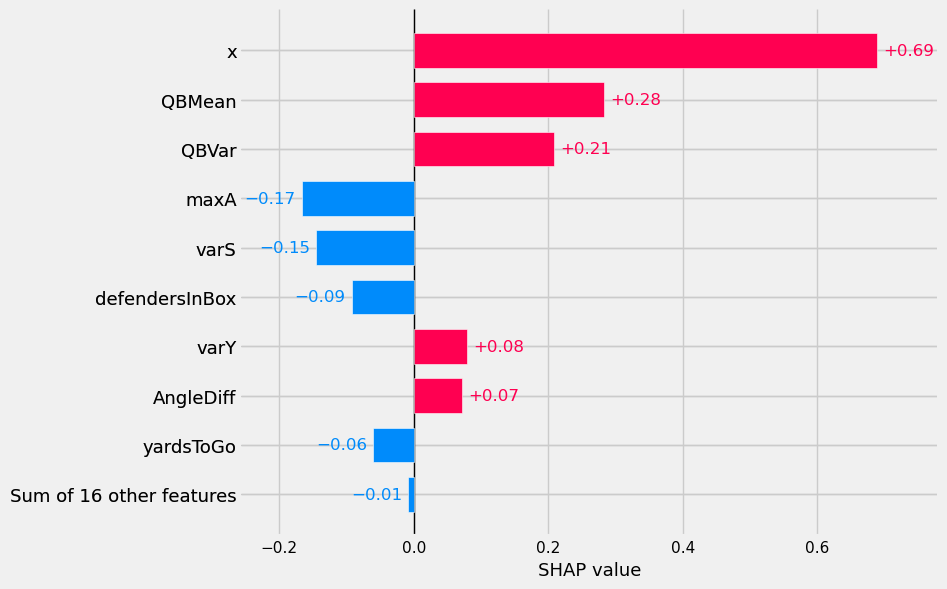

In [164]:
shap.plots.bar(shap_values[0])

In [51]:
# split into X, y, and a
y = offensive_line['Success']
T = offensive_line['pff_hurryAllowed']
X = offensive_line.drop(columns=['pff_hurryAllowed',
       'Success', 'gameId', 'playId', 'nflId', 'frameId', 'displayName',
       'officialPosition'])

In [52]:
from econml.dr import ForestDRLearner
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier


est = ForestDRLearner(model_regression=GradientBoostingRegressor(),
                      model_propensity=GradientBoostingClassifier(),
                      cv=2,
                      n_estimators=1000,
                      min_samples_leaf=10,
                      verbose=1, min_weight_fraction_leaf=.01)
est.fit(y, T, X=X)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.9min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.3s finished


In [53]:
est.feature_importances_(T=1)

array([0.03502532, 0.0244099 , 0.01335651, 0.0049716 , 0.00272214,
       0.01123625, 0.01199629, 0.0117446 , 0.01309336, 0.02093051,
       0.01021937, 0.01632011, 0.02083279, 0.03447814, 0.00892751,
       0.0672386 , 0.15519409, 0.11219979, 0.17273276, 0.05736174,
       0.10724082, 0.04850083, 0.02421702, 0.01504994])